<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://staffhome.np.edu.sg/campus/corpcomm/Downloadable/Logo%20%20Icon/ICT/ICT%20Logo%20Full%20Colour.jpg' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Data Wrangling</h1><h2>Assignment 1 </h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

Dylon Wang S10263199B

In [1]:
# import the pacakges
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns
import scipy.stats as stats

from sklearn.preprocessing import FunctionTransformer
from feature_engine.transformation import LogTransformer

from sklearn.preprocessing import PowerTransformer
from feature_engine.transformation import YeoJohnsonTransformer
from feature_engine.discretisation import EqualFrequencyDiscretiser

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
pd.set_option('display.max_columns', None)

### Step 1: Load Data into Jupyter Notebook

In [3]:
df = pd.read_csv('./song_popularity.csv')

In [4]:
df.shape

(18835, 18)

In [5]:
df.head(7)

Code                   Song_Name  Song_Duration_ms  Acousticness  \
0   HI8  Boulevard of Broken Dreams            262333      0.005410   
1  HI10                  In The End            216933      0.010094   
2  MI11           Seven Nation Army            231733      0.008007   
3   EI8                  By The Way            216933      0.025872   
4   HI9           How You Remind Me            223826      0.000935   
5   EI7            Bring Me To Life            235893      0.008771   
6   HI7                 Last Resort            199893      0.000494   

   Danceability  Energy  Instrumentalness  Key    Liveness  Audio_mode  \
0       0.49104    68.2          0.000029    8  112.126921           1   
1       0.53658    85.3          0.000000    3    122.7664           0   
2       0.72963    46.3          0.447000    0    157.5025           1   
3       0.44649    97.0          0.003550    0    121.4404           1   
4       0.44253    76.6          0.000000   10    123.8769           1   
5       0.31284    94.5          0.000002    4    194.8816           0   
6       0.57519    88.7          0.001110    4    160.7824           0   

   Speechiness    Tempo  Audio_valence Dynamism  Decibel Loudness  \
0        44.10  167.060          0.474     High   -4.095    Blare   
1          NaN  105.256          0.370     high   -6.407     Roar   
2       118.80  123.881          0.324      Med   -7.828     Roar   
3       160.50  122.444          0.198    Extra   -4.938    Blare   
4        46.95  172.011          0.574       Hi   -5.065    Blare   
5          NaN  189.931          0.320    Extra   -3.169        ?   
6        93.60   90.578          0.724     High   -3.659     Boom   

   Song_Popularity  Indicator  
0            57.72     102.30  
1            45.37     127.95  
2            47.28      69.45  
3            52.89     145.50  
4            46.68     114.90  
5            63.98     141.75  
6            67.74     133.05

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Code              18835 non-null  object 
 1   Song_Name         18835 non-null  object 
 2   Song_Duration_ms  18835 non-null  int64  
 3   Acousticness      18835 non-null  float64
 4   Danceability      15938 non-null  float64
 5   Energy            18835 non-null  float64
 6   Instrumentalness  18835 non-null  float64
 7   Key               18835 non-null  int64  
 8   Liveness          18835 non-null  object 
 9   Audio_mode        18835 non-null  int64  
 10  Speechiness       13184 non-null  float64
 11  Tempo             18835 non-null  float64
 12  Audio_valence     18835 non-null  float64
 13  Dynamism          15137 non-null  object 
 14  Decibel           18835 non-null  float64
 15  Loudness          18835 non-null  object 
 16  Song_Popularity   18835 non-null  float6

In [7]:
df.describe()

Song_Duration_ms  Acousticness  Danceability        Energy  \
count      1.883500e+04  18835.000000  15938.000000  18835.000000   
mean       2.182116e+05      0.253368      0.626669     64.499476   
std        5.988754e+04      0.282945      0.155086     21.410076   
min        1.200000e+04      0.000001      0.000000      0.107000   
25%        1.843395e+05      0.023618      0.526680     51.000000   
50%        2.113060e+05      0.129360      0.636570     67.400000   
75%        2.428440e+05      0.415520      0.740520     81.500000   
max        1.799346e+06      0.976080      0.977130     99.900000   

       Instrumentalness           Key    Audio_mode   Speechiness  \
count      18835.000000  18835.000000  18835.000000  13184.000000   
mean           0.078008      5.289196      0.628139    152.173475   
std            0.221591      3.614595      0.483314    155.018531   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      2.000000      0.000000     56.700000   
50%            0.000011      5.000000      1.000000     83.250000   
75%            0.002570      8.000000      1.000000    177.000000   
max            0.997000     11.000000      1.000000   1410.000000   

              Tempo  Audio_valence       Decibel  Song_Popularity  \
count  18835.000000   18835.000000  18835.000000     18835.000000   
mean     121.073154       0.527967     -7.447435        42.357670   
std       28.714456       0.244632      3.827831        13.949829   
min        0.000000       0.000000    -38.768000         0.000000   
25%       98.368000       0.335000     -9.044000        32.790000   
50%      120.013000       0.527000     -6.555000        42.730000   
75%      139.931000       0.725000     -4.908000        52.290000   
max      242.318000       0.984000      1.585000        99.320000   

          Indicator  
count  18835.000000  
mean      96.749215  
std       32.115110  
min        0.160000  
25%       76.500000  
50%      101.100000  
75%      122.250000  
max      149.850000

### Step 2: Exploratory Data Analysis

Text(0.5, 1.0, 'Quantifying missing data')

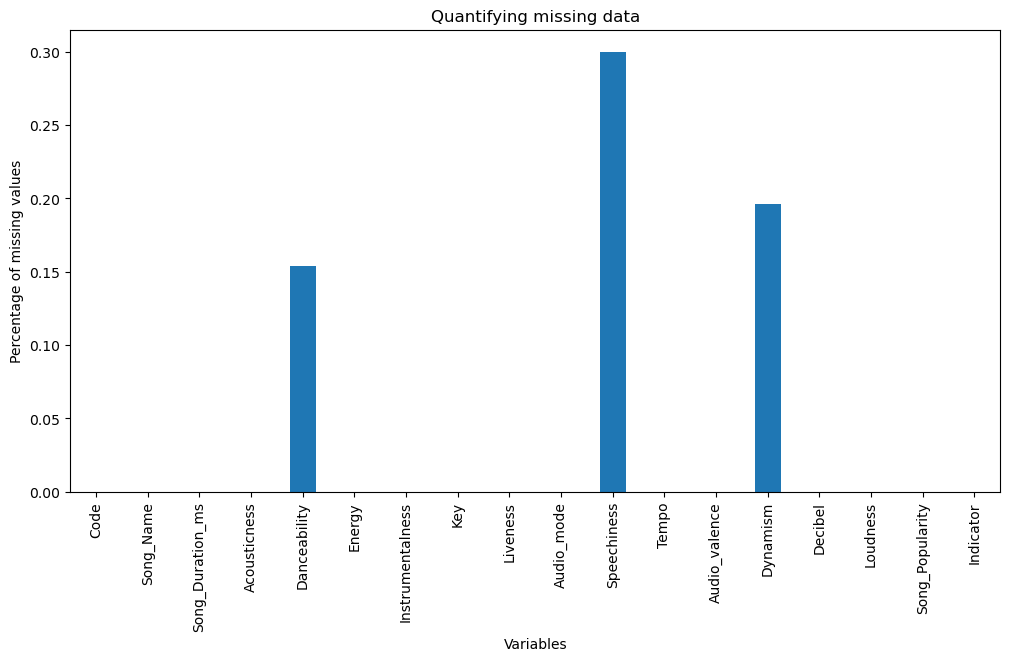

In [8]:
df.isnull().mean().plot.bar(figsize=(12,6))
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Quantifying missing data')

Text(0.5, 1.0, 'Cardinality')

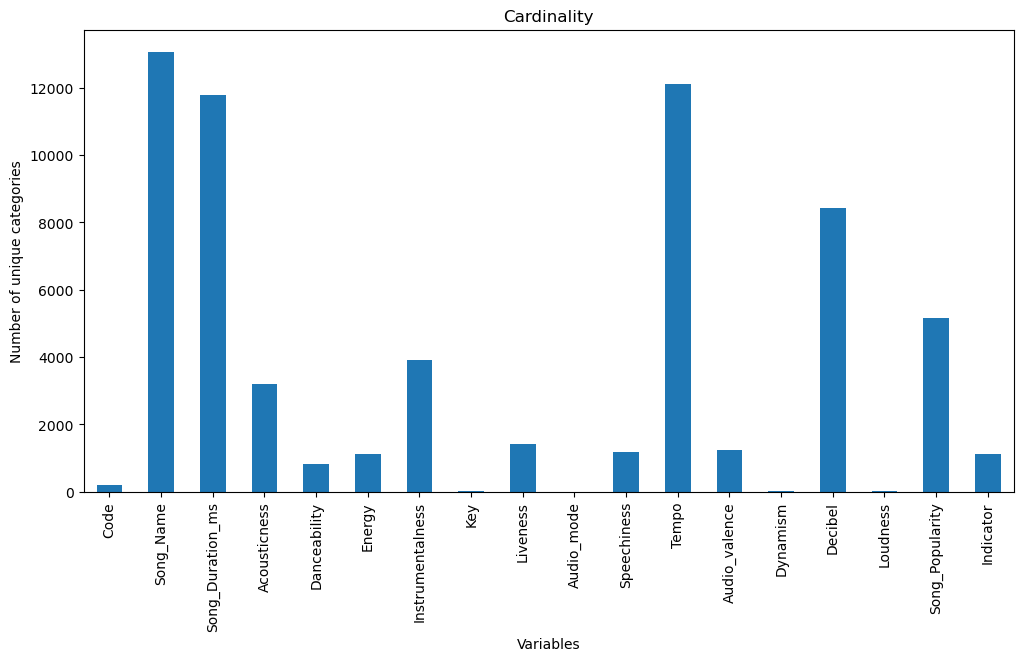

In [9]:
df.nunique().plot.bar(figsize=(12,6))

plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

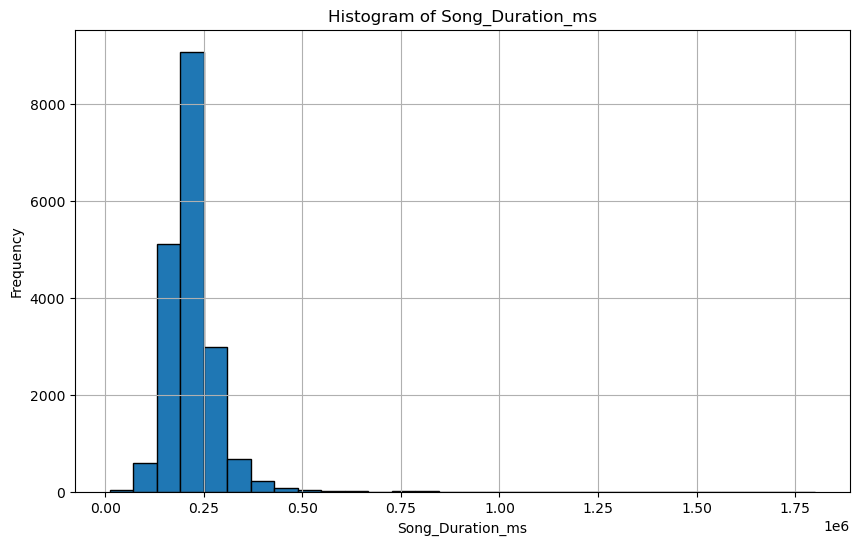

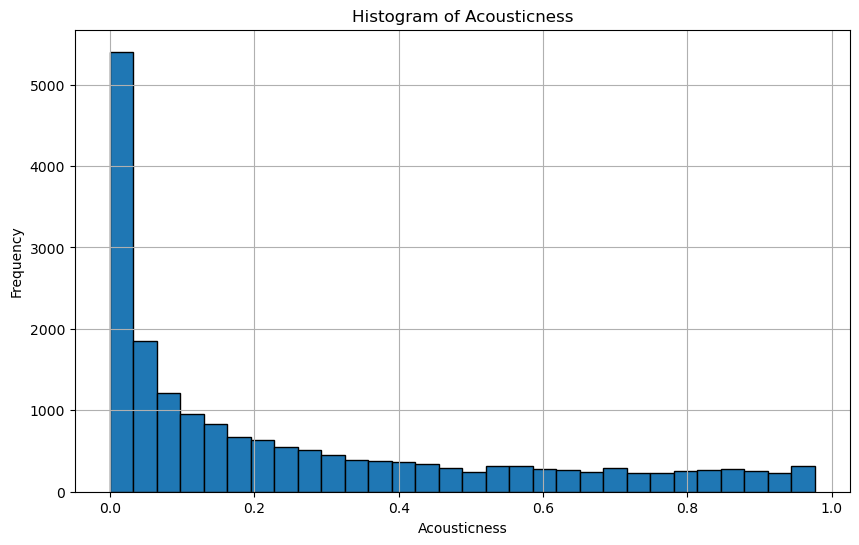

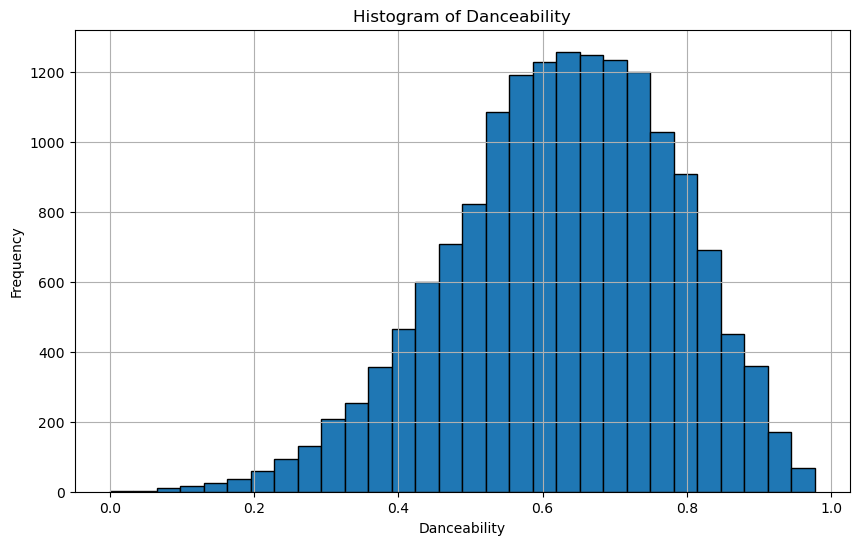

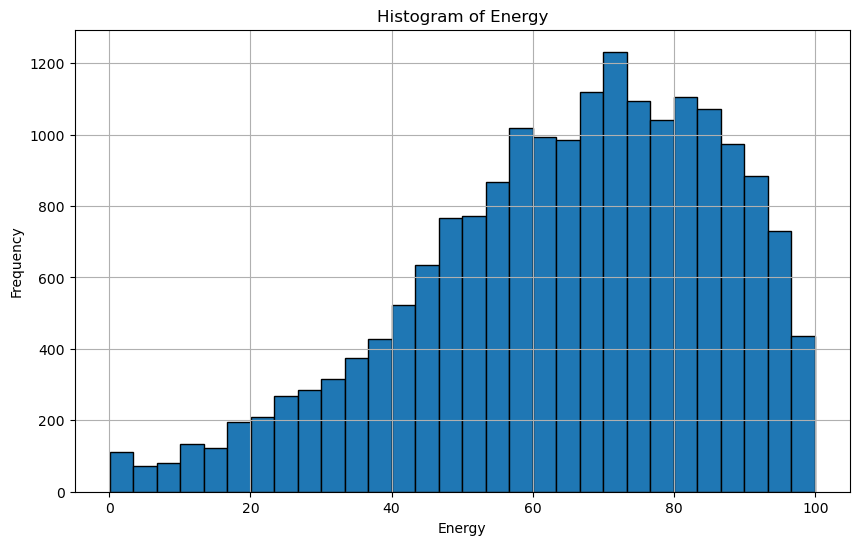

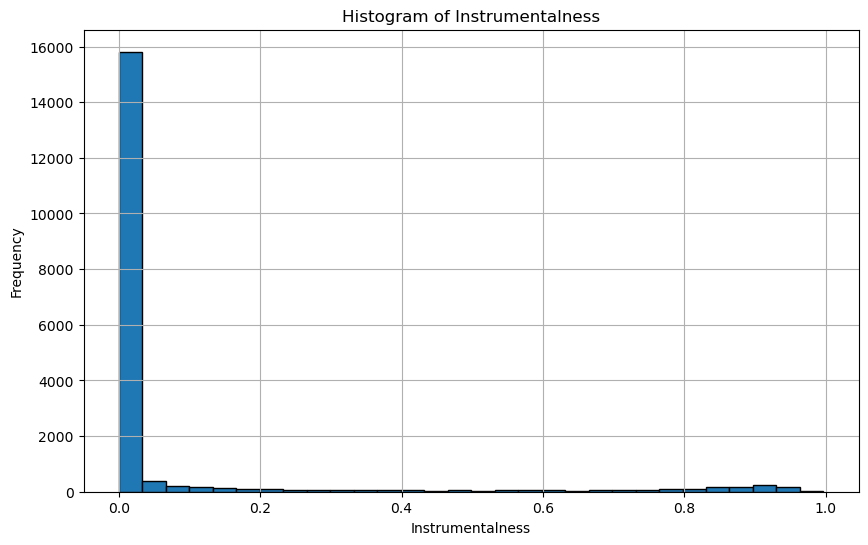

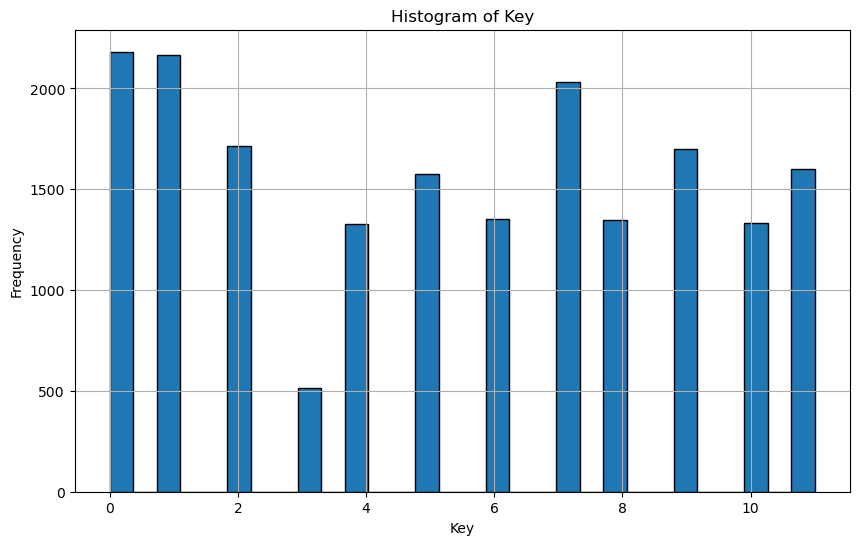

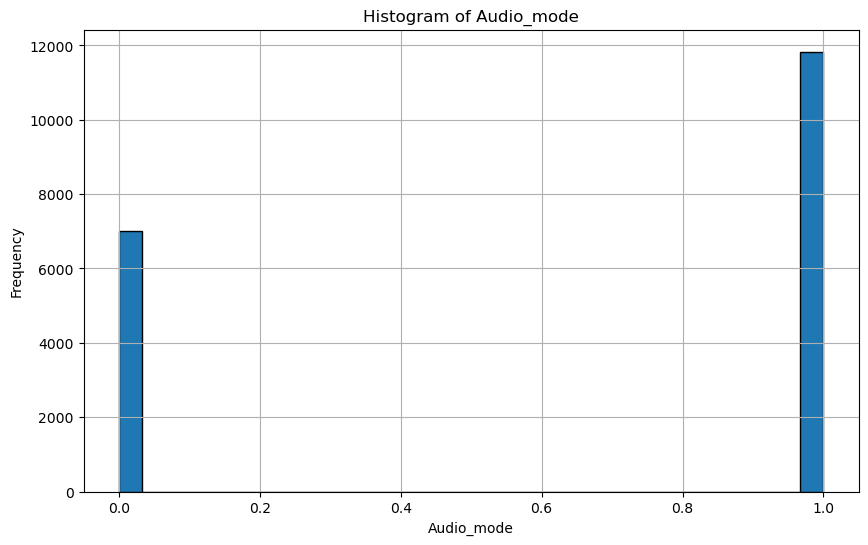

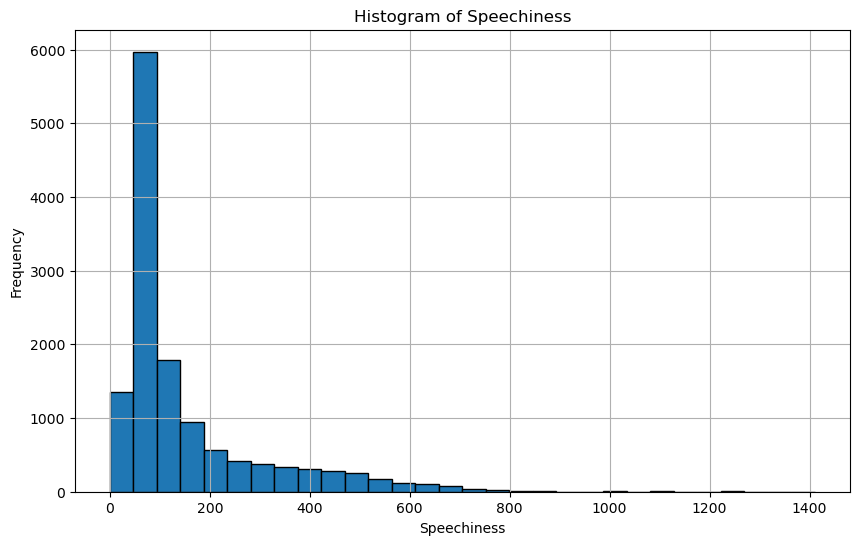

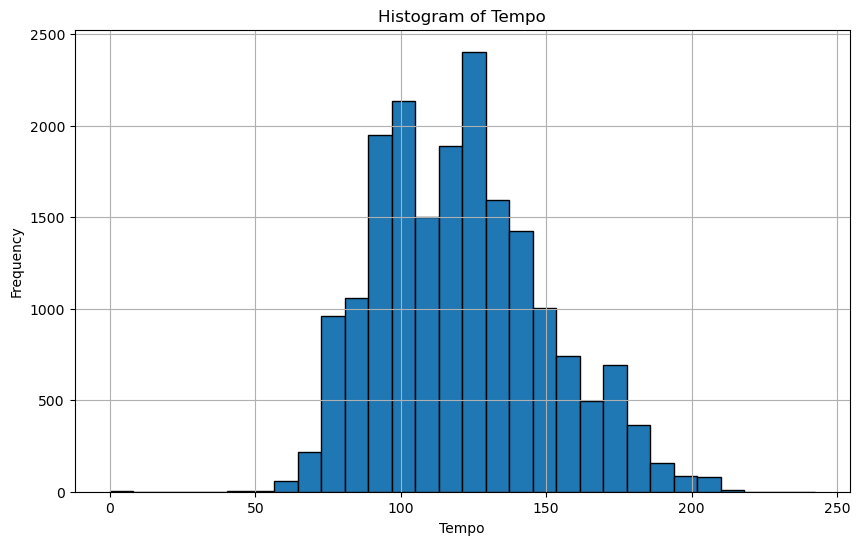

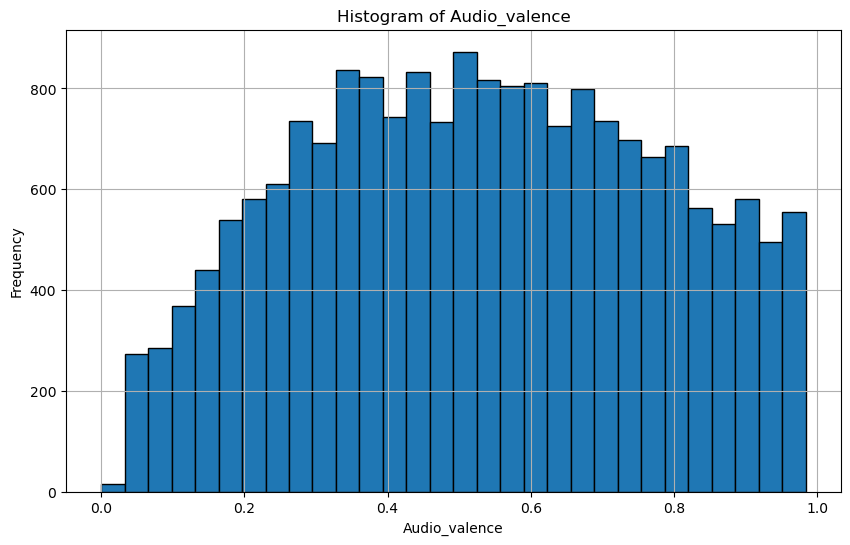

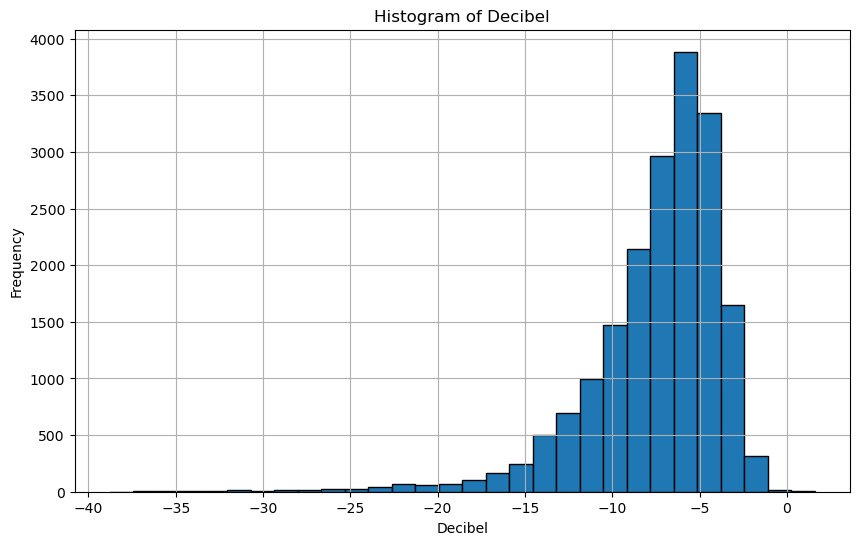

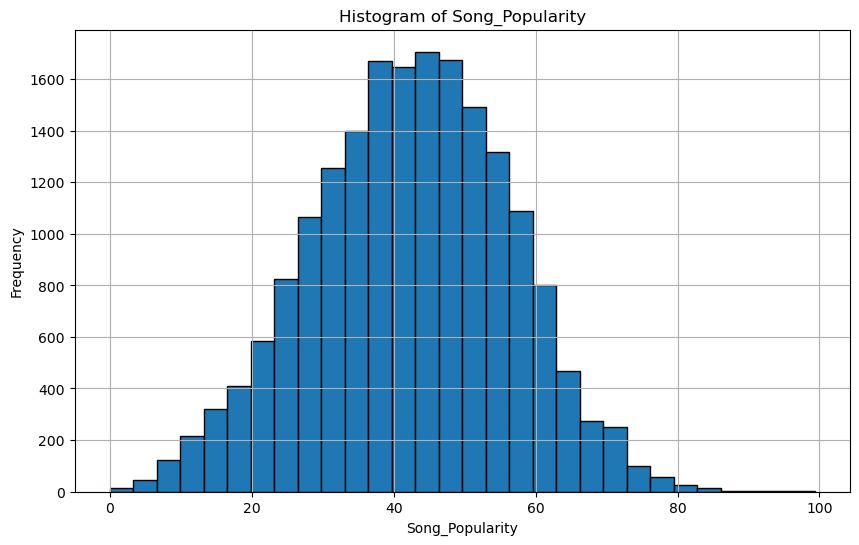

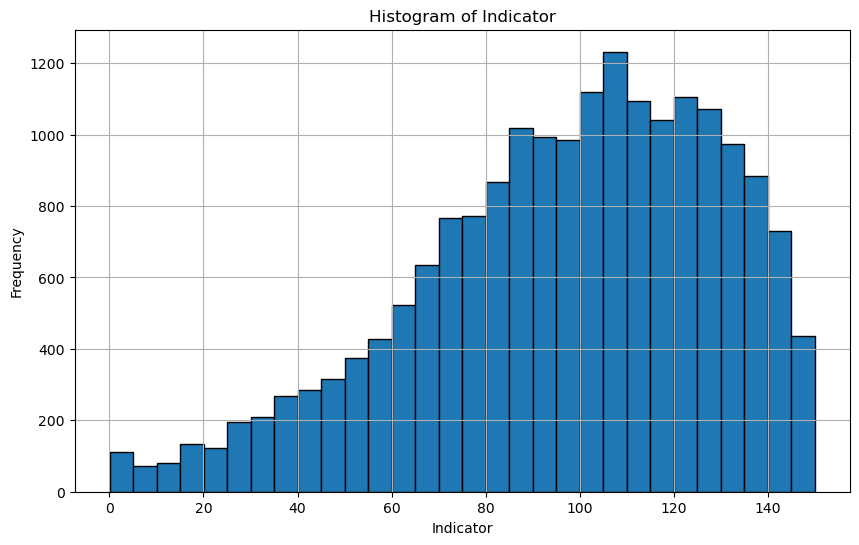

In [10]:
# Identify quantitative variables
quantitative_columns = df.select_dtypes(include='number').columns

# Create histograms for each quantitative variable
for column in quantitative_columns:
    plt.figure(figsize=(10, 6))
    plt.hist(df[column], bins=30, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

['Liveness', 'Dynamism', 'Loudness']


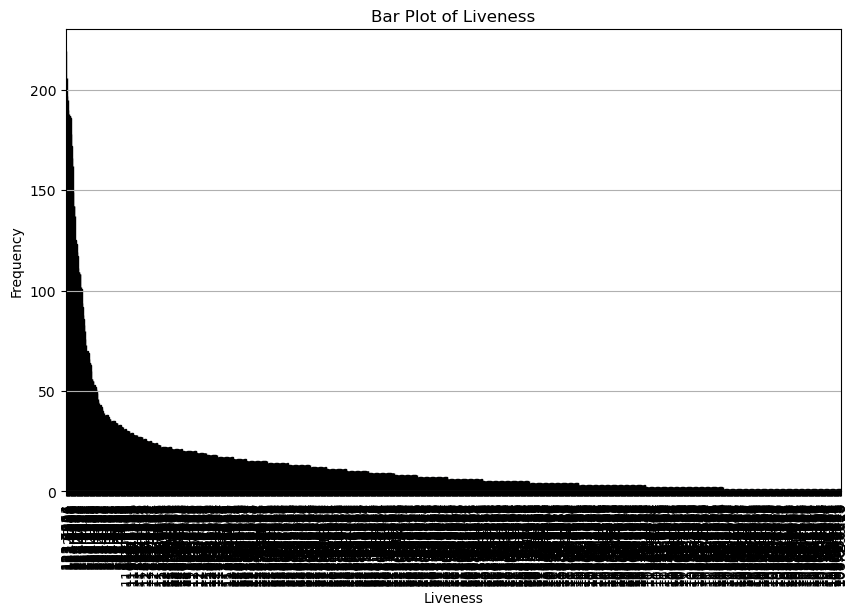

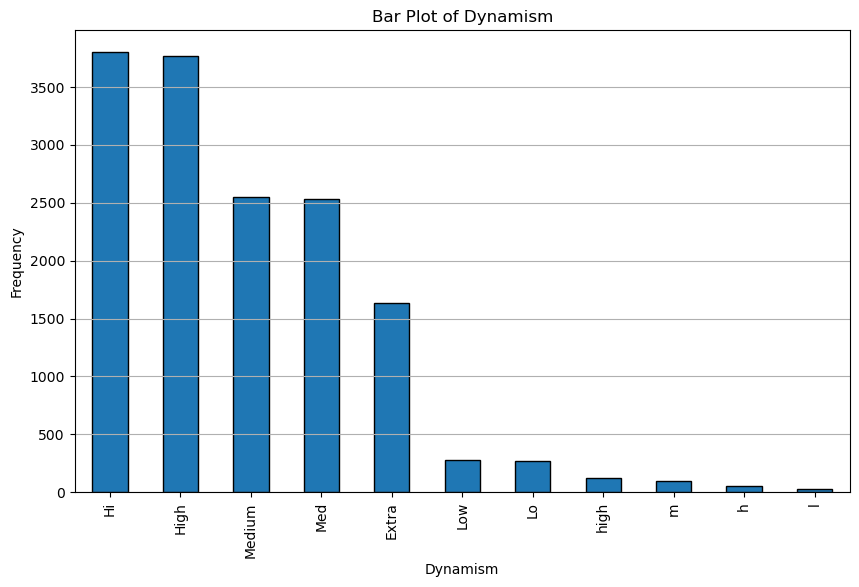

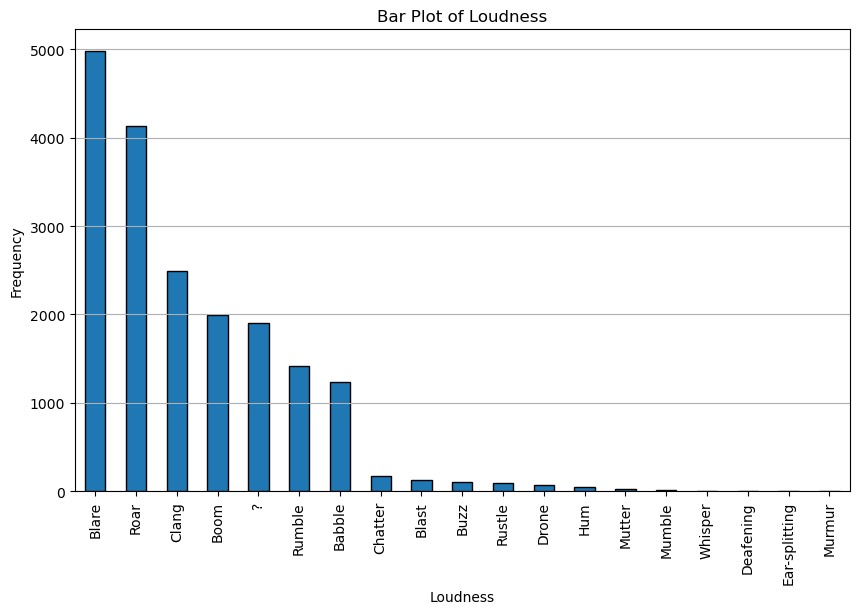

In [11]:
# Identify qualitative variables
qualitative_columns = df.select_dtypes(include=['object', 'category']).columns

# Exclude specific columns
excluded_columns = ['Code', 'Song_Name']
qualitative_columns = [col for col in qualitative_columns if col not in excluded_columns]

print(qualitative_columns)  # Optional: to check the columns being plotted

# Create bar plots for each qualitative variable
for column in qualitative_columns:
    plt.figure(figsize=(10, 6))
    df[column].value_counts().plot(kind='bar', edgecolor='black')
    plt.title(f'Bar Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    plt.show()

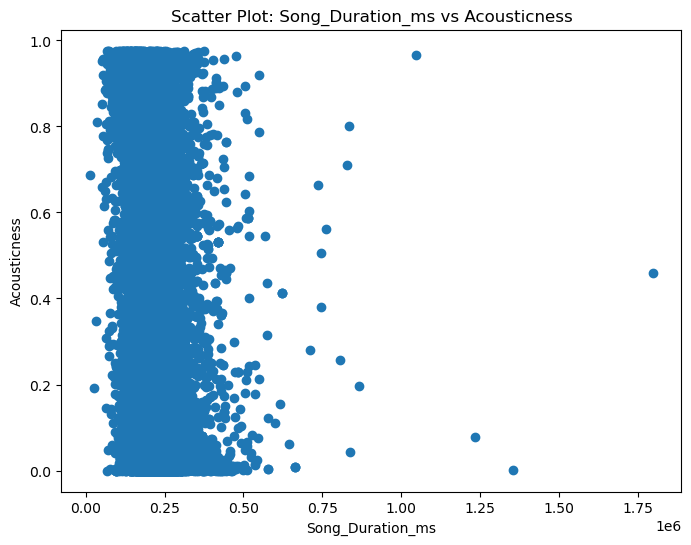

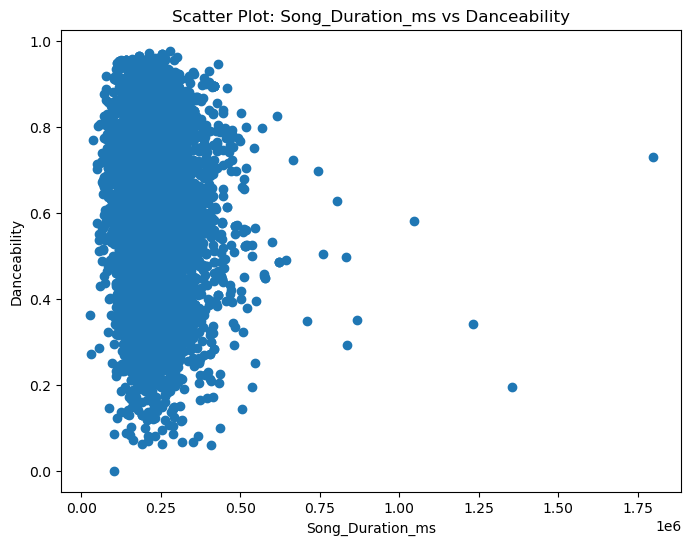

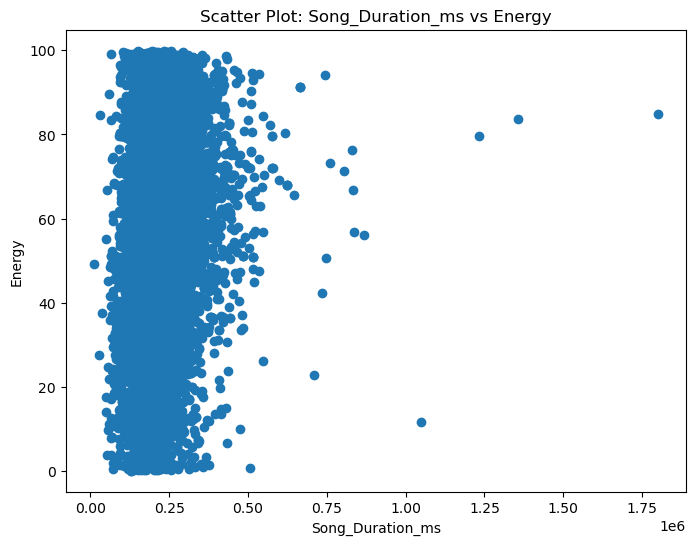

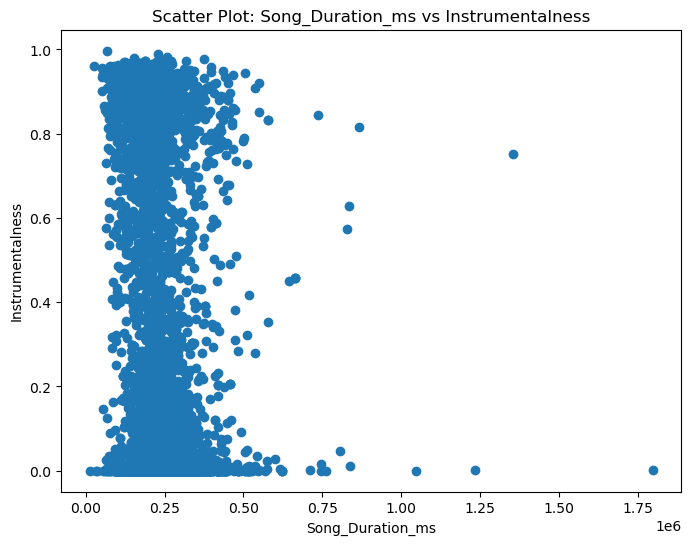

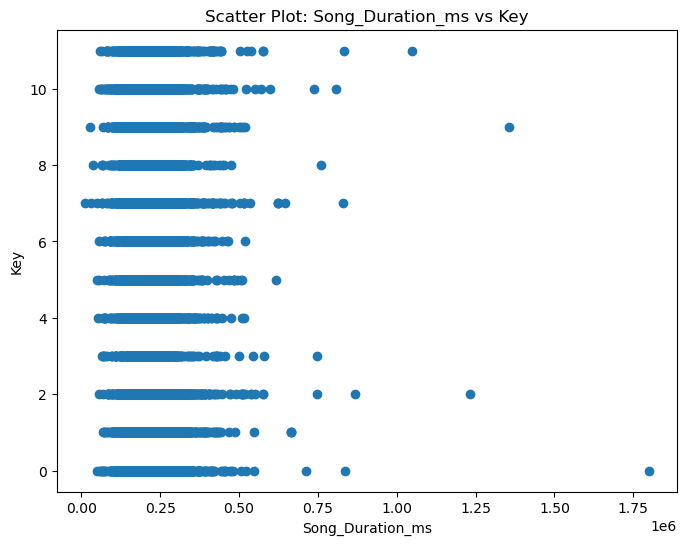

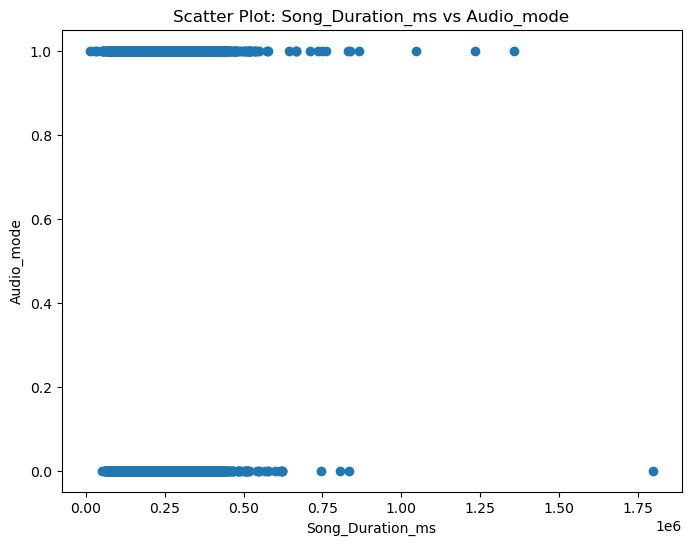

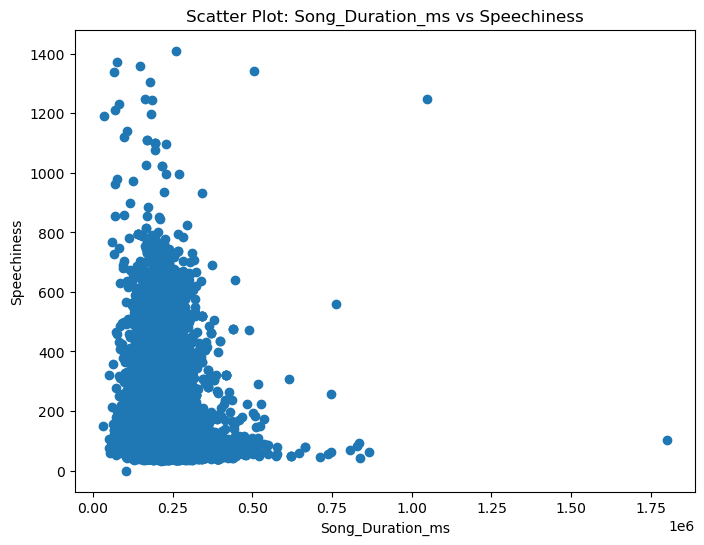

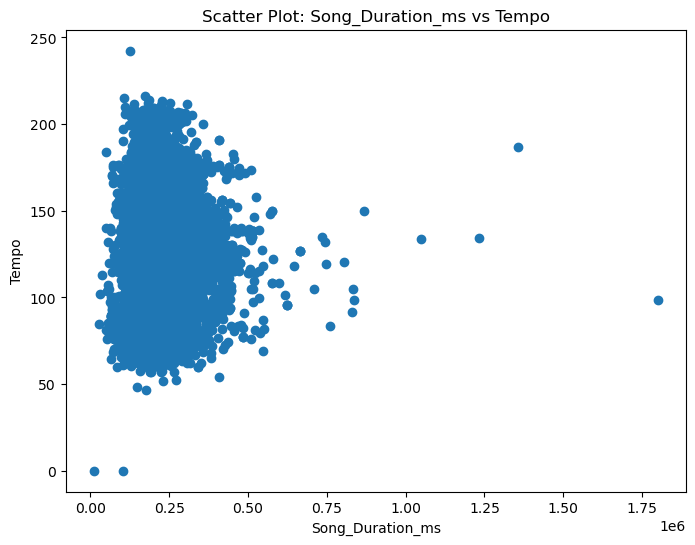

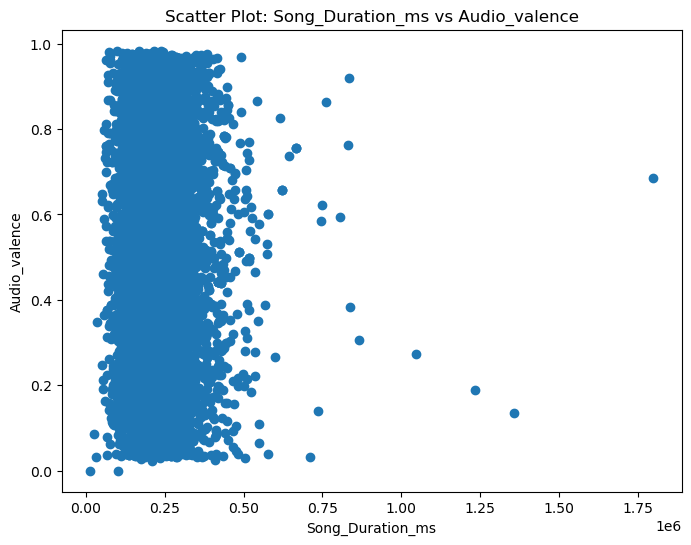

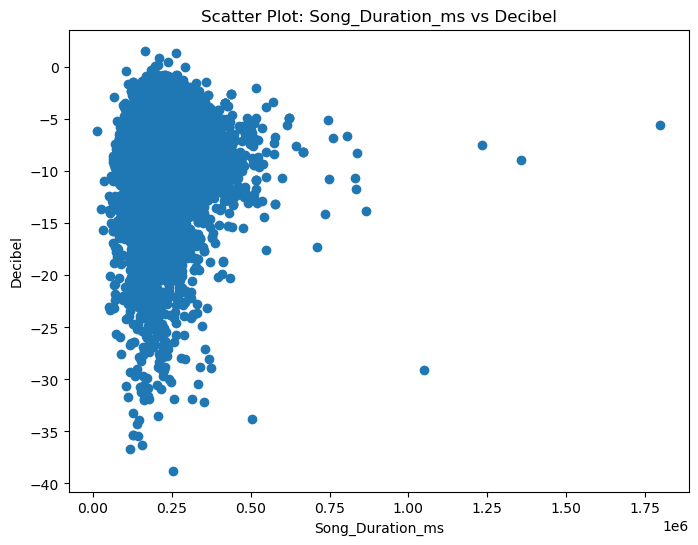

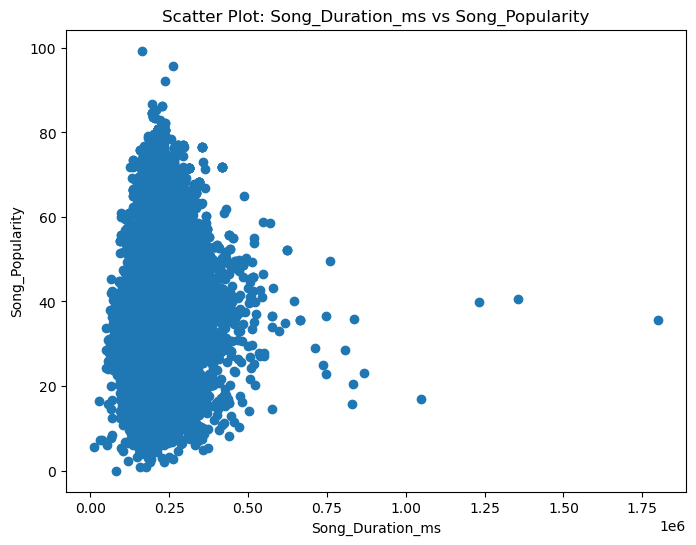

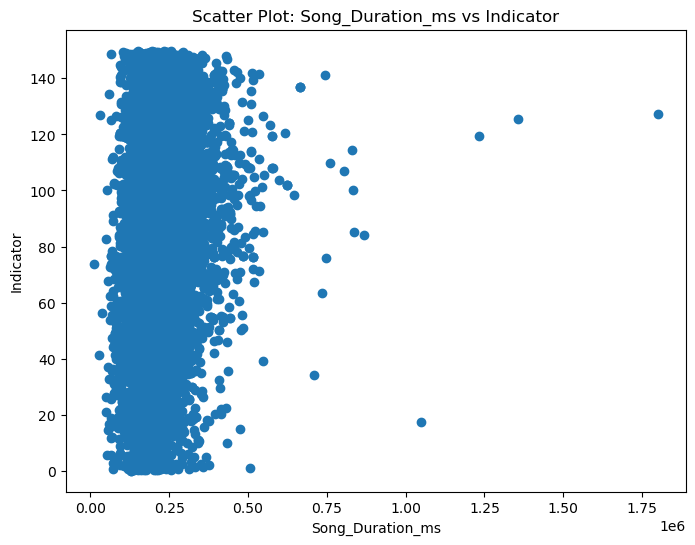

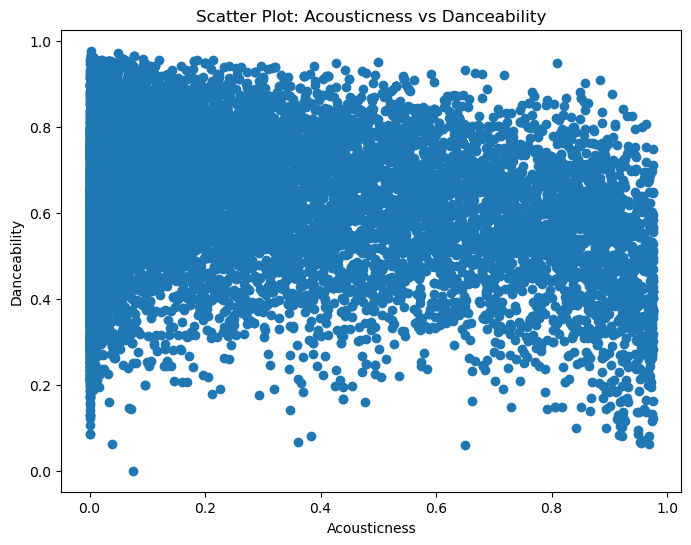

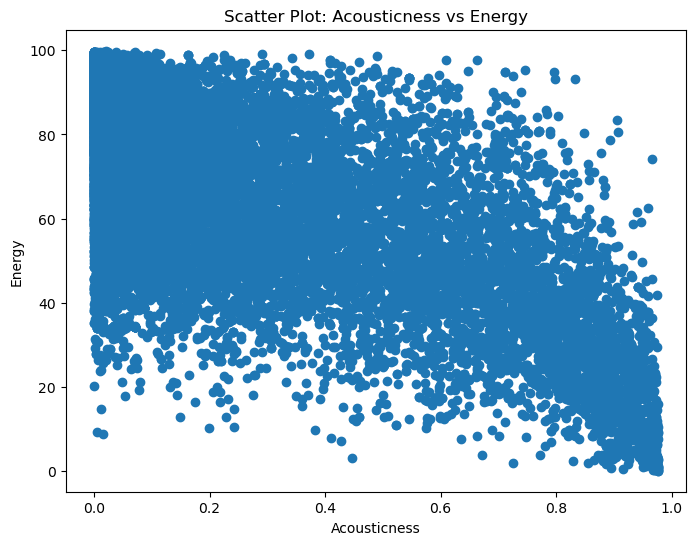

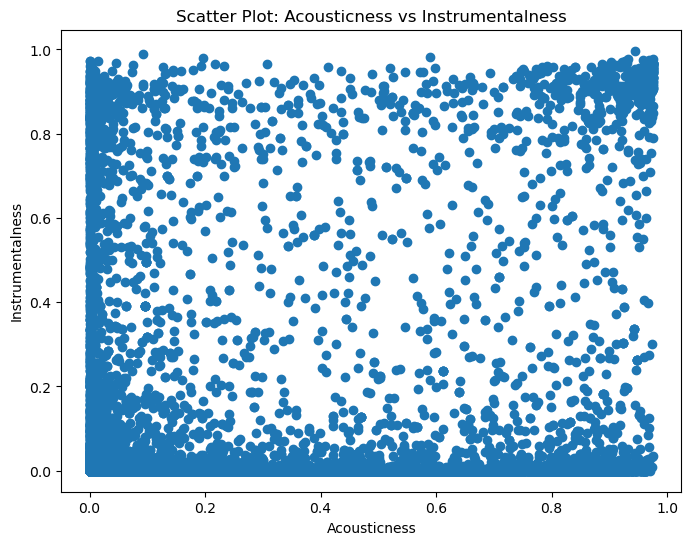

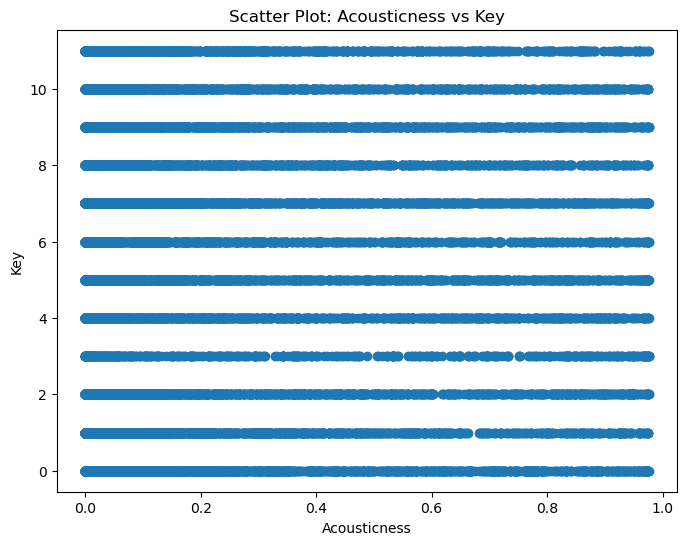

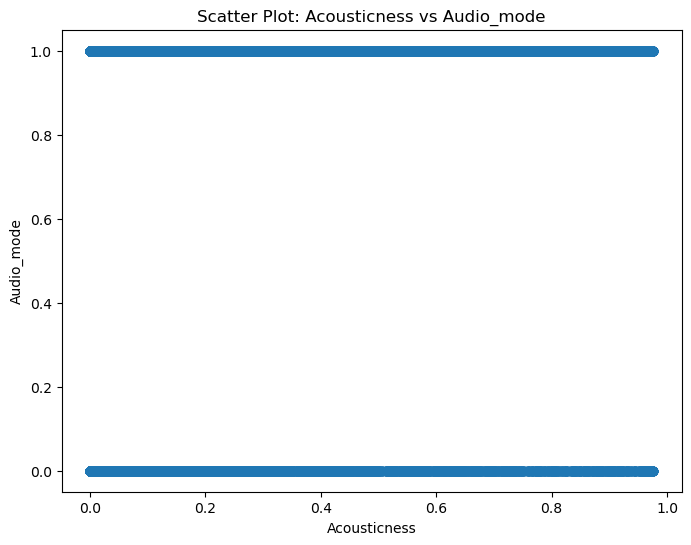

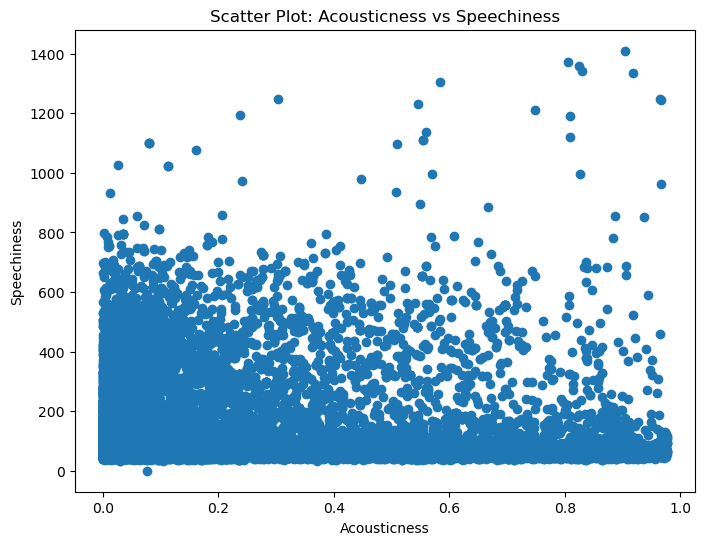

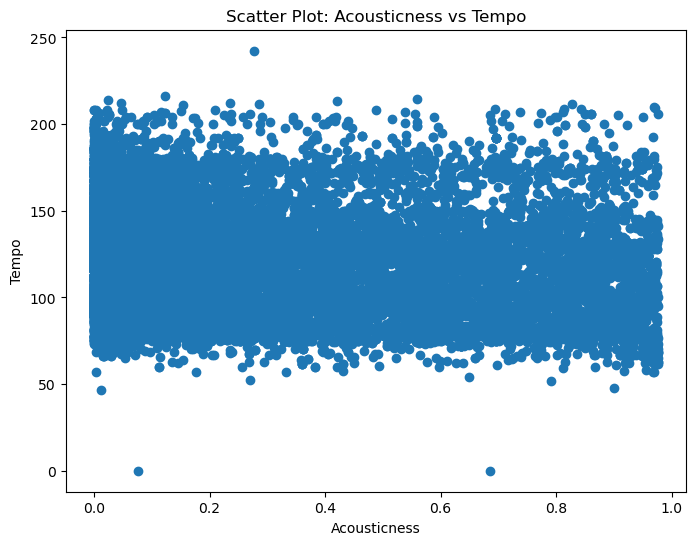

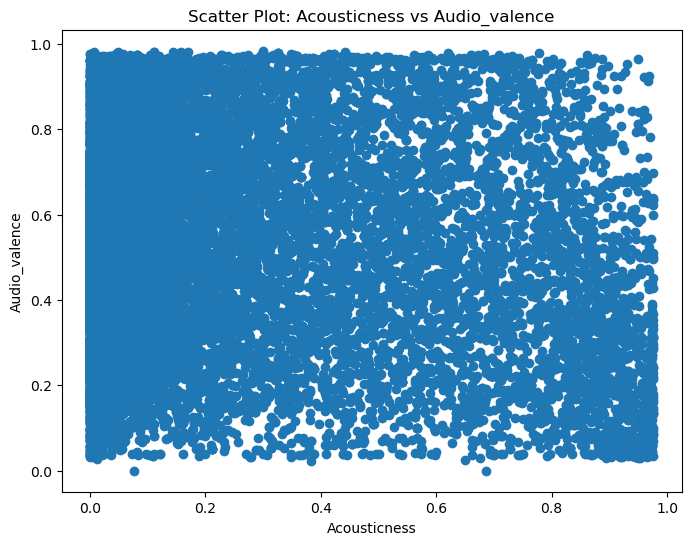

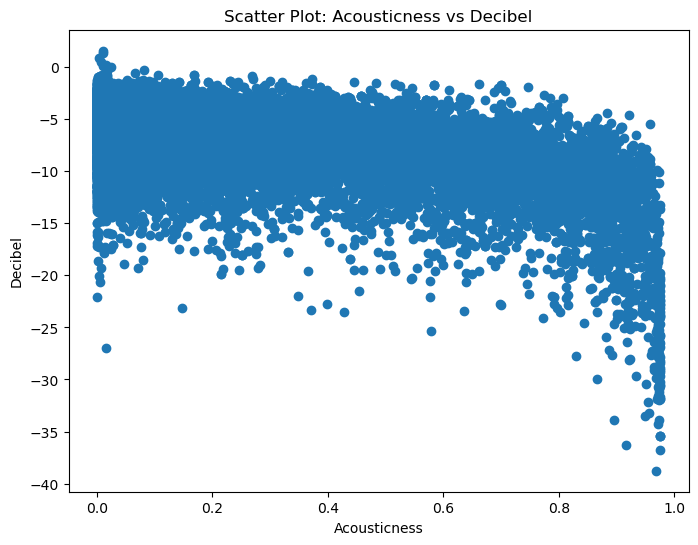

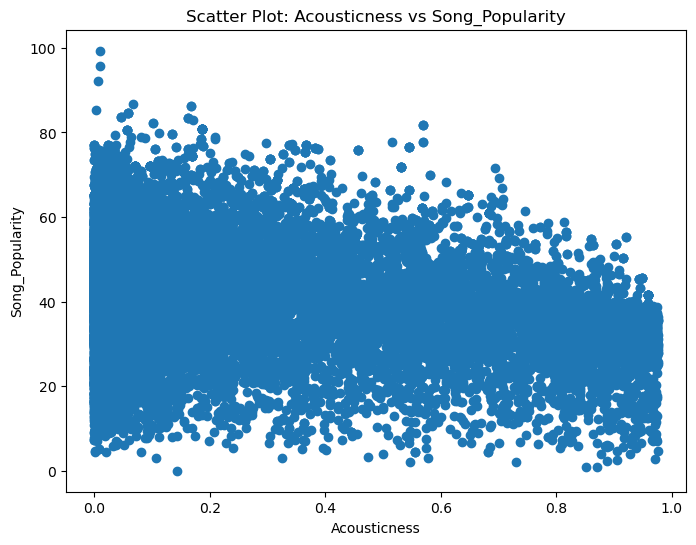

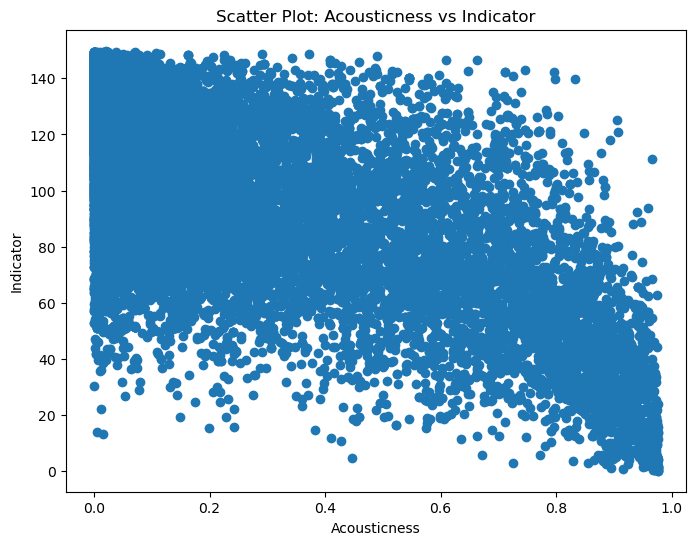

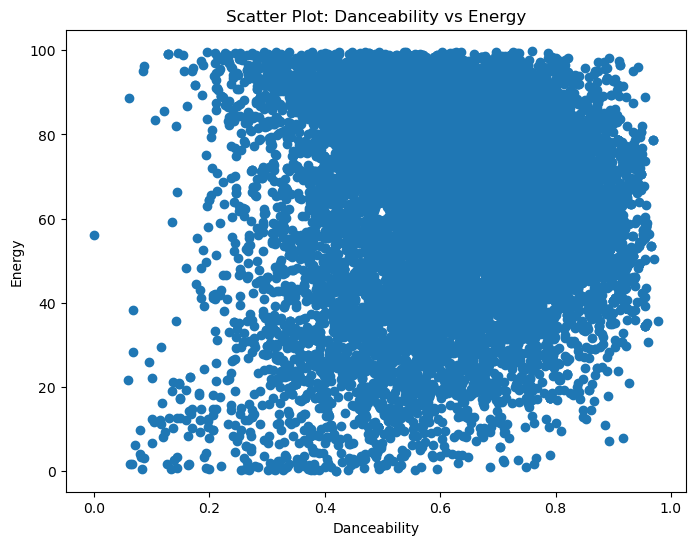

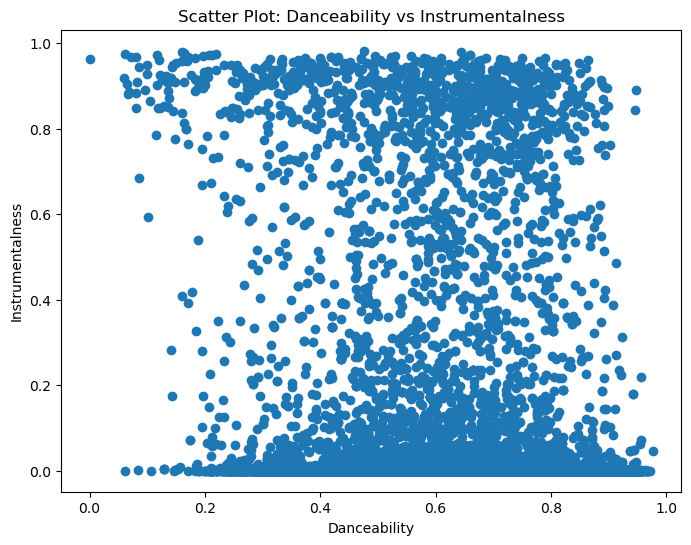

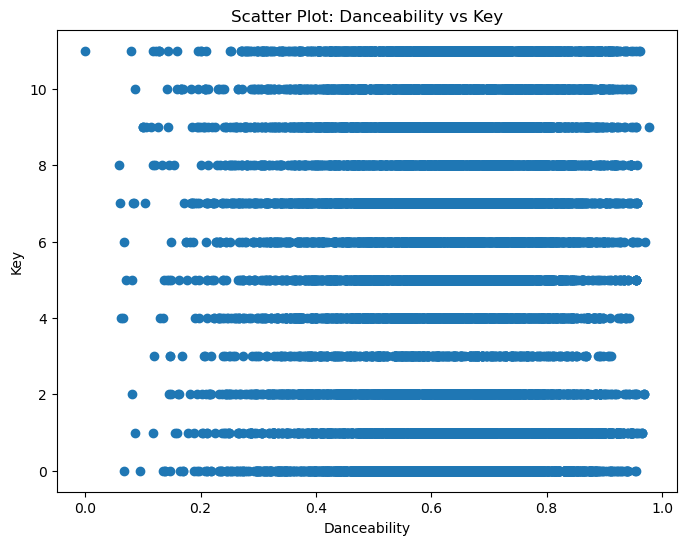

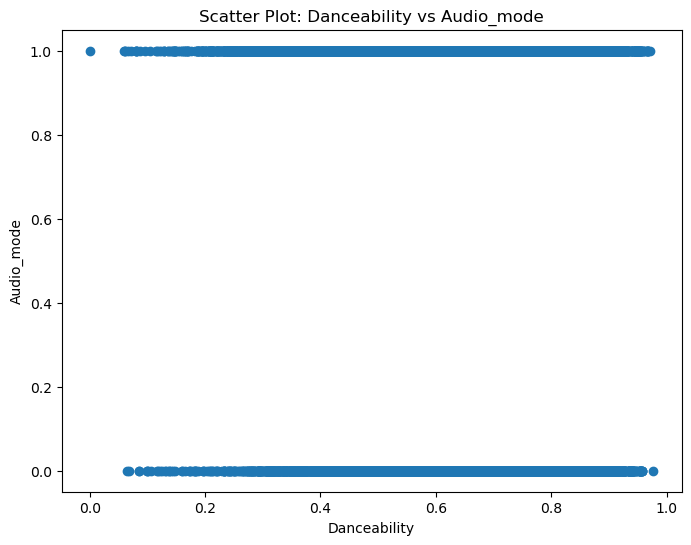

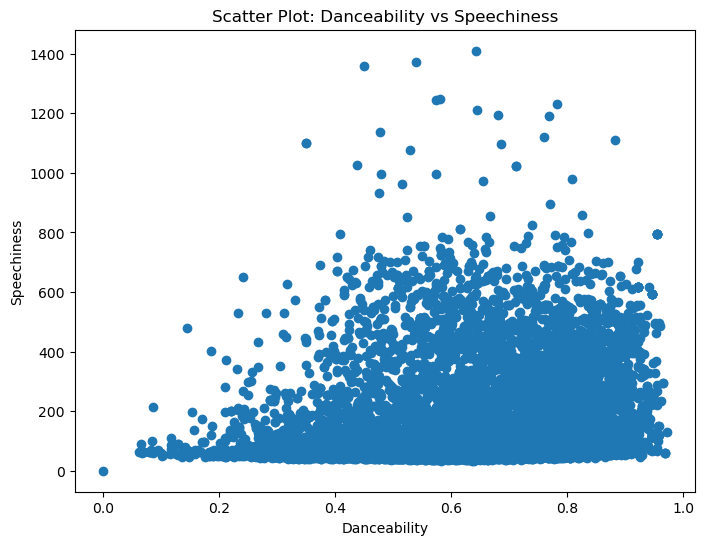

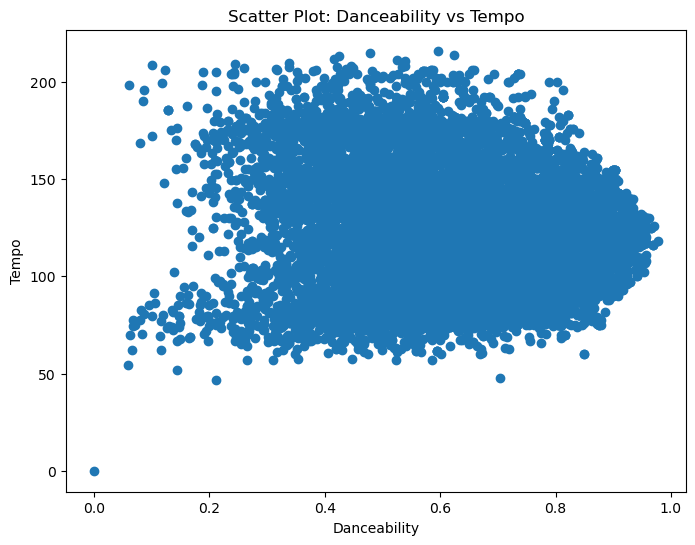

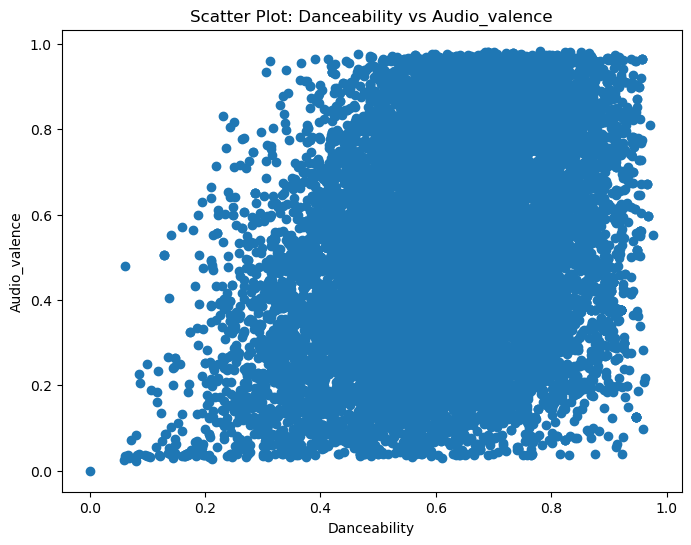

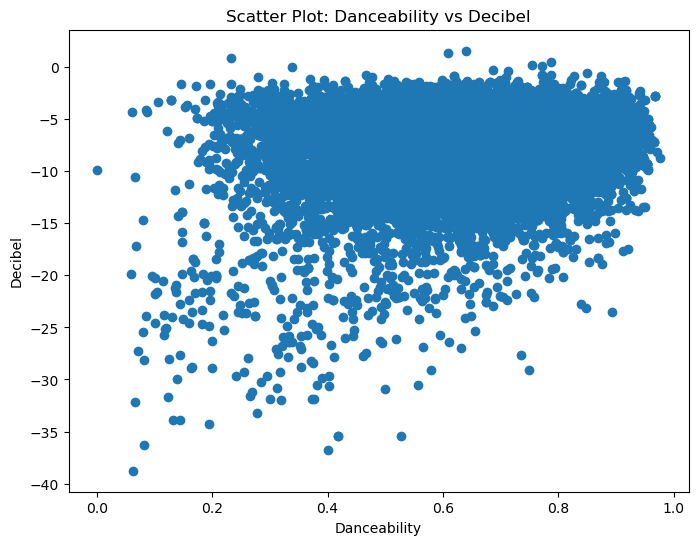

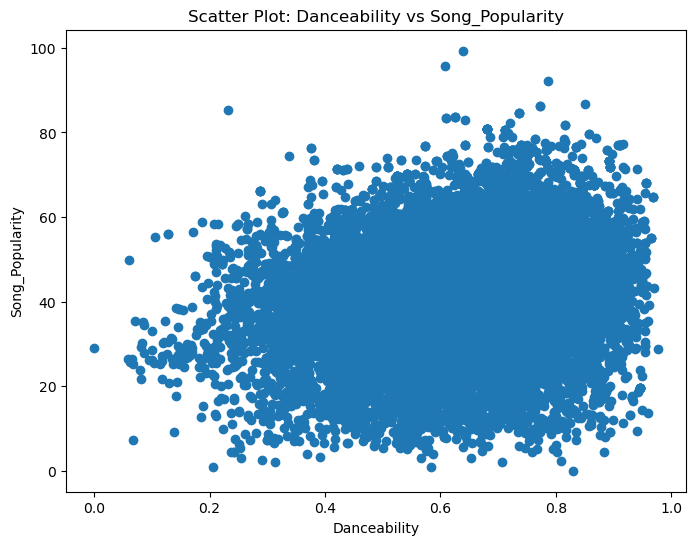

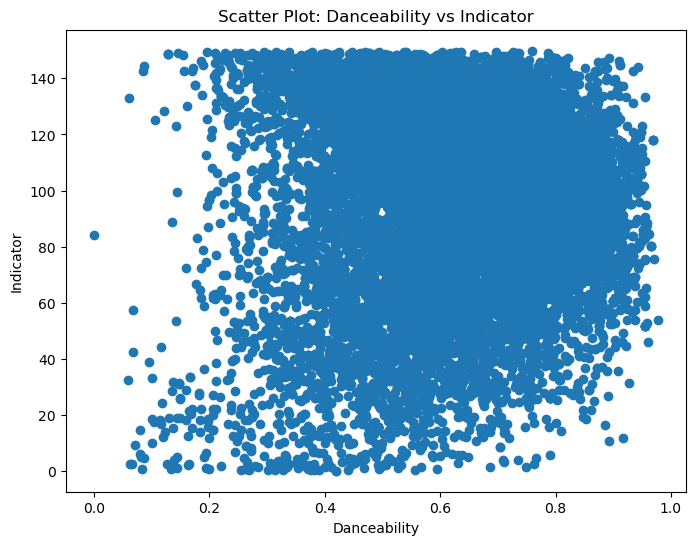

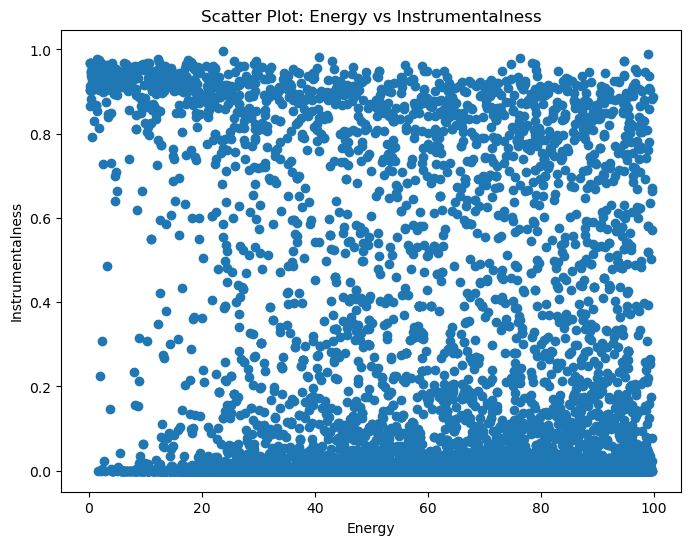

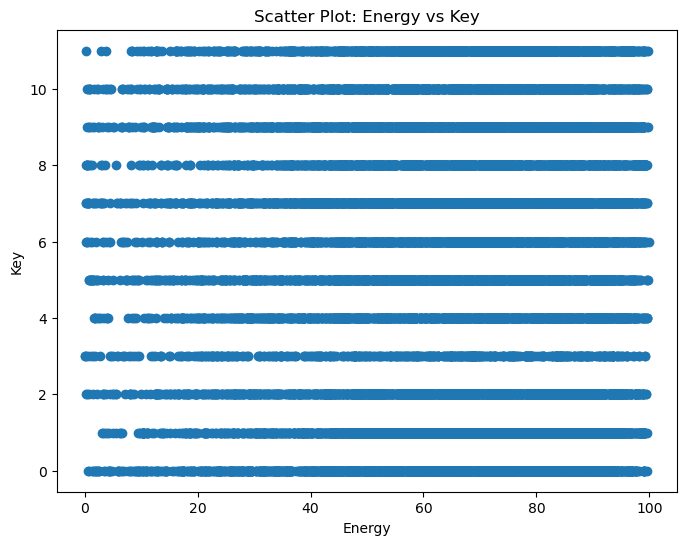

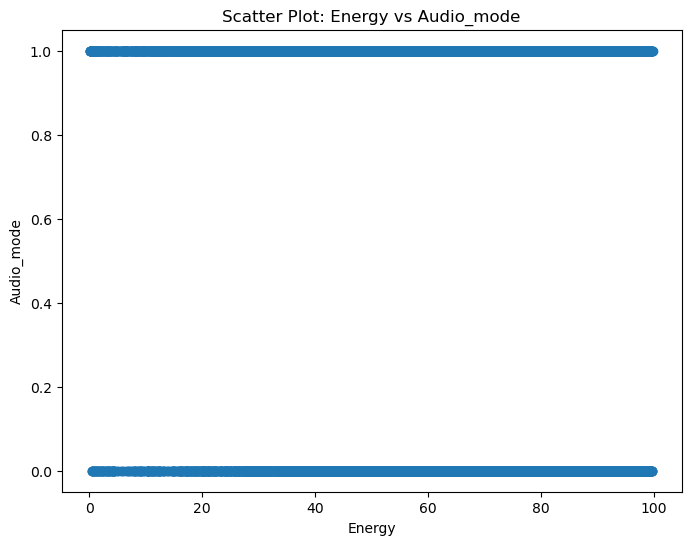

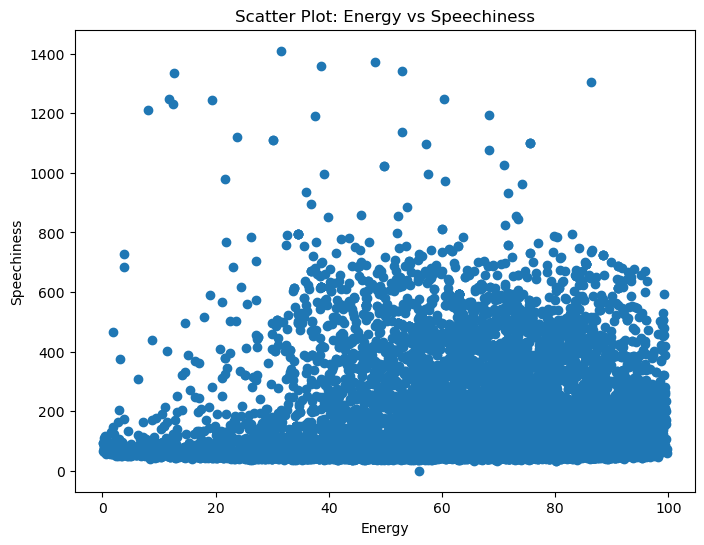

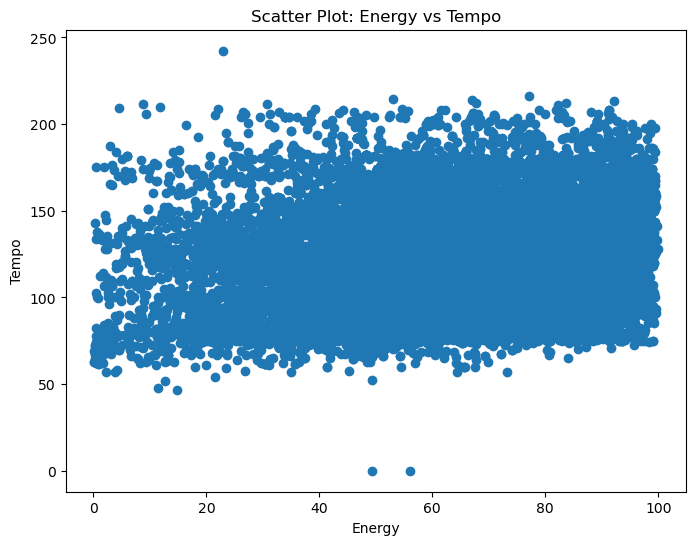

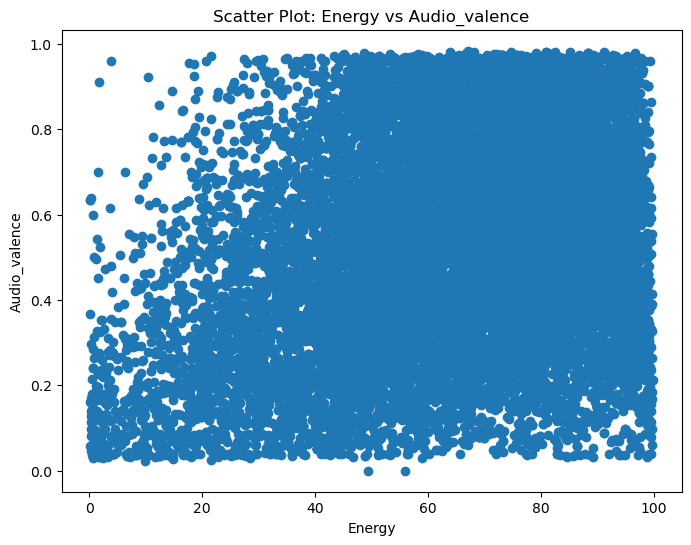

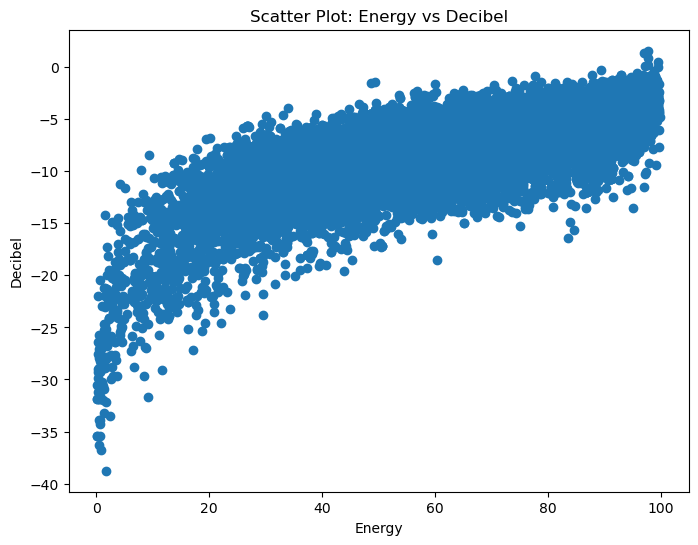

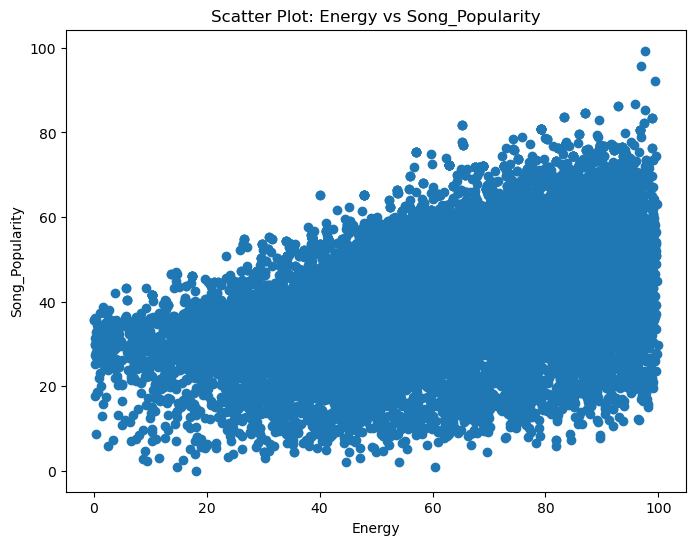

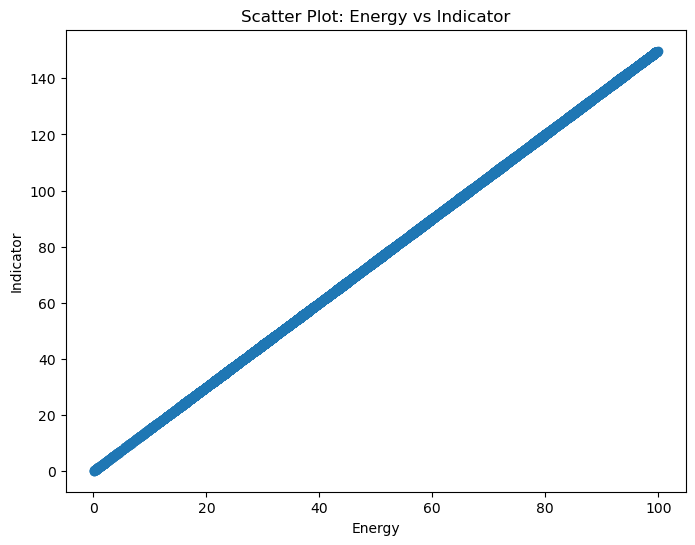

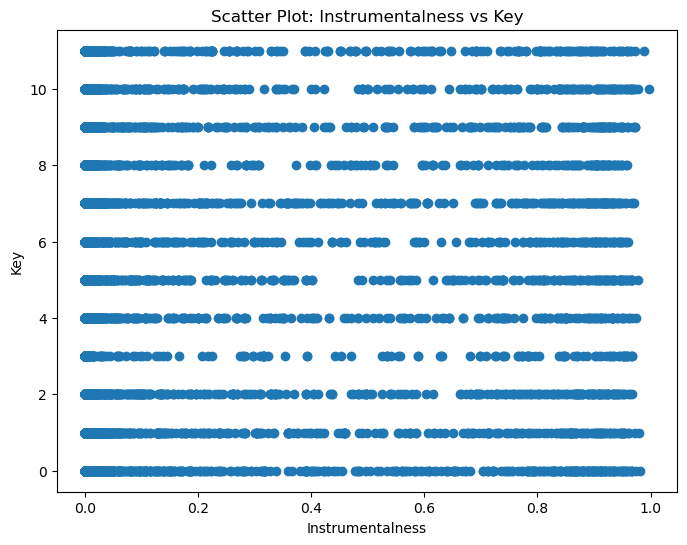

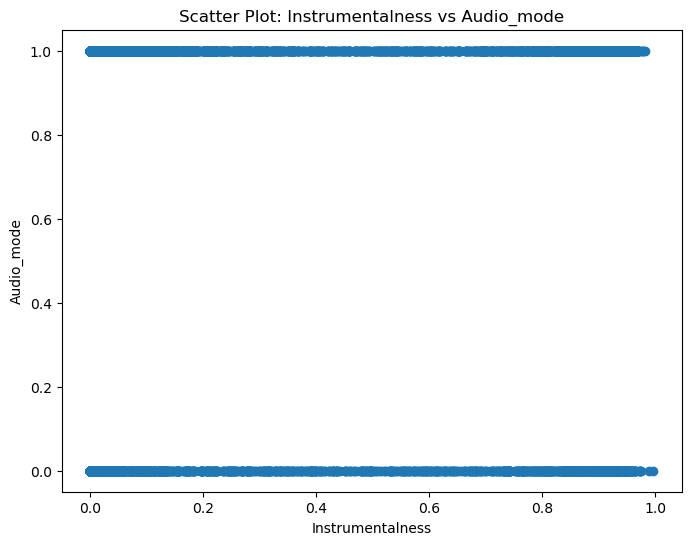

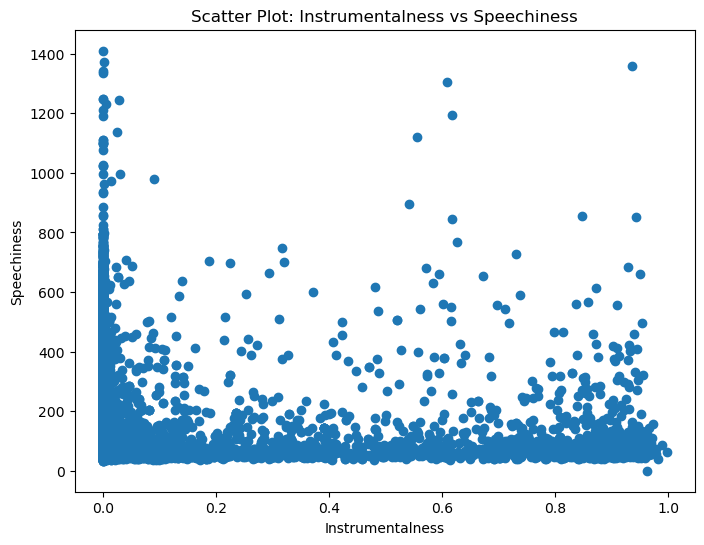

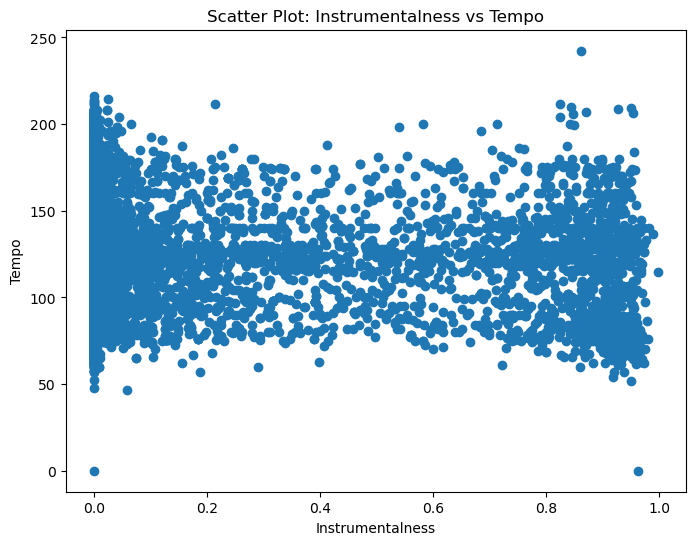

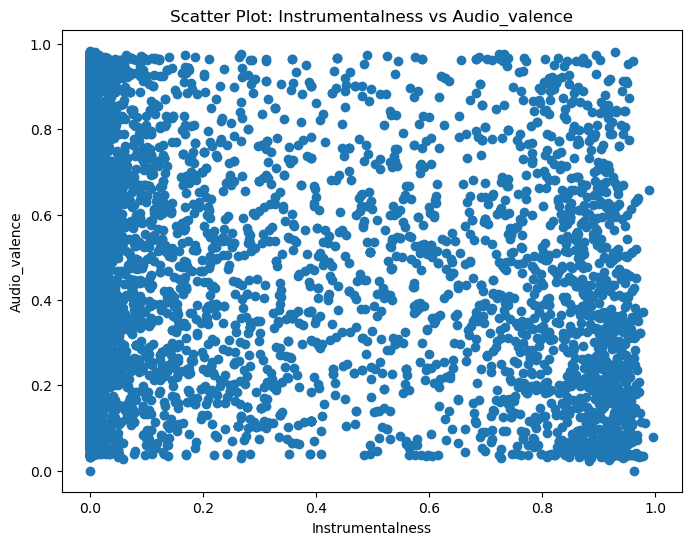

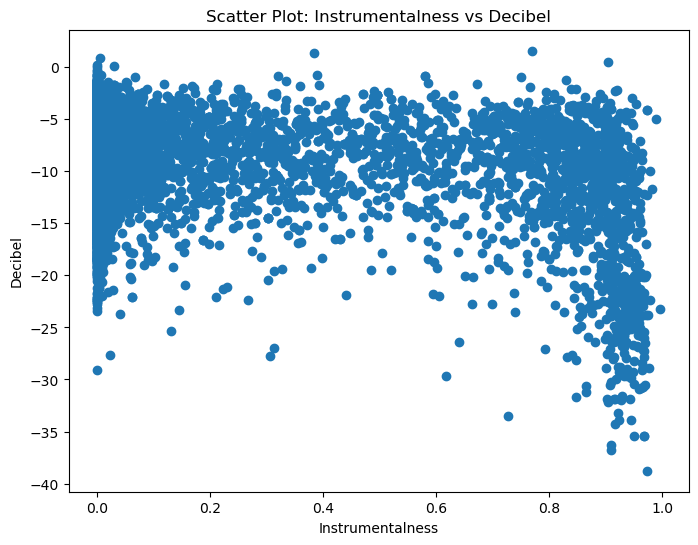

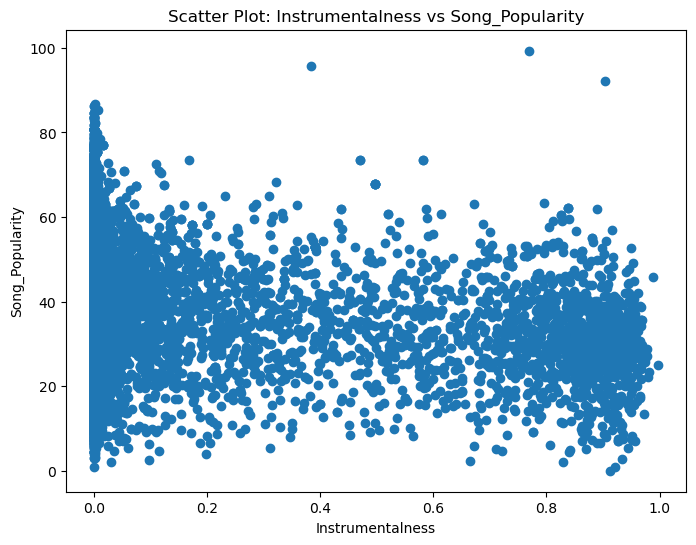

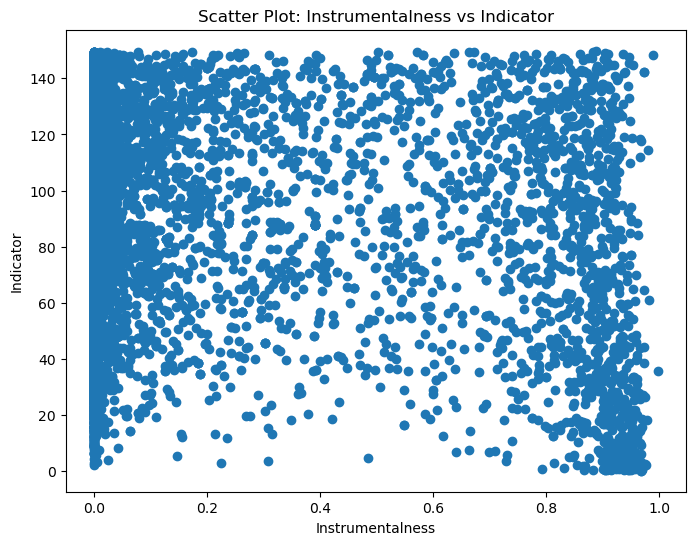

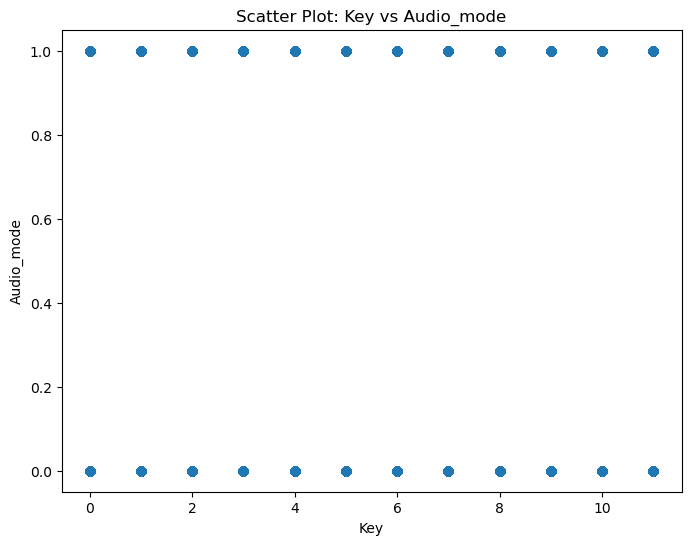

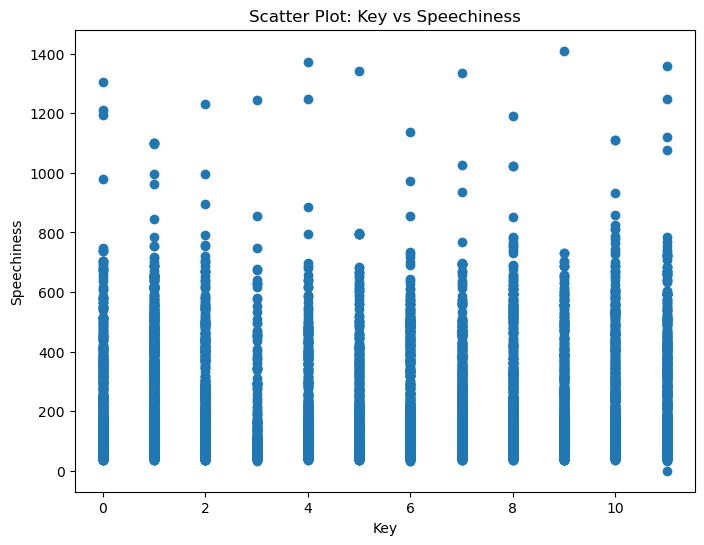

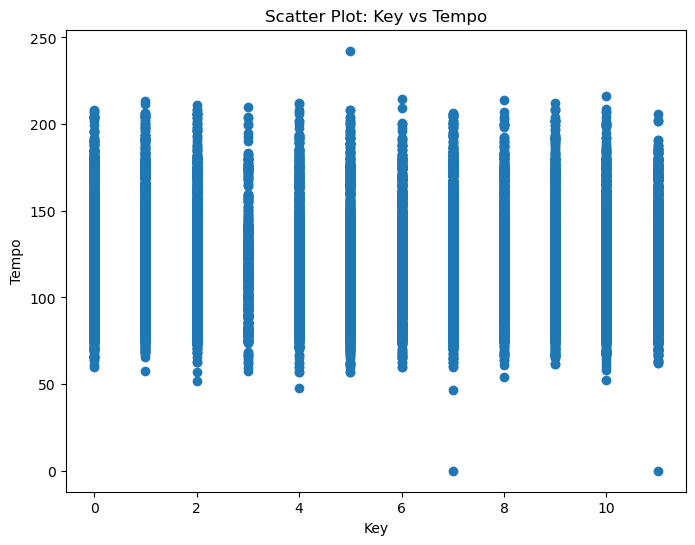

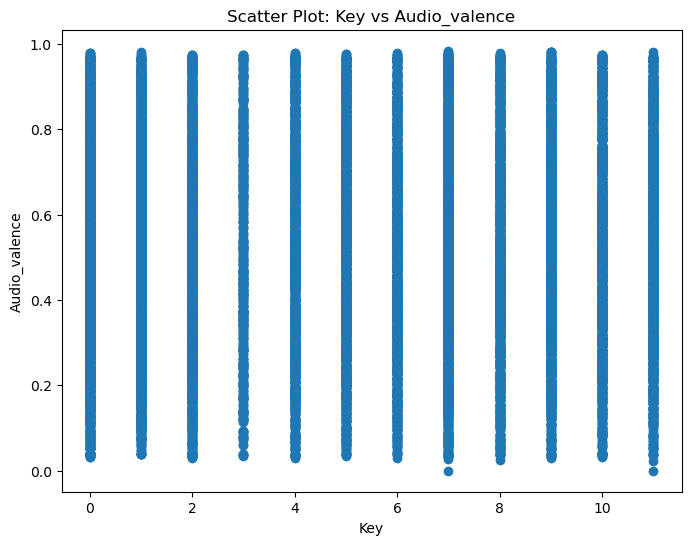

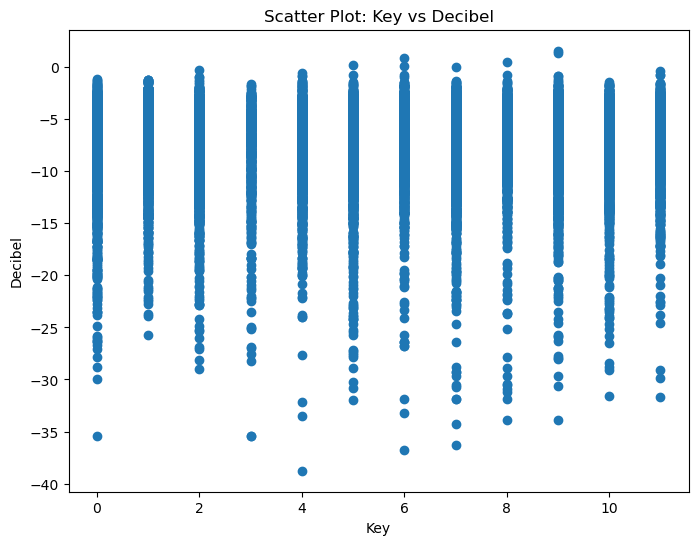

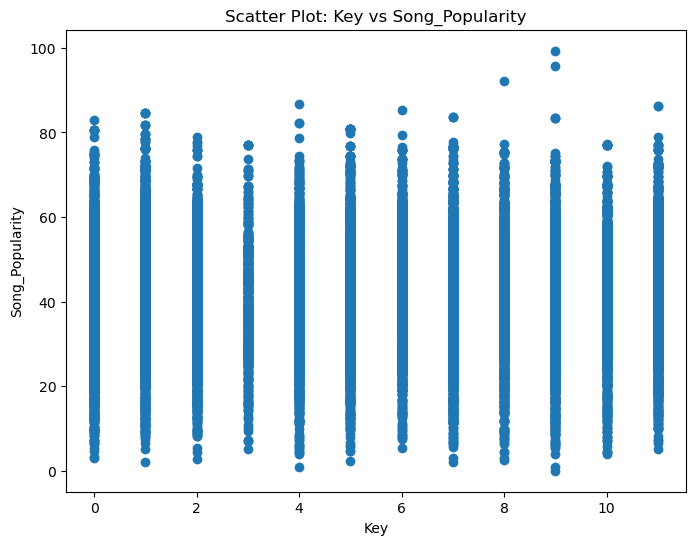

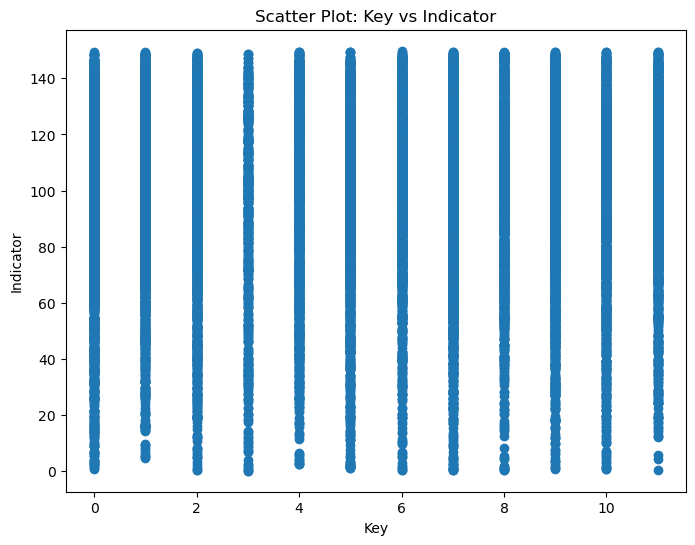

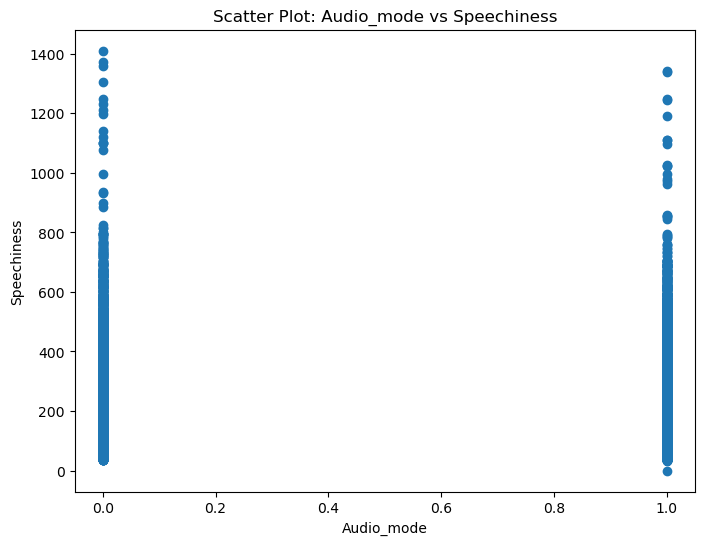

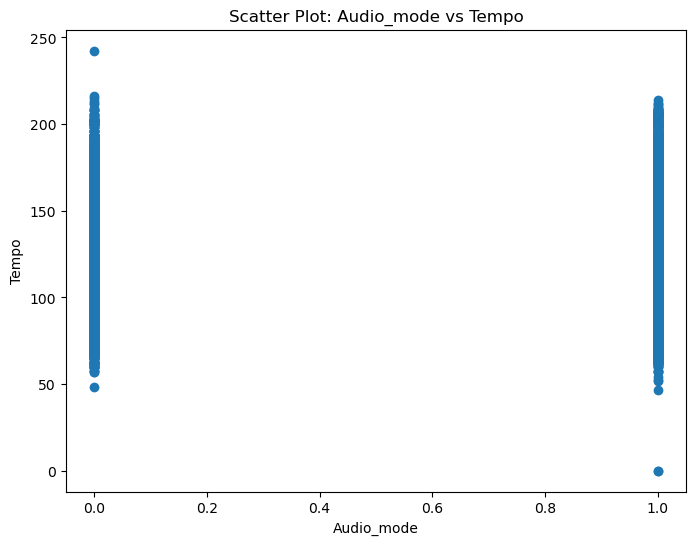

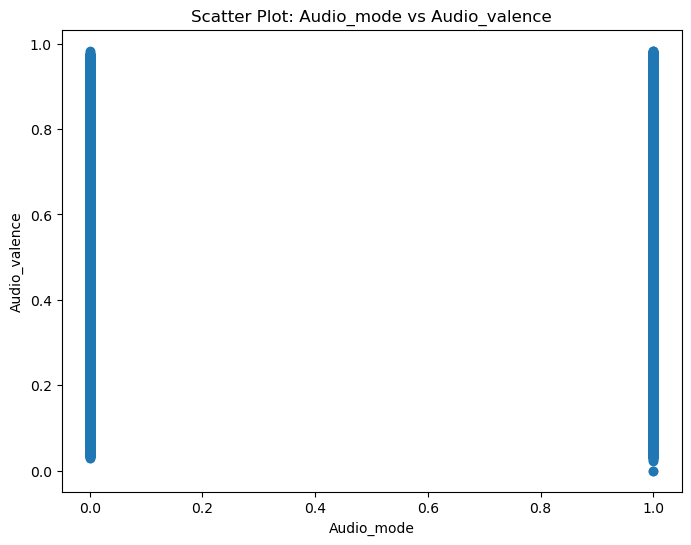

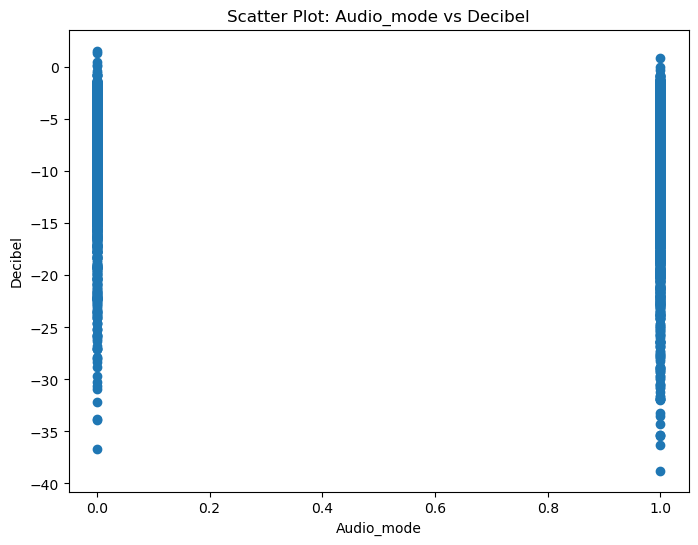

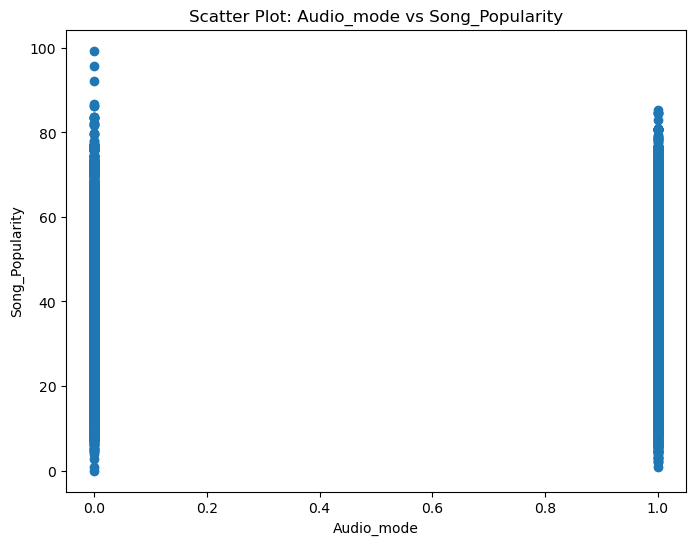

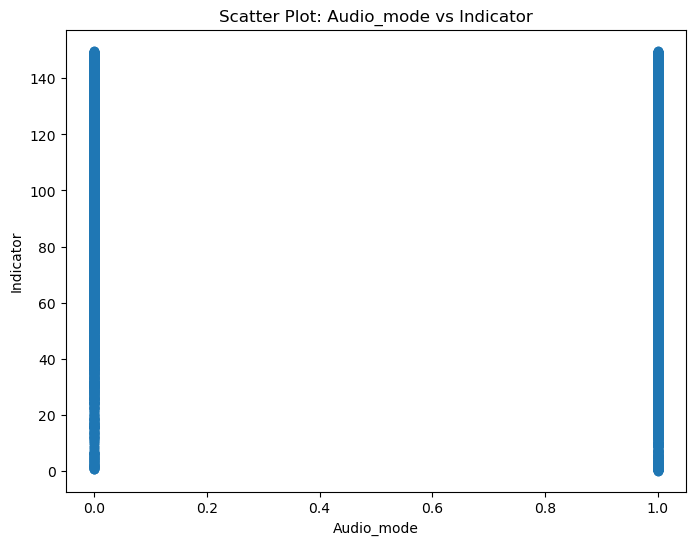

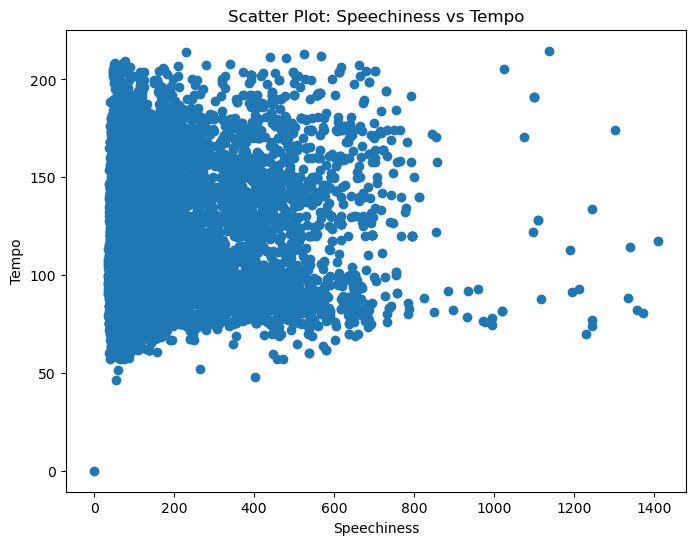

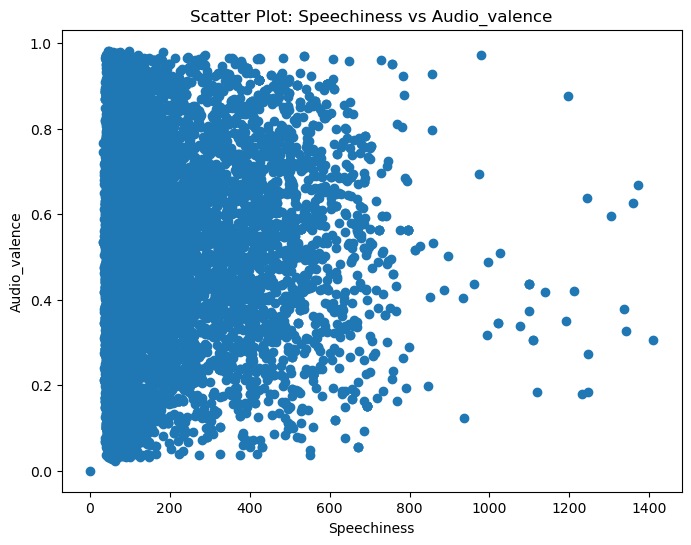

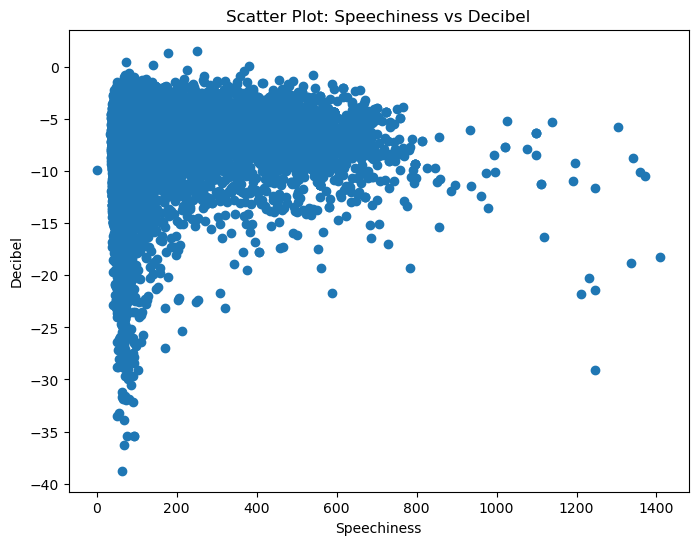

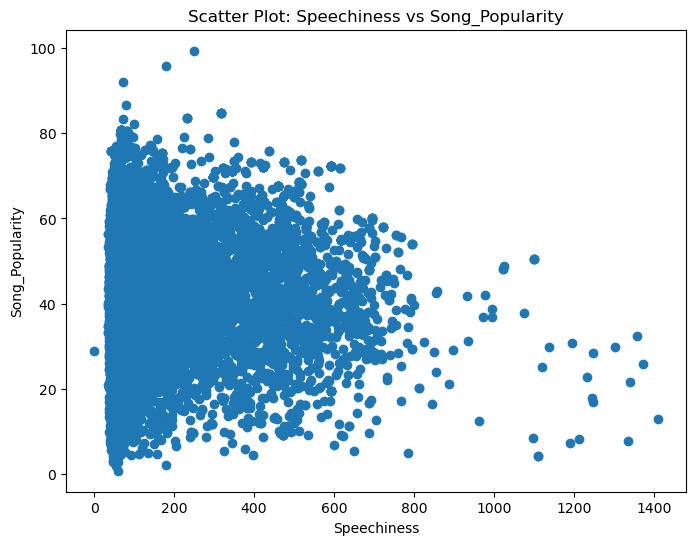

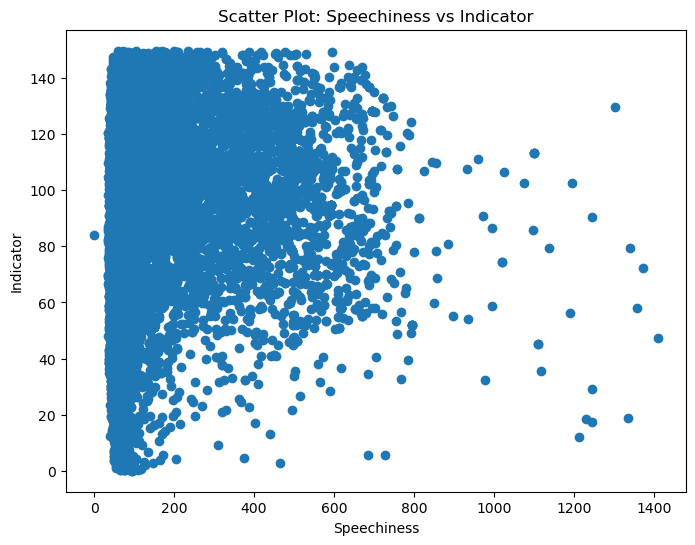

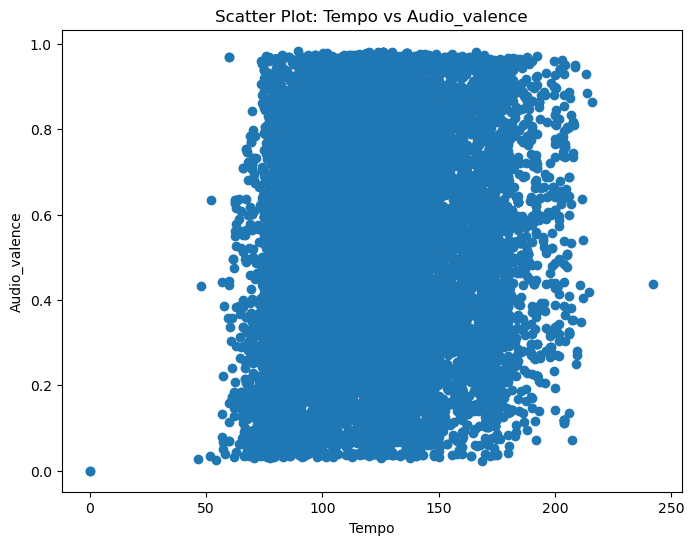

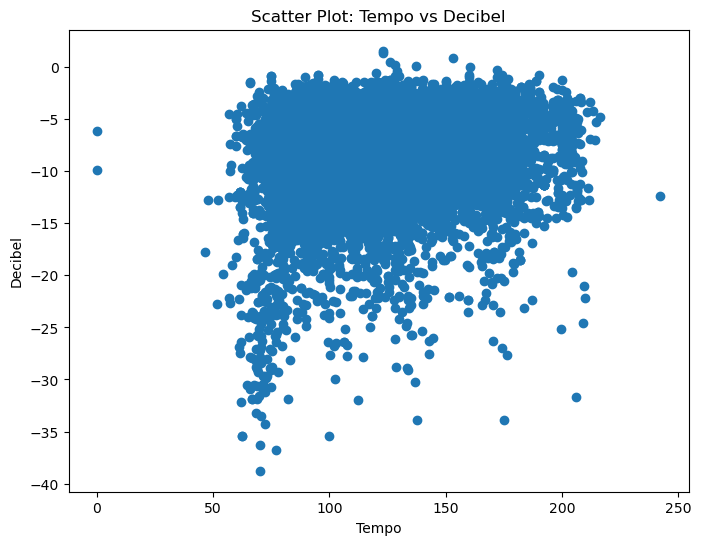

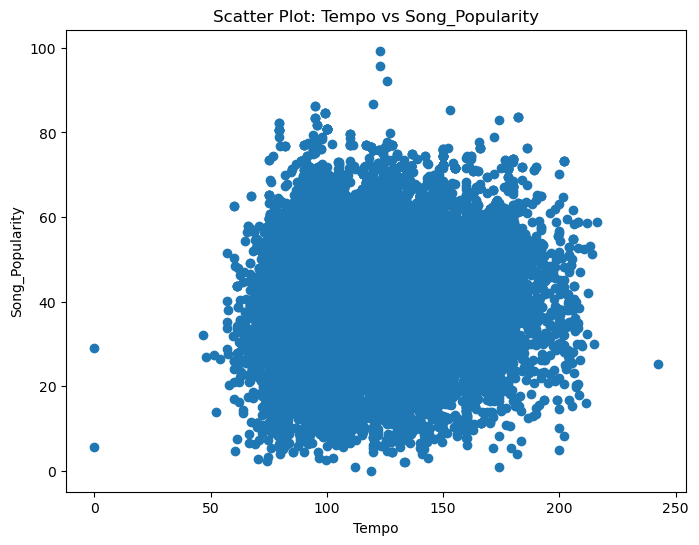

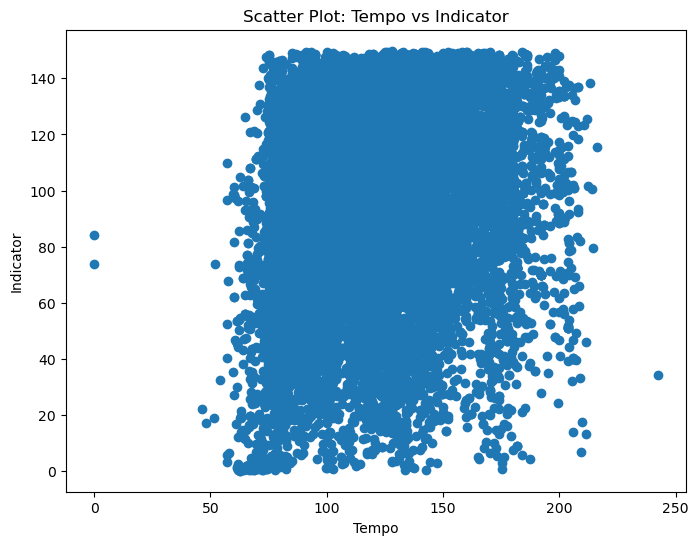

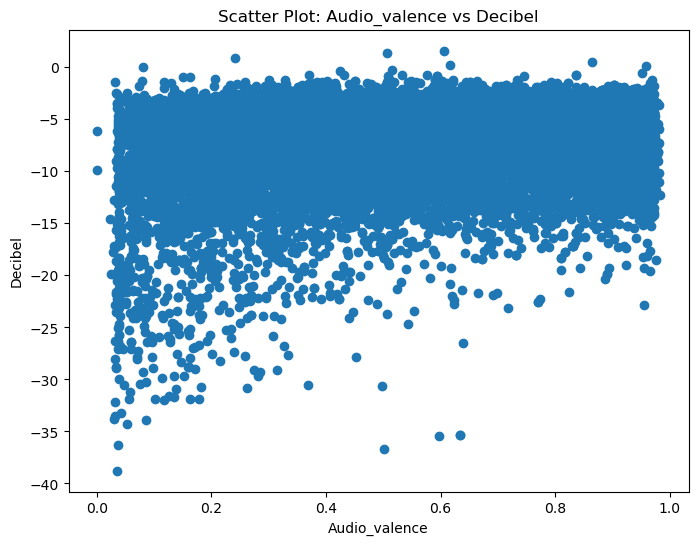

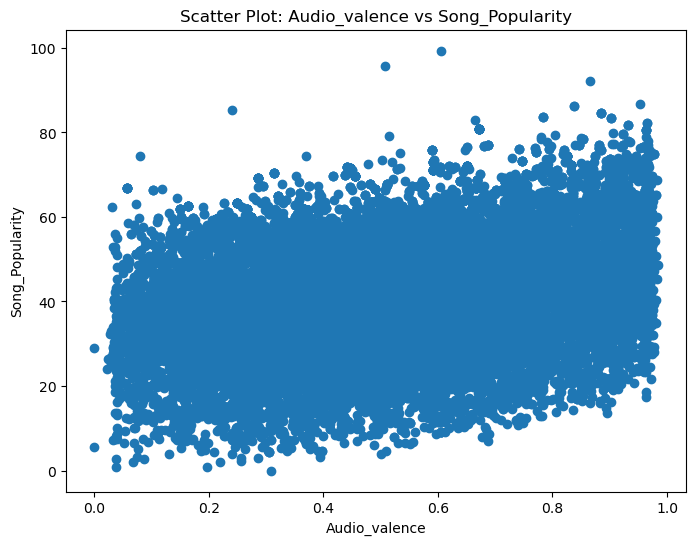

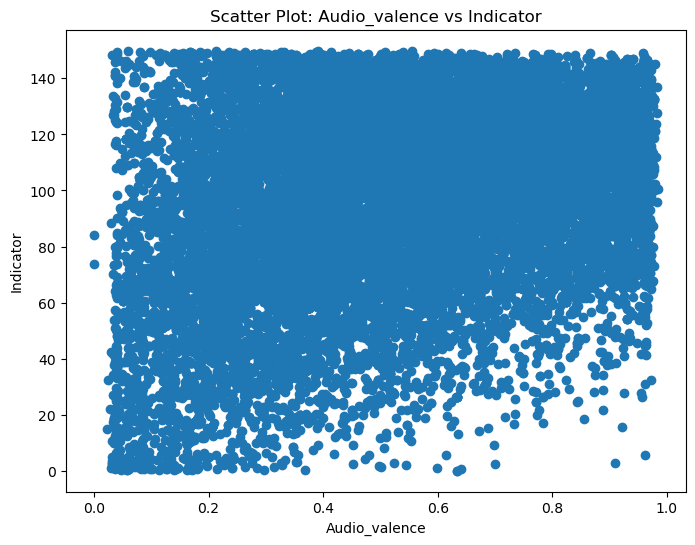

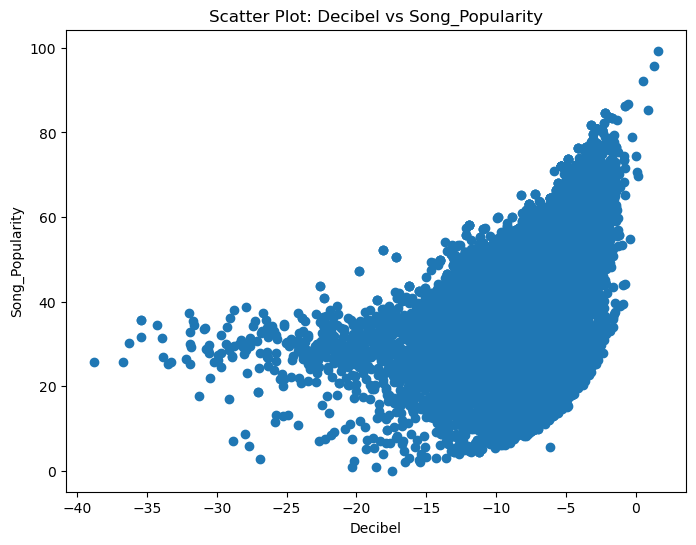

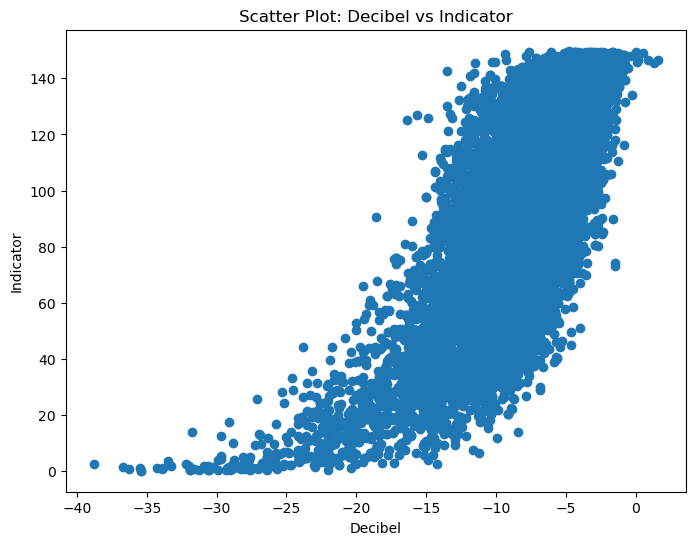

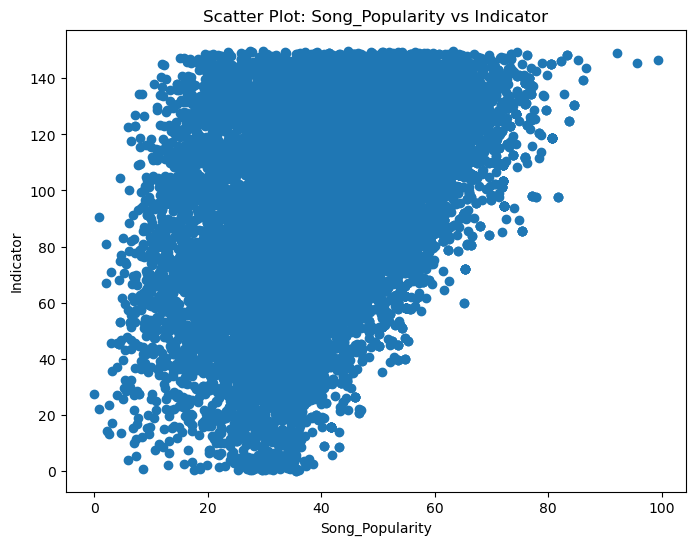

In [12]:
quantitative_columns = df.select_dtypes(include=['int', 'float']).columns

# Create scatter plots for each pair of variables
for i, col1 in enumerate(quantitative_columns):
    for j, col2 in enumerate(quantitative_columns):
        if i < j:  # To avoid plotting the same pair twice
            plt.figure(figsize=(8, 6))
            plt.scatter(df[col1], df[col2])
            plt.title(f'Scatter Plot: {col1} vs {col2}')
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.show()

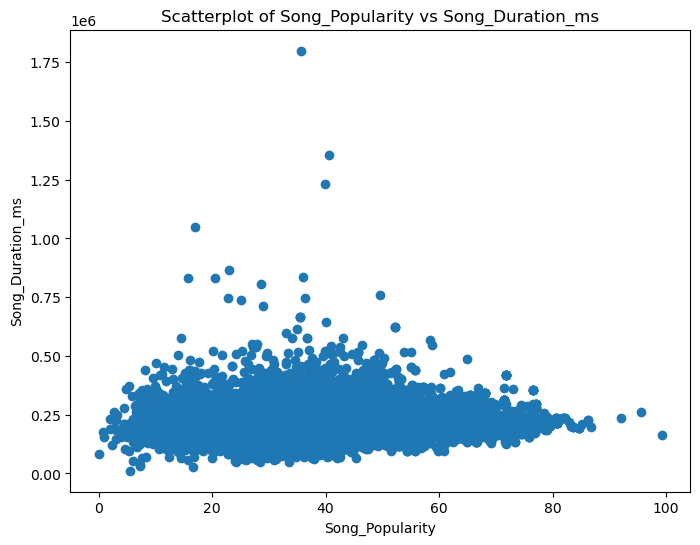

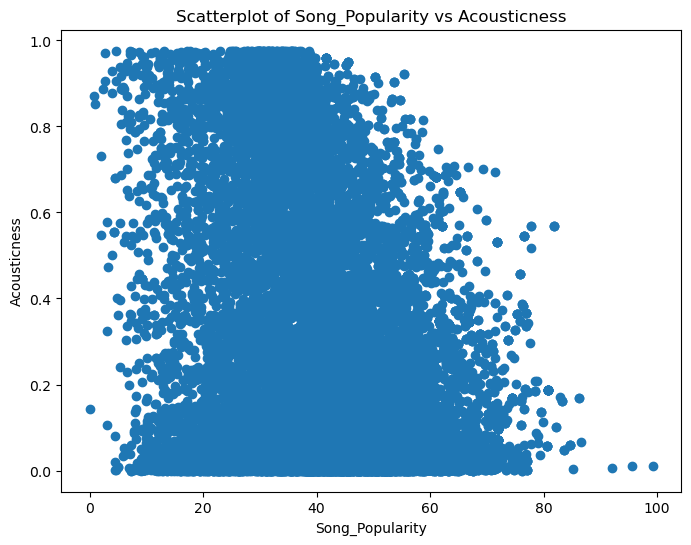

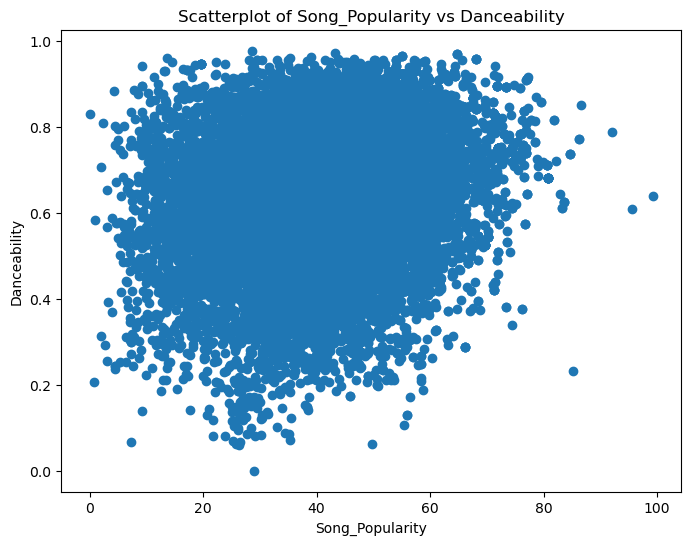

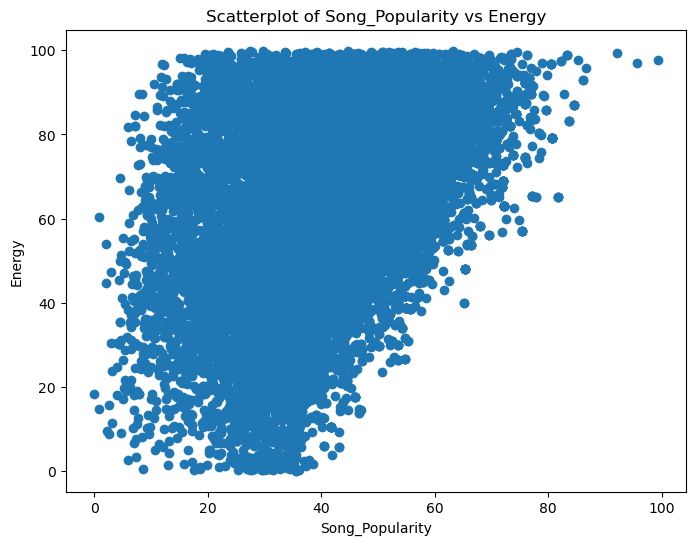

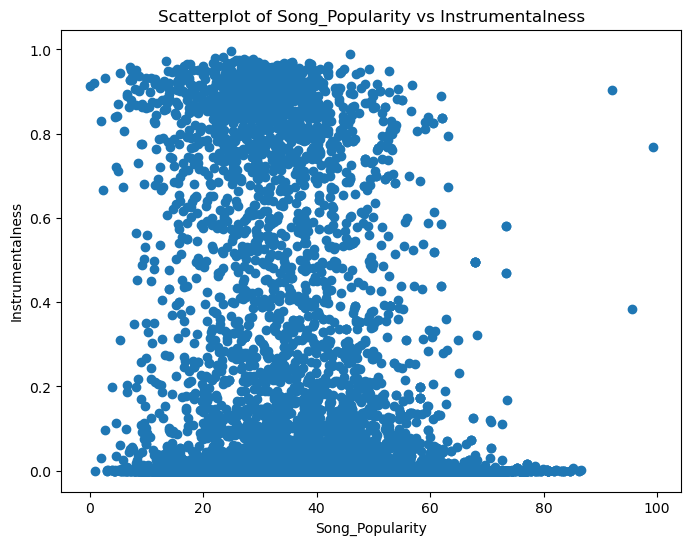

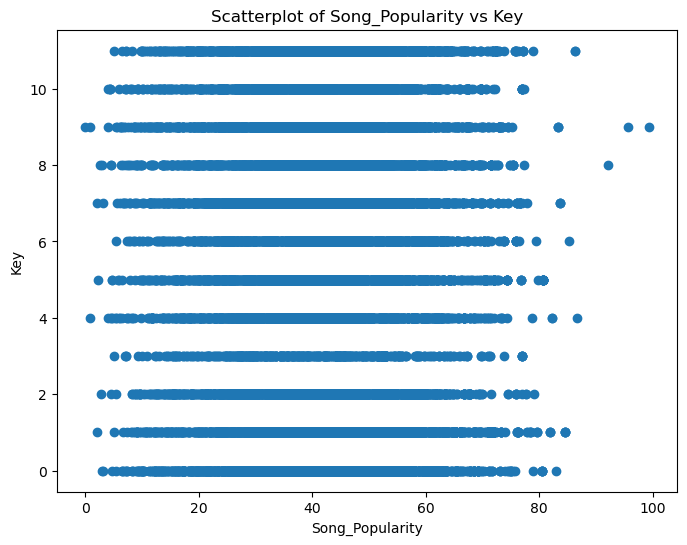

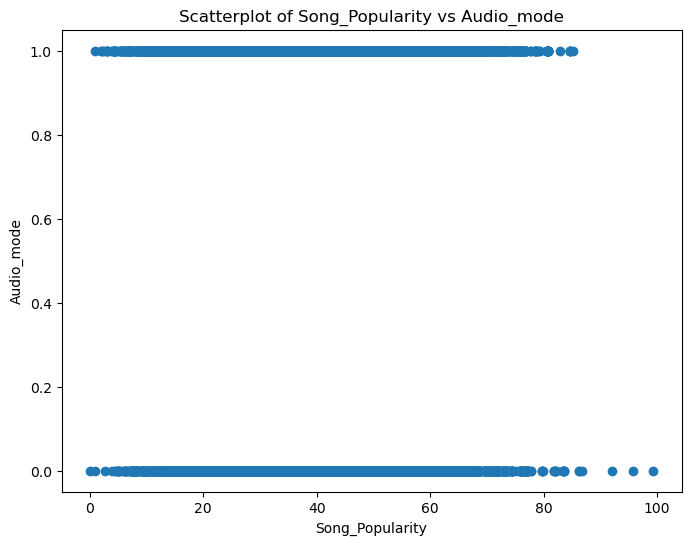

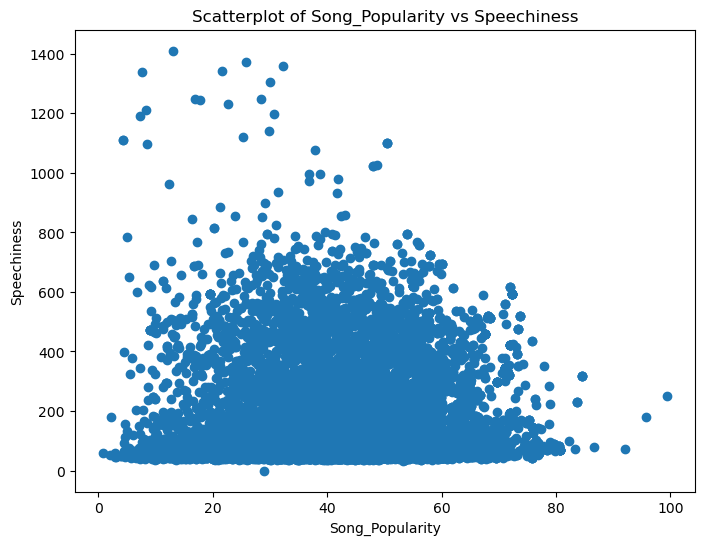

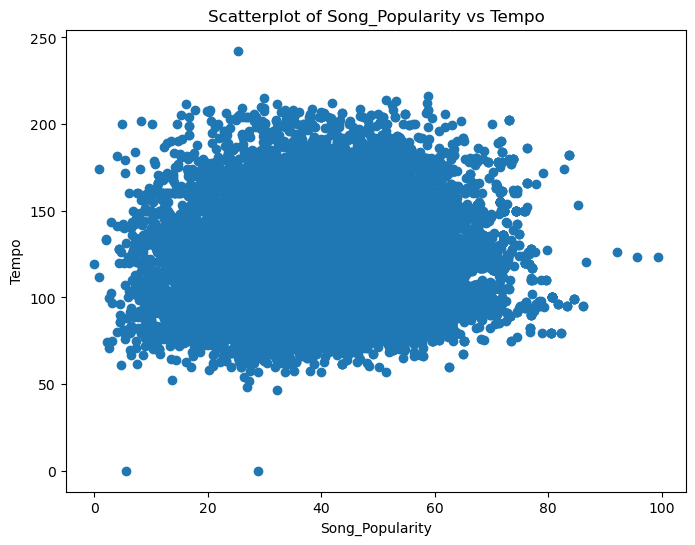

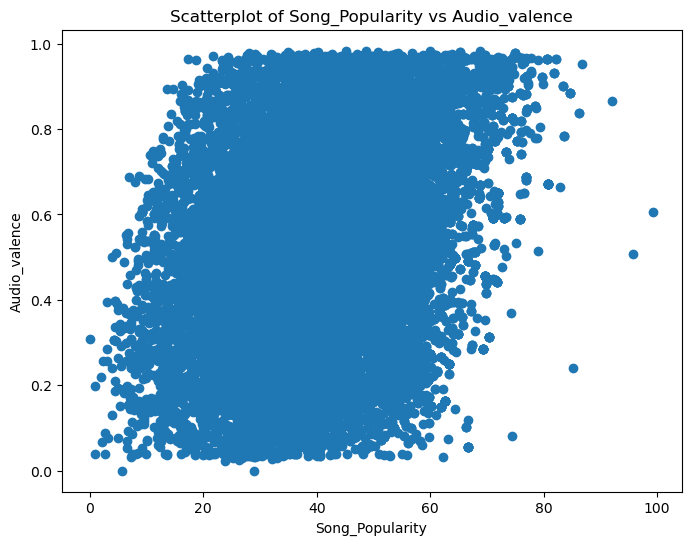

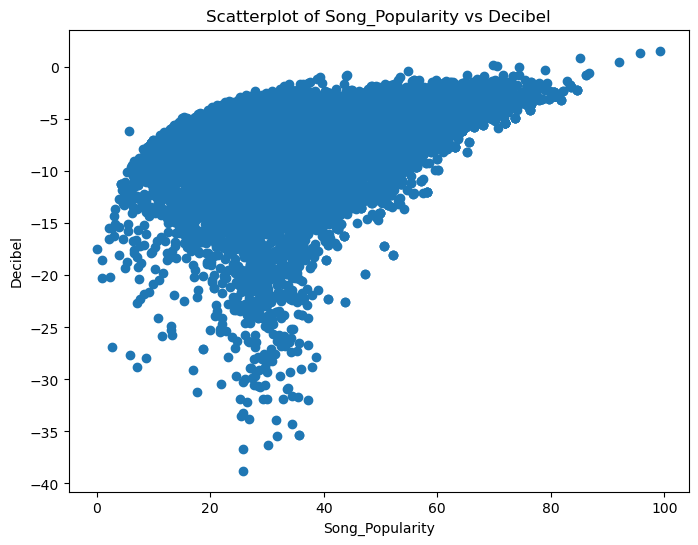

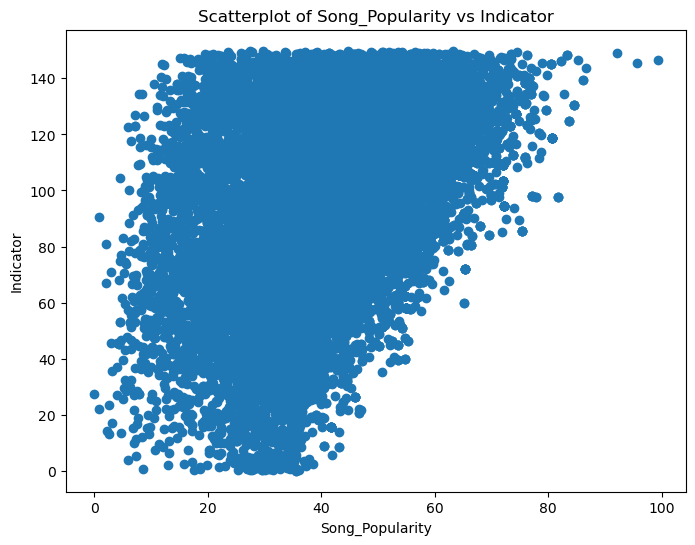

In [13]:
quantitative_columns = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]

# Select quantitative columns excluding 'Song_Popularity'
quantitative_columns.remove('Song_Popularity')

# Plot scatterplots
for column in quantitative_columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(df['Song_Popularity'], df[column])
    plt.title(f'Scatterplot of Song_Popularity vs {column}')
    plt.xlabel('Song_Popularity')
    plt.ylabel(column)
    plt.show()

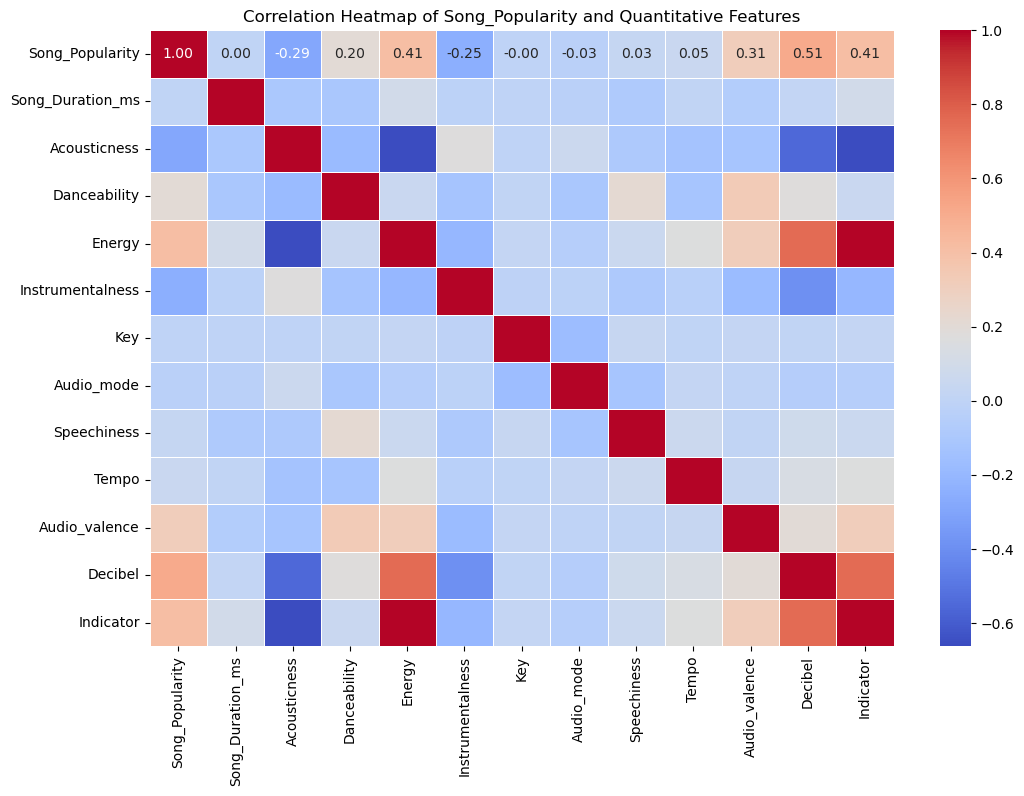

In [14]:
# Create a DataFrame with 'Song_Popularity' and other quantitative columns
quantitative_df = df[['Song_Popularity'] + quantitative_columns]

# Calculate the correlation matrix
corr_matrix = quantitative_df.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Song_Popularity and Quantitative Features')
plt.show()

# --------------------------------- Phase 01 ---------------------------------

### Step 3: Data Preprocessing

###### i) Check duplicates

In [15]:
df_phase_01 = df.copy()

In [16]:
df_cleaned_1 = df_phase_01.drop_duplicates(subset=['Song_Name', 'Song_Popularity', 'Code'], keep='first')
df_cleaned_1

Code                   Song_Name  Song_Duration_ms  Acousticness  \
0       HI8  Boulevard of Broken Dreams            262333      0.005410   
1      HI10                  In The End            216933      0.010094   
2      MI11           Seven Nation Army            231733      0.008007   
3       EI8                  By The Way            216933      0.025872   
4       HI9           How You Remind Me            223826      0.000935   
...     ...                         ...               ...           ...   
18830  LI20              Let It Breathe            159645      0.875140   
18831  LI18                     Answers            205666      0.749700   
18832  MI16      Sudden Love (Acoustic)            182211      0.830060   
18833  MI16           Gentle on My Mind            352280      0.926100   
18834  MI15                    Up to Me            193533      0.892780   

       Danceability  Energy  Instrumentalness  Key    Liveness  Audio_mode  \
0           0.49104    68.2          0.000029    8  112.126921           1   
1           0.53658    85.3          0.000000    3    122.7664           0   
2           0.72963    46.3          0.447000    0    157.5025           1   
3           0.44649    97.0          0.003550    0    121.4404           1   
4           0.44253    76.6          0.000000   10    123.8769           1   
...             ...     ...               ...  ...         ...         ...   
18830       0.49500    15.1          0.000065   11    123.4321           1   
18831       0.49005    16.1          0.000001   11    122.1025           0   
18832       0.71181    32.5          0.000000    0    126.5625           1   
18833       0.48312    32.6          0.015700    3    125.2161           1   
18834       0.63360    38.1          0.000254    4    121.8816           1   

       Speechiness    Tempo  Audio_valence Dynamism  Decibel Loudness  \
0            44.10  167.060          0.474     High   -4.095    Blare   
1              NaN  105.256          0.370     high   -6.407     Roar   
2           118.80  123.881          0.324      Med   -7.828     Roar   
3           160.50  122.444          0.198    Extra   -4.938    Blare   
4            46.95  172.011          0.574       Hi   -5.065    Blare   
...            ...      ...            ...      ...      ...      ...   
18830        52.20  113.969          0.300       Lo  -16.107  Chatter   
18831        45.15   94.286          0.265      Low  -14.078   Babble   
18832        53.25  130.534          0.286      NaN  -12.222   Babble   
18833        49.20  106.063          0.323   Medium  -12.020   Babble   
18834        45.30   91.490          0.581      Med  -11.790   Rumble   

       Song_Popularity  Indicator  
0                57.72     102.30  
1                45.37     127.95  
2                47.28      69.45  
3                52.89     145.50  
4                46.68     114.90  
...                ...        ...  
18830            31.80      22.65  
18831            32.91      24.15  
18832            15.18      48.75  
18833            33.01      48.90  
18834            37.11      57.15  

[14926 rows x 18 columns]

###### ii) Dropping unwanted columns

Below are the unwanted columns in the dataset<br> <ol>
<li>Song_Name</li>
    <li>Code</li>
</ol>

In [17]:
df_cleaned_1 = df_cleaned_1.drop(columns = ['Song_Name', 'Code'])
df_cleaned_1.shape

(14926, 16)

###### iii) Data types tranformations

By looking at the some visualizations, we can clearly see that some variables have improper data types. So, lets fix them first <br> Below are the variables that has data type issues <br><br> <ol>
<li>Liveness</li>
<li>Audio_mode</li>
    <li>Key</li>
</ol>

Liveness: "Liveness" variable should be in a numerical variable. But it shows that its in object format. Let's try to figure out that issue

In [18]:
df_cleaned_1['Liveness'].value_counts()

Liveness
122.7664      175
123.4321      165
123.21        159
123.6544      156
122.9881      154
             ... 
376.7481        1
106.584976      1
225.6004        1
349.69          1
299.29          1
Name: count, Length: 1426, dtype: int64

In [19]:
# Function to check for non-numeric characters
def contains_non_numeric(value):
    pattern = re.compile(r'[^0-9.]')  # Pattern to match any character that is not a digit or a dot
    return bool(pattern.search(str(value)))

# Check for non-numeric characters in 'Liveness'
df_cleaned_1['non_numeric_in_Liveness'] = df_cleaned_1['Liveness'].apply(contains_non_numeric)
non_numeric_rows = df_cleaned_1[df_cleaned_1['non_numeric_in_Liveness']]
print(non_numeric_rows)

   Song_Duration_ms  Acousticness  Danceability  Energy  Instrumentalness  \
7            213800       0.00145       0.60687    95.3          0.000582   

   Key Liveness  Audio_mode  Speechiness    Tempo  Audio_valence Dynamism  \
7    2        ?           1          NaN  105.046          0.537    Extra   

   Decibel Loudness  Song_Popularity  Indicator  non_numeric_in_Liveness  
7   -3.435     Boom            62.55     142.95                     True  


We can see that, there is a value called "?" in the "Liveness" column which causes this data type issue. Since we have no idea about this value, we can remove that data row from the dataset and convert this "Liveness" variable into float format

In [20]:
df_cleaned_2 = df_cleaned_1[~df_cleaned_1['non_numeric_in_Liveness']]
df_cleaned_2 = df_cleaned_2.drop(columns=['non_numeric_in_Liveness'])
df_cleaned_2['Liveness'] = df_cleaned_2['Liveness'].astype(float)

In [21]:
df_cleaned_2.shape

(14925, 16)

We can also see that the "Audio_mode" variable is dichotomous (It has only 0 and 1 as values). But its data type is integer. Since it is a dichotomous variable, we can convert that variable type into object format

In [22]:
df_cleaned_2['Audio_mode'] = df_cleaned_2['Audio_mode'].astype(object)

"Key" variable has values vary from zero to 11 (12 levels). It's better if we can convert that variable type into object format

In [23]:
df_cleaned_2['Key'].value_counts()

Key
0     1734
7     1654
1     1594
9     1410
2     1398
5     1257
11    1221
4     1084
6     1048
8     1047
10    1045
3      433
Name: count, dtype: int64

In [24]:
df_cleaned_2['Key'] = df_cleaned_2['Key'].astype(object)

In [25]:
df_cleaned_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14925 entries, 0 to 18834
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Song_Duration_ms  14925 non-null  int64  
 1   Acousticness      14925 non-null  float64
 2   Danceability      12643 non-null  float64
 3   Energy            14925 non-null  float64
 4   Instrumentalness  14925 non-null  float64
 5   Key               14925 non-null  object 
 6   Liveness          14925 non-null  float64
 7   Audio_mode        14925 non-null  object 
 8   Speechiness       10477 non-null  float64
 9   Tempo             14925 non-null  float64
 10  Audio_valence     14925 non-null  float64
 11  Dynamism          12011 non-null  object 
 12  Decibel           14925 non-null  float64
 13  Loudness          14925 non-null  object 
 14  Song_Popularity   14925 non-null  float64
 15  Indicator         14925 non-null  float64
dtypes: float64(11), int64(1), object(4)
memory us

###### iv) Check null values

In [26]:
df_cleaned_2.isna().sum()

Song_Duration_ms       0
Acousticness           0
Danceability        2282
Energy                 0
Instrumentalness       0
Key                    0
Liveness               0
Audio_mode             0
Speechiness         4448
Tempo                  0
Audio_valence          0
Dynamism            2914
Decibel                0
Loudness               0
Song_Popularity        0
Indicator              0
dtype: int64

In [27]:
df_cleaned_2['Key'].value_counts()

Key
0     1734
7     1654
1     1594
9     1410
2     1398
5     1257
11    1221
4     1084
6     1048
8     1047
10    1045
3      433
Name: count, dtype: int64

In [28]:
df_cleaned_2['Audio_mode'].value_counts()

Audio_mode
1    9431
0    5494
Name: count, dtype: int64

In [29]:
df_cleaned_2['Dynamism'].value_counts()

Dynamism
High      2914
Hi        2902
Medium    2058
Med       2040
Extra     1360
Low        254
Lo         249
high       116
m           63
l           32
h           23
Name: count, dtype: int64

In [30]:
df_cleaned_2['Loudness'].value_counts()

Loudness
Blare            3742
Roar             3189
Clang            2032
?                1525
Boom             1501
Rumble           1211
Babble           1104
Chatter           162
Blast             112
Buzz               99
Rustle             86
Drone              73
Hum                43
Mutter             21
Mumble             14
Deafening           4
Whisper             4
Ear-splitting       2
Murmur              1
Name: count, dtype: int64

We can see missing values in "Danceability", "Speechiness", "Dynamism" and "Loudness" (Values as "?") columns

###### v) Update values in the columns

In [31]:
df_cleaned_2['Loudness'] = df_cleaned_2['Loudness'].replace('?', np.nan)

In [32]:
df_cleaned_2.isna().sum()

Song_Duration_ms       0
Acousticness           0
Danceability        2282
Energy                 0
Instrumentalness       0
Key                    0
Liveness               0
Audio_mode             0
Speechiness         4448
Tempo                  0
Audio_valence          0
Dynamism            2914
Decibel                0
Loudness            1525
Song_Popularity        0
Indicator              0
dtype: int64

In [33]:
df_cleaned_2['Dynamism'].value_counts()

Dynamism
High      2914
Hi        2902
Medium    2058
Med       2040
Extra     1360
Low        254
Lo         249
high       116
m           63
l           32
h           23
Name: count, dtype: int64

In [34]:
replace_dict = {'Med': 'Medium', 'Hi': 'High',
               'Lo': 'Low', 'high': 'High',
               'm': 'Medium', 'h': 'High', 'l': 'Low'}

# Apply the replacement
df_cleaned_2['Dynamism'] = df_cleaned_2['Dynamism'].replace(replace_dict)
df_cleaned_2['Dynamism'].value_counts()

Dynamism
High      5955
Medium    4161
Extra     1360
Low        535
Name: count, dtype: int64

###### vi) Numerical data transformation

In [35]:
## find numerical variables
num_cols = [n for n in df_cleaned_2.columns if df_cleaned_2[n].dtypes!='O']
df_cleaned_2[num_cols].head()

Song_Duration_ms  Acousticness  Danceability  Energy  Instrumentalness  \
0            262333      0.005410       0.49104    68.2          0.000029   
1            216933      0.010094       0.53658    85.3          0.000000   
2            231733      0.008007       0.72963    46.3          0.447000   
3            216933      0.025872       0.44649    97.0          0.003550   
4            223826      0.000935       0.44253    76.6          0.000000   

     Liveness  Speechiness    Tempo  Audio_valence  Decibel  Song_Popularity  \
0  112.126921        44.10  167.060          0.474   -4.095            57.72   
1  122.766400          NaN  105.256          0.370   -6.407            45.37   
2  157.502500       118.80  123.881          0.324   -7.828            47.28   
3  121.440400       160.50  122.444          0.198   -4.938            52.89   
4  123.876900        46.95  172.011          0.574   -5.065            46.68   

   Indicator  
0     102.30  
1     127.95  
2      69.45  
3     145.50  
4     114.90

<function matplotlib.pyplot.show(close=None, block=None)>

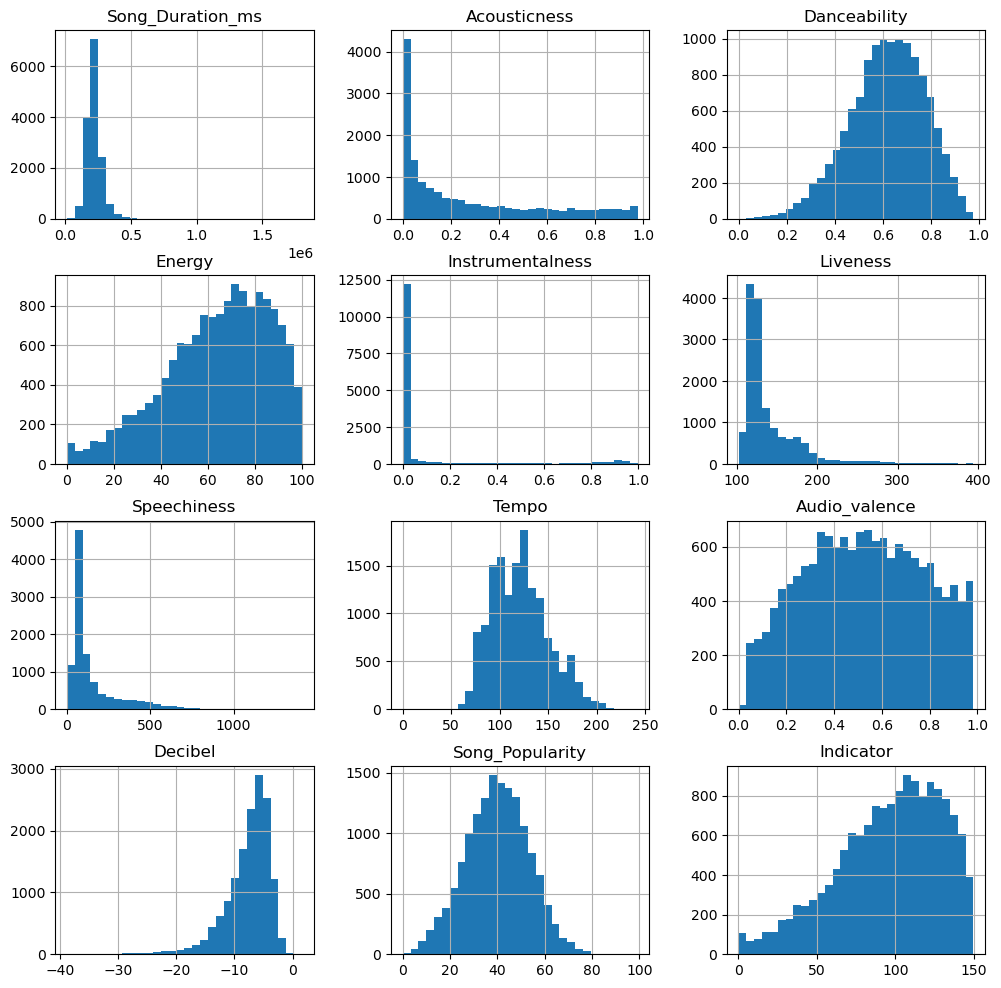

In [36]:
df_cleaned_2.hist(bins=30, figsize=(12,12))
plt.show

In [37]:
def diagnostic_plots(data, variable):
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    data[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(data[variable], dist="norm", plot=plt)

    plt.show()

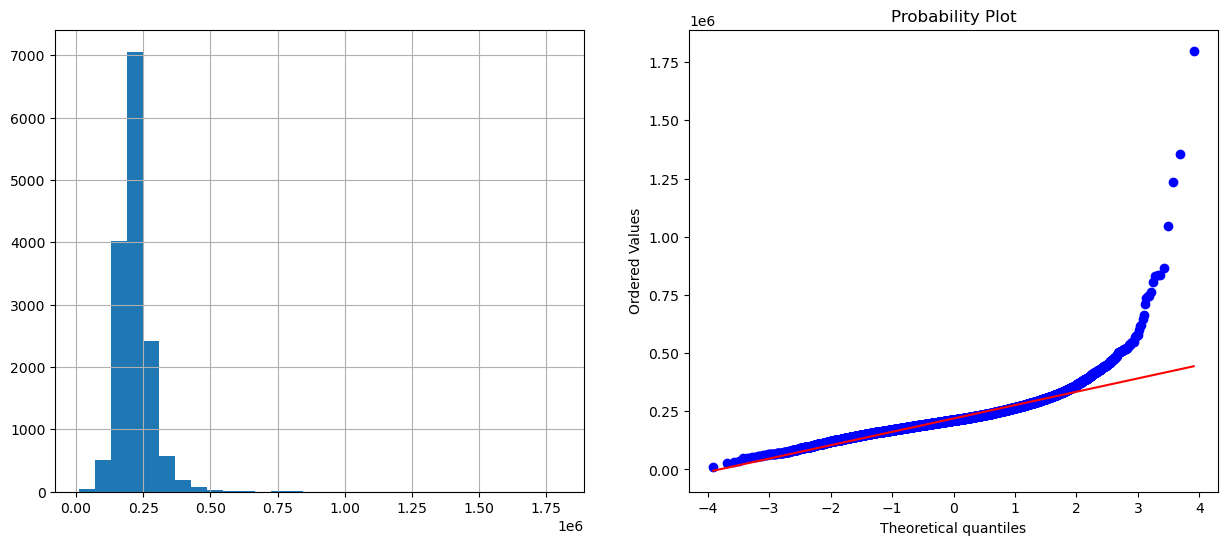

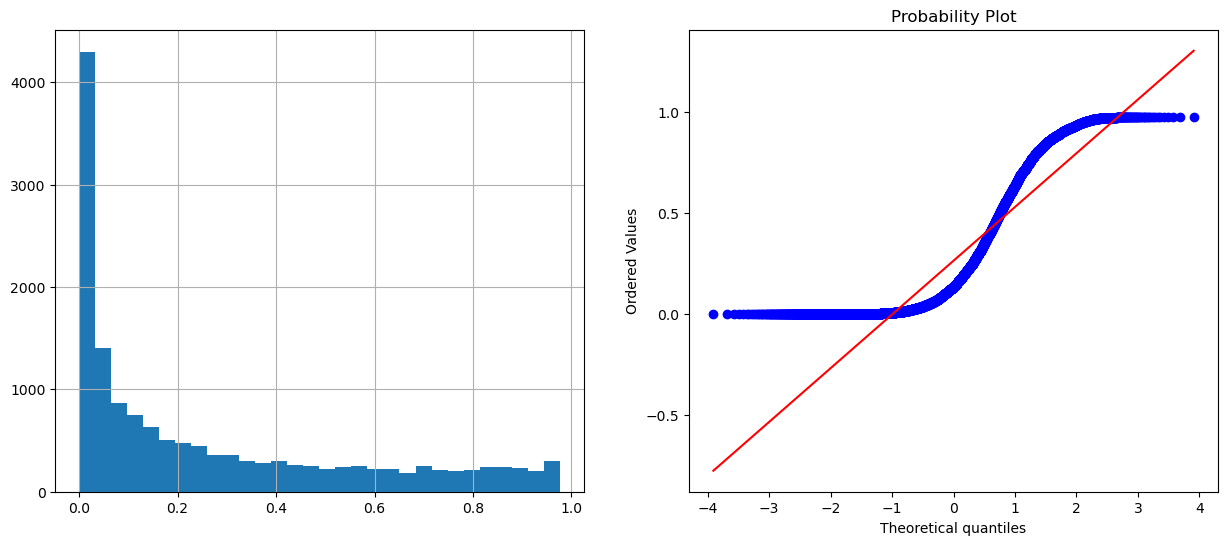

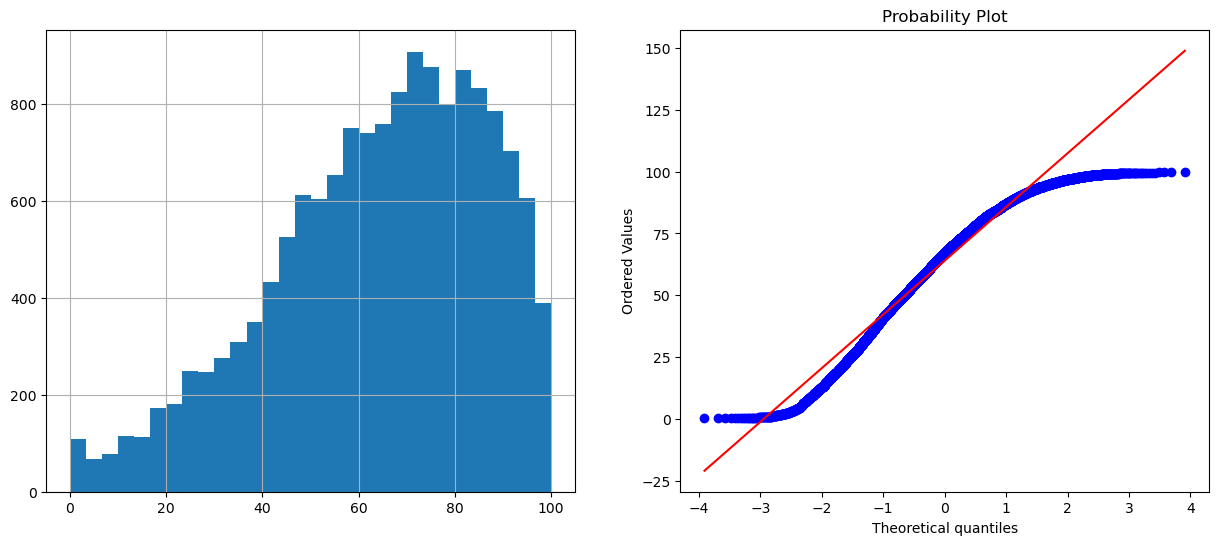

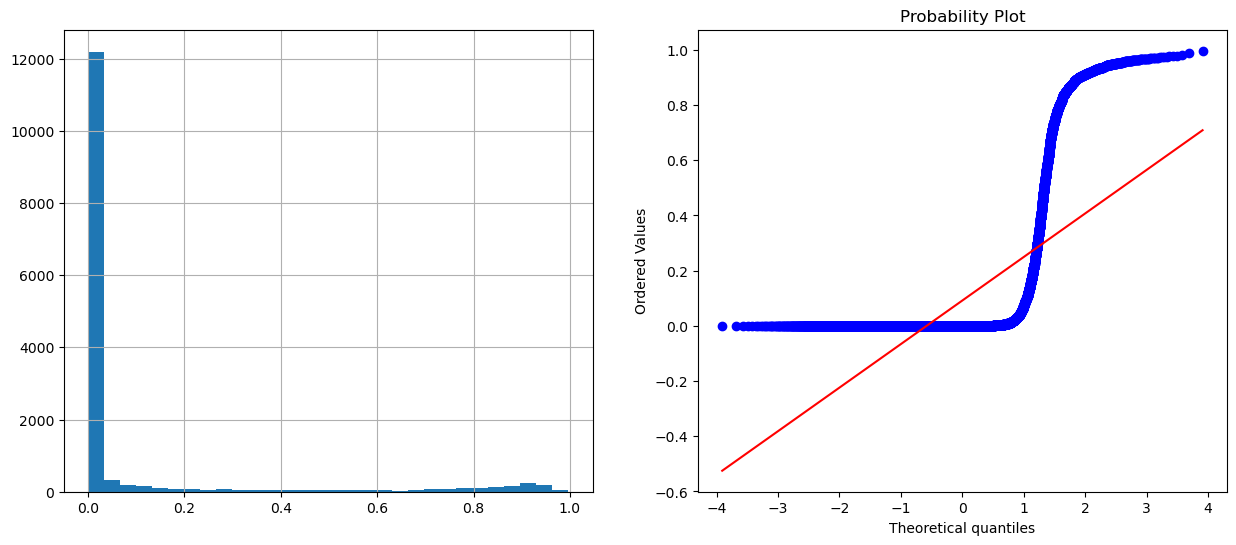

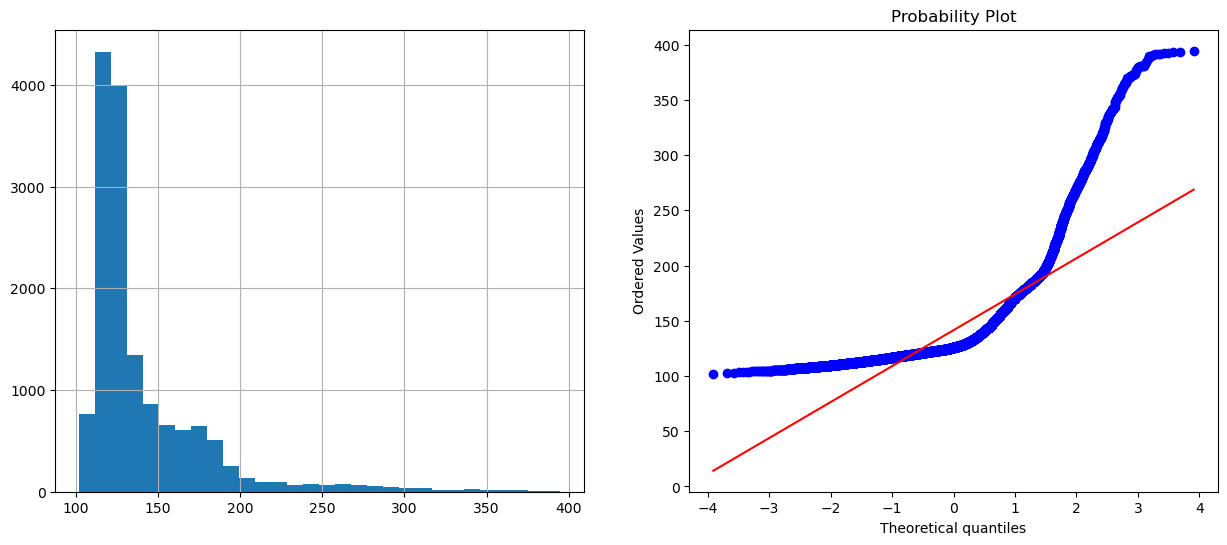

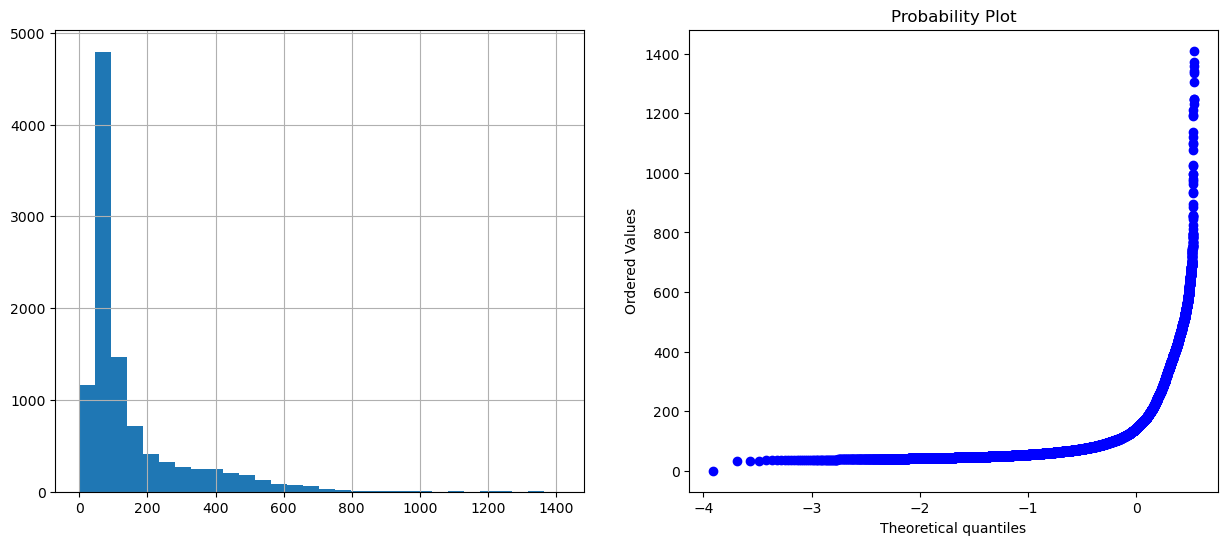

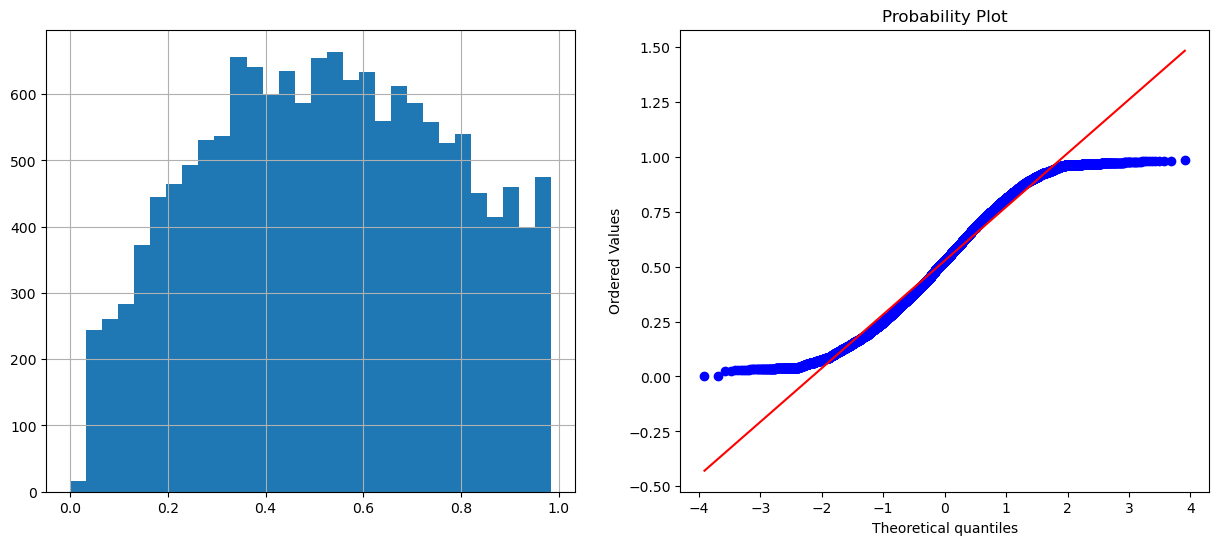

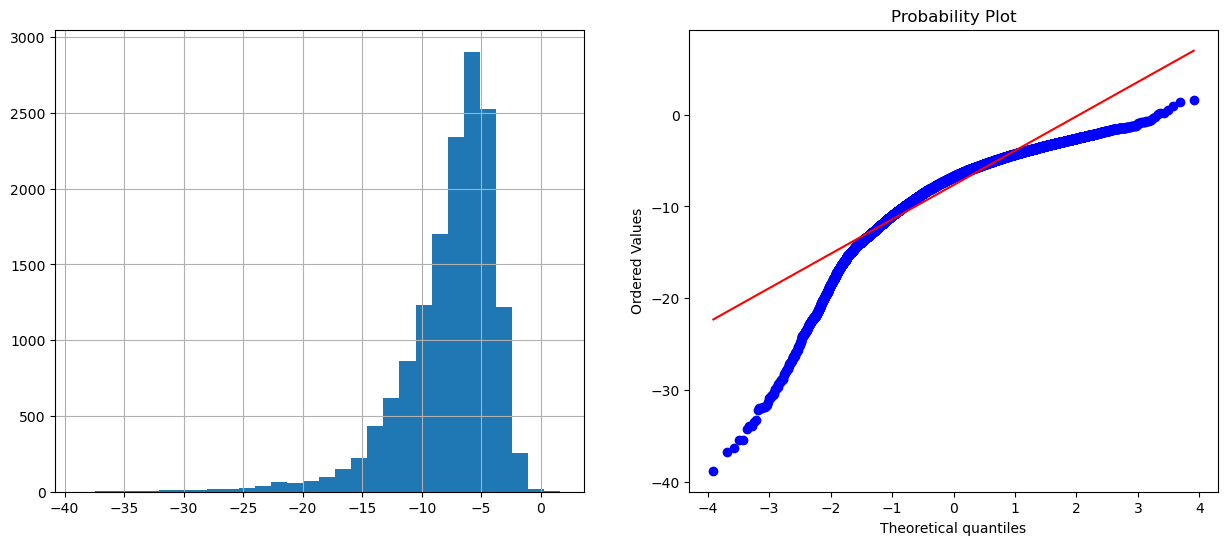

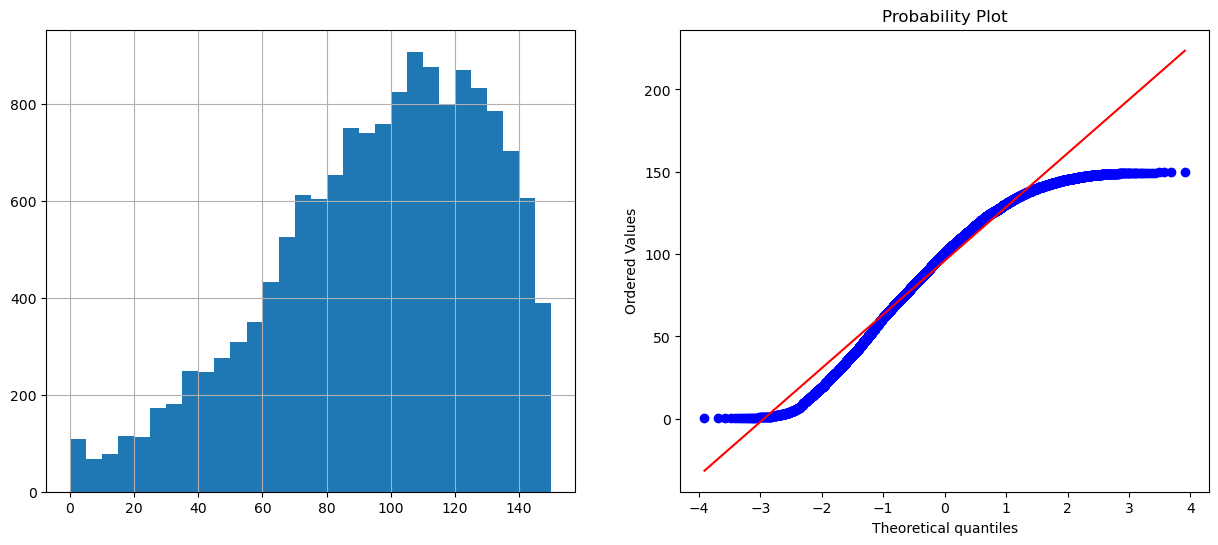

In [38]:
diagnostic_plots(df_cleaned_2, 'Song_Duration_ms')
diagnostic_plots(df_cleaned_2, 'Acousticness')
diagnostic_plots(df_cleaned_2, 'Energy')
diagnostic_plots(df_cleaned_2, 'Instrumentalness')
diagnostic_plots(df_cleaned_2, 'Liveness')
diagnostic_plots(df_cleaned_2, 'Speechiness')
diagnostic_plots(df_cleaned_2, 'Audio_valence')
diagnostic_plots(df_cleaned_2, 'Decibel')
diagnostic_plots(df_cleaned_2, 'Indicator')

In [39]:
# Identify numerical columns
numerical_columns = df_cleaned_2.select_dtypes(include=['float64', 'int64']).columns
numerical_columns

Index(['Song_Duration_ms', 'Acousticness', 'Danceability', 'Energy',
       'Instrumentalness', 'Liveness', 'Speechiness', 'Tempo', 'Audio_valence',
       'Decibel', 'Song_Popularity', 'Indicator'],
      dtype='object')

In [40]:
# Before Linear regression model numerical data should be normally distributed
numerical_columns_selected = ['Song_Duration_ms', 'Acousticness', 'Energy',
       'Instrumentalness', 'Liveness', 'Speechiness', 'Audio_valence', 'Decibel', 'Indicator']

In [41]:
# Apply PowerTransformer only to numerical columns
transformer = PowerTransformer(method='yeo-johnson', standardize=False)
transformer.fit(df_cleaned_2[numerical_columns_selected])
transformed_numerical = transformer.transform(df_cleaned_2[numerical_columns_selected])

In [42]:
# Replace the numerical columns with transformed values in the original DataFrame
df_cleaned_3 = df_cleaned_2.copy()
df_cleaned_3[numerical_columns_selected] = transformed_numerical
df_cleaned_3

Song_Duration_ms  Acousticness  Danceability      Energy  \
0             31.051472      0.005356       0.49104  271.926018   
1             30.110937      0.009907       0.53658  370.996117   
2             30.434978      0.007889       0.72963  159.111964   
3             30.110937      0.024676       0.44649  443.616705   
4             30.264177      0.000933       0.44253  319.490993   
...                 ...           ...           ...         ...   
18830         28.641090      0.301183       0.49500   34.499605   
18831         29.851078      0.287400       0.49005   37.607495   
18832         29.267715      0.296632       0.71181   97.769198   
18833         32.557106      0.305862       0.48312   98.182081   
18834         29.556996      0.302856       0.63360  121.631986   

       Instrumentalness Key  Liveness Audio_mode  Speechiness    Tempo  \
0              0.000029   8  0.283426          1     1.909655  167.060   
1             -0.000000   3  0.283426          0          NaN  105.256   
2              0.077024   0  0.283426          1     2.073938  123.881   
3              0.003464   0  0.283426          1     2.112208  122.444   
4             -0.000000  10  0.283426          1     1.922039  172.011   
...                 ...  ..       ...        ...          ...      ...   
18830          0.000065  11  0.283426          1     1.942327  113.969   
18831          0.000001  11  0.283426          0     1.914343   94.286   
18832         -0.000000   0  0.283426          1     1.946047  130.534   
18833          0.014116   3  0.283426          1     1.931101  106.063   
18834          0.000254   4  0.283426          1     1.915001   91.490   

       Audio_valence Dynamism   Decibel Loudness  Song_Popularity   Indicator  
0           0.464075     High -1.630601    Blare            57.72  458.787557  
1           0.363769     High -2.005967     Roar            45.37  625.174603  
2           0.319156   Medium -2.182119     Roar            47.28  268.862755  
3           0.196118    Extra -1.784175    Blare            52.89  746.959284  
4           0.559838     High -1.805404    Blare            46.68  538.711652  
...              ...      ...       ...      ...              ...         ...  
18830       0.295816      Low -2.846613  Chatter            31.80   58.189714  
18831       0.261700      Low -2.719742   Babble            32.91   63.459682  
18832       0.282181      NaN -2.587773   Babble            15.18  165.305855  
18833       0.318184   Medium -2.572307   Babble            33.01  166.003744  
18834       0.566518   Medium -2.554403   Rumble            37.11  205.619993  

[14925 rows x 16 columns]

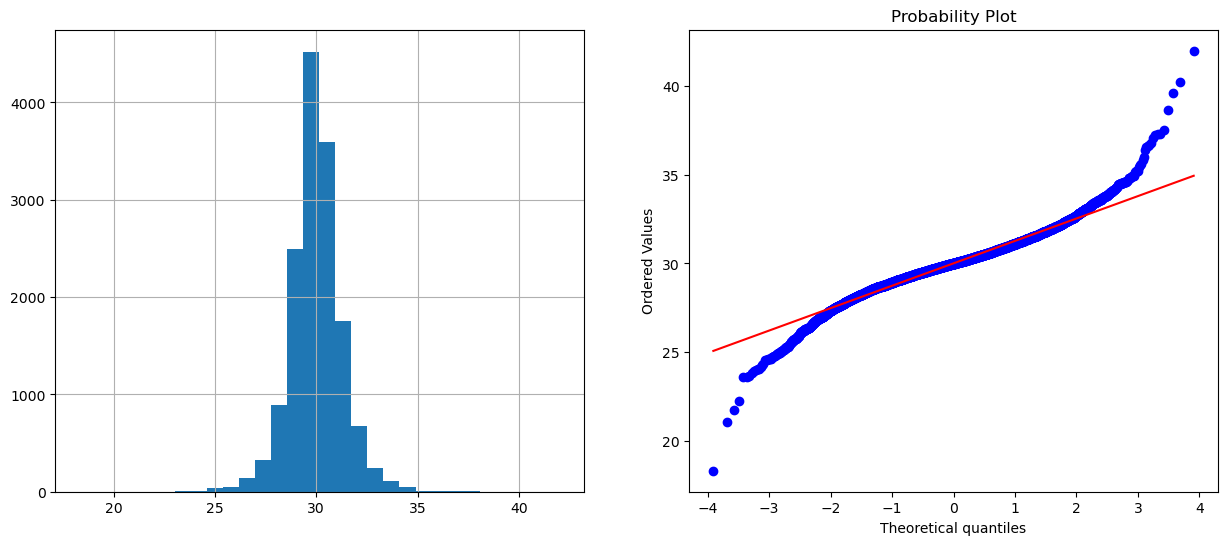

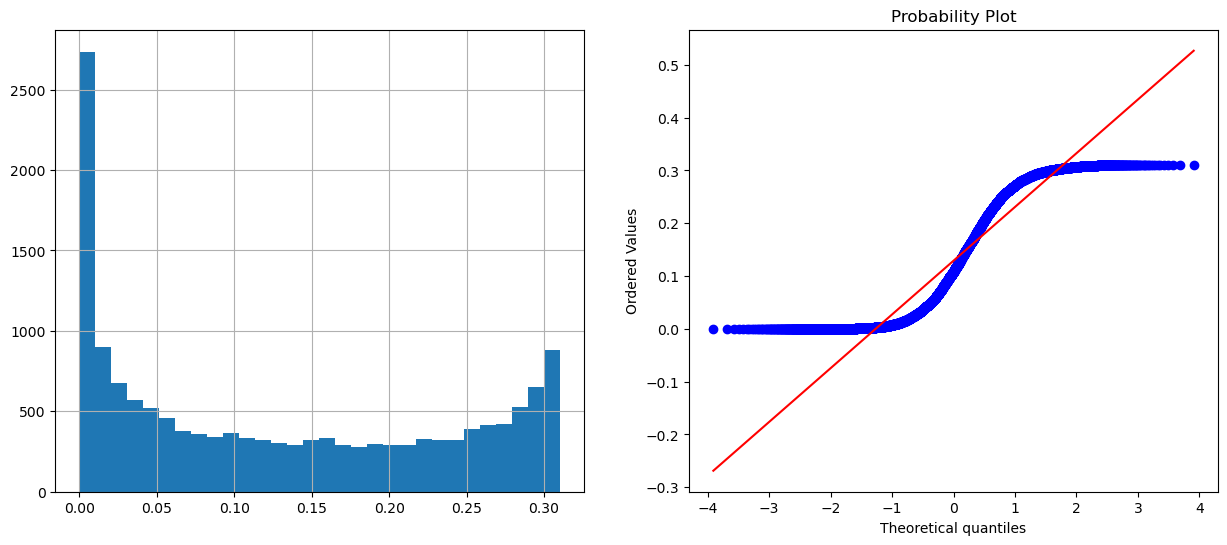

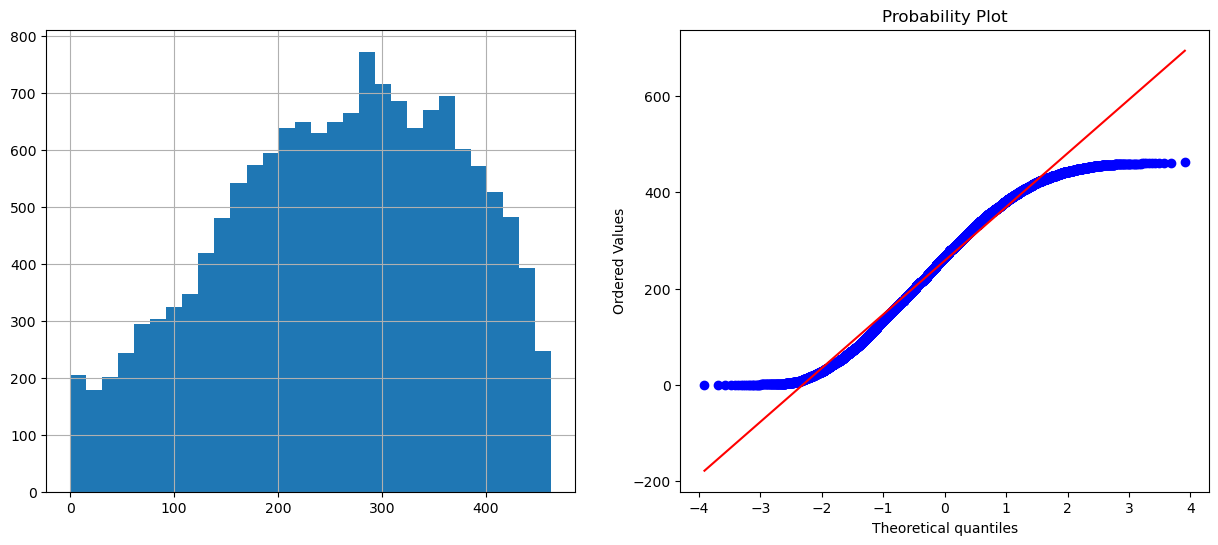

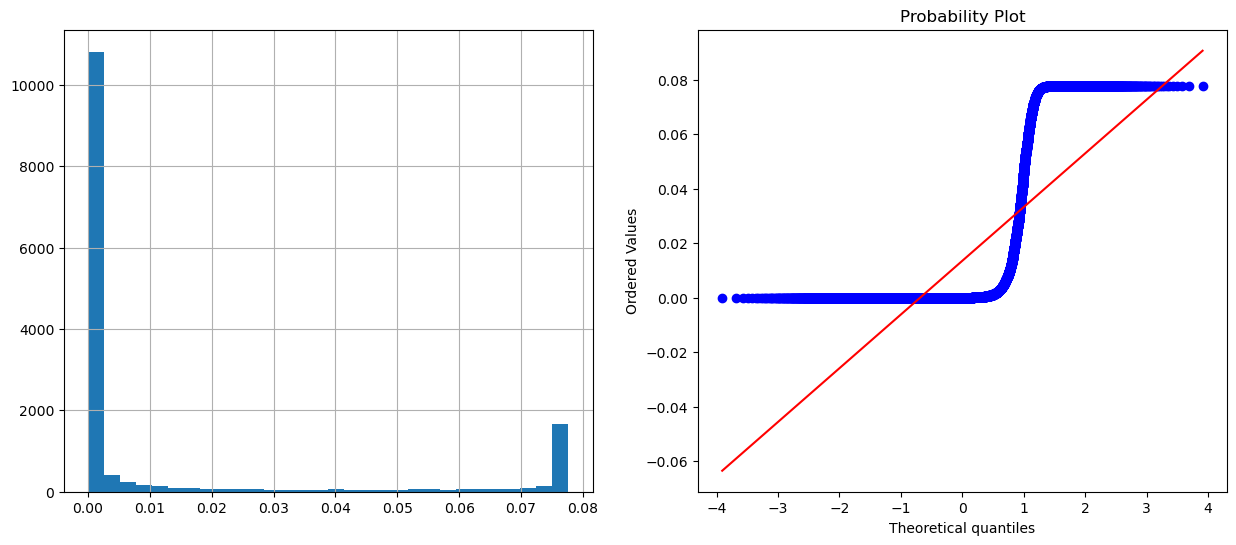

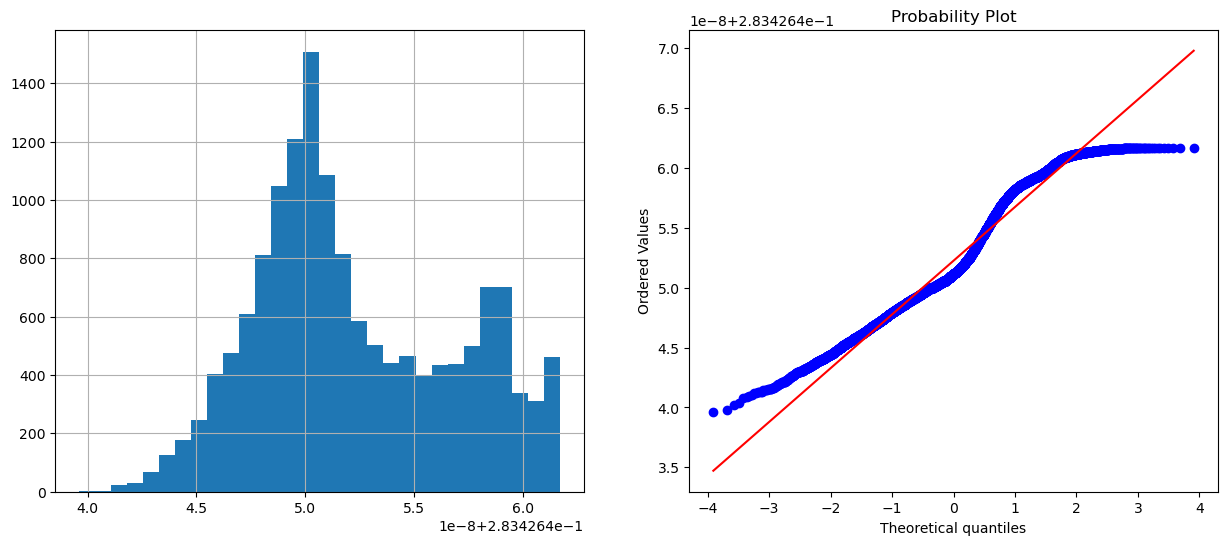

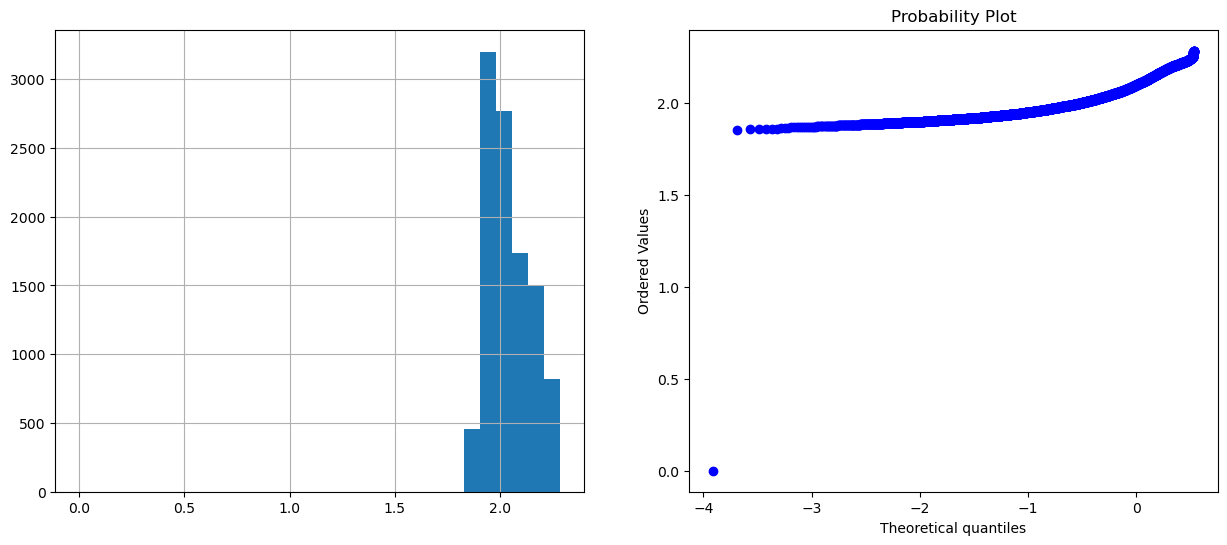

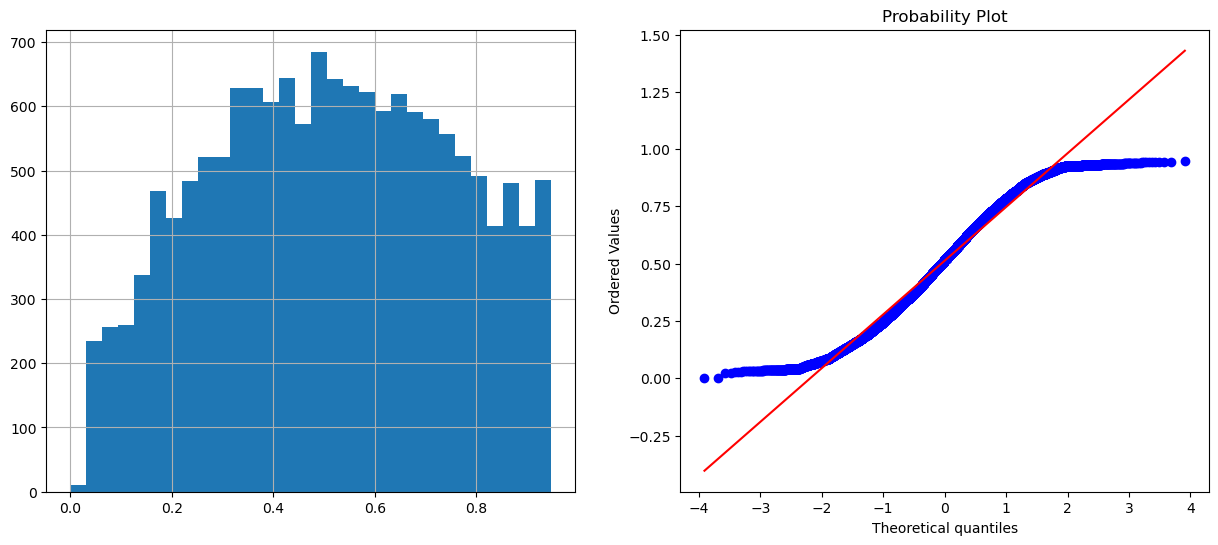

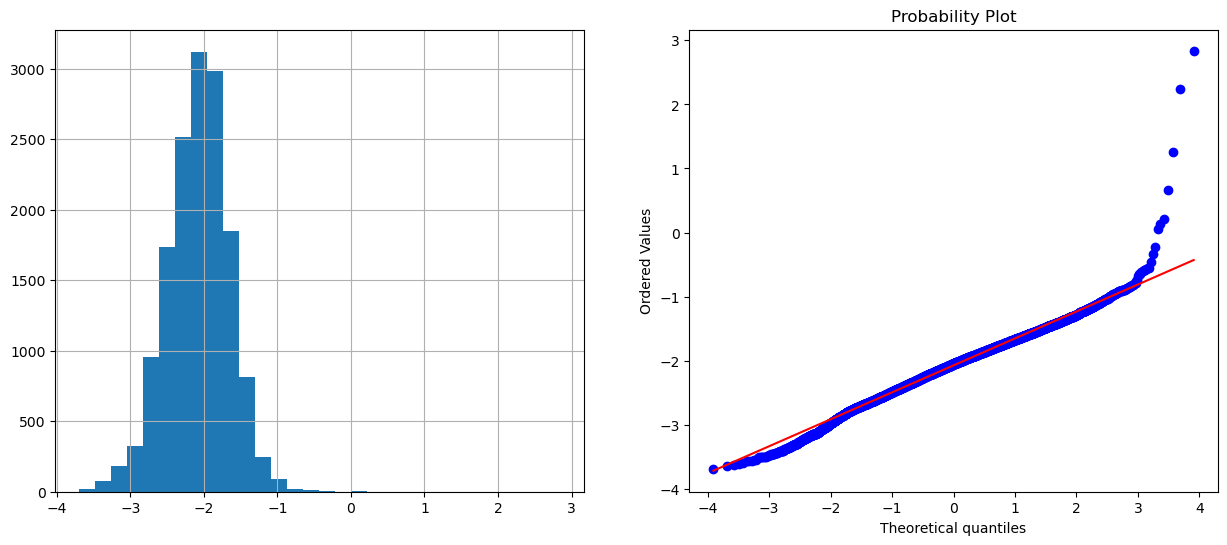

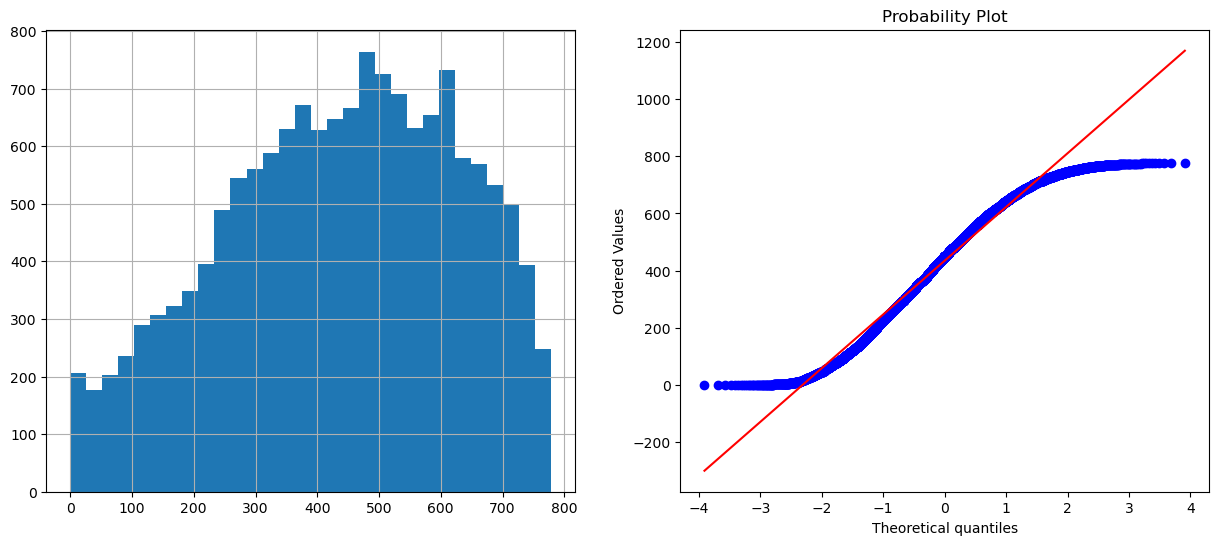

In [43]:
diagnostic_plots(df_cleaned_3, 'Song_Duration_ms')
diagnostic_plots(df_cleaned_3, 'Acousticness')
diagnostic_plots(df_cleaned_3, 'Energy')
diagnostic_plots(df_cleaned_3, 'Instrumentalness')
diagnostic_plots(df_cleaned_3, 'Liveness')
diagnostic_plots(df_cleaned_3, 'Speechiness')
diagnostic_plots(df_cleaned_3, 'Audio_valence')
diagnostic_plots(df_cleaned_3, 'Decibel')
diagnostic_plots(df_cleaned_3, 'Indicator')

###### vii) Outliers

In [44]:
# find numerical variables
num_cols = [c for c in df_cleaned_3.columns if df_cleaned_3[c].dtypes !='O']
df_cleaned_3[num_cols].isnull().mean().sort_values()

Song_Duration_ms    0.000000
Acousticness        0.000000
Energy              0.000000
Instrumentalness    0.000000
Liveness            0.000000
Tempo               0.000000
Audio_valence       0.000000
Decibel             0.000000
Song_Popularity     0.000000
Indicator           0.000000
Danceability        0.152898
Speechiness         0.298023
dtype: float64

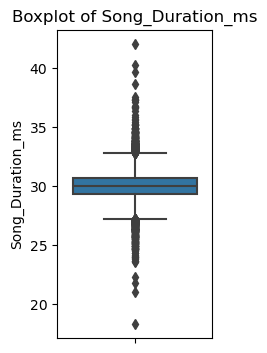

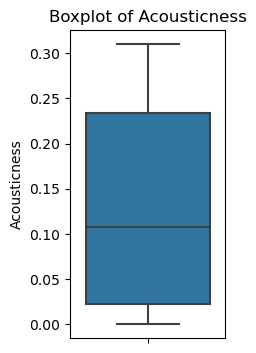

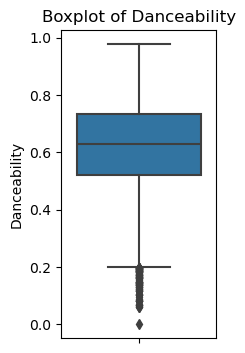

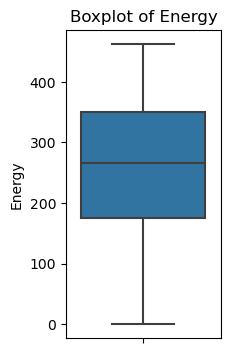

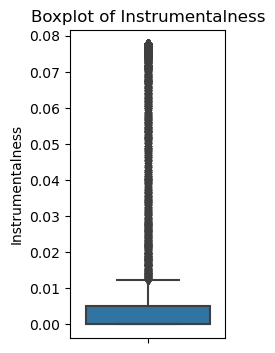

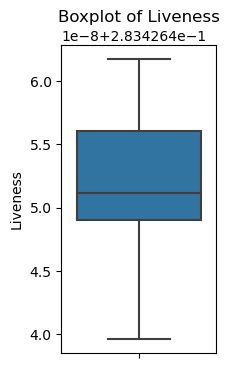

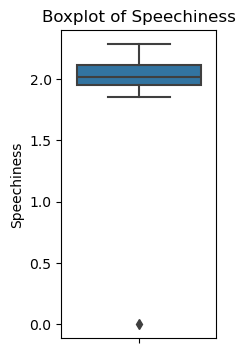

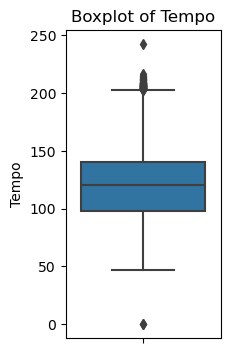

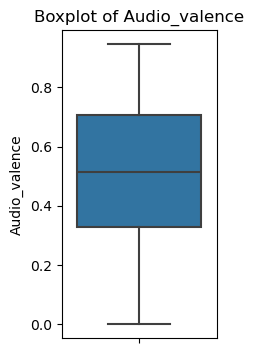

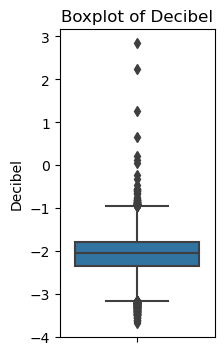

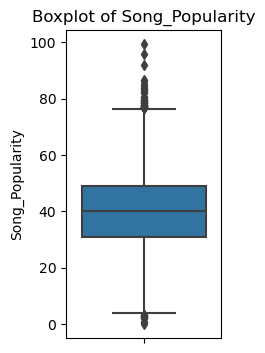

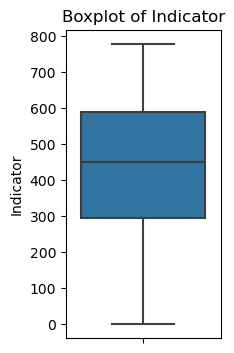

In [45]:
for column in num_cols:
    plt.figure(figsize=(2, 4))
    sns.boxplot(y=df_cleaned_3[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

### Step 4: Train and Test Split

In [46]:
X = df_cleaned_3.drop(columns=['Song_Popularity'])

X_train, X_test, y_train, y_test = train_test_split(X, df_cleaned_3['Song_Popularity'], 
                                                    test_size=0.3, random_state=0)

In [47]:
X_train.shape, X_test.shape

((10447, 15), (4478, 15))

### Step 5: Missing Value Imputation

In [48]:
X_train.isna().sum()

Song_Duration_ms       0
Acousticness           0
Danceability        1579
Energy                 0
Instrumentalness       0
Key                    0
Liveness               0
Audio_mode             0
Speechiness         3097
Tempo                  0
Audio_valence          0
Dynamism            2033
Decibel                0
Loudness            1087
Indicator              0
dtype: int64

In [49]:
X_test.isna().sum()

Song_Duration_ms       0
Acousticness           0
Danceability         703
Energy                 0
Instrumentalness       0
Key                    0
Liveness               0
Audio_mode             0
Speechiness         1351
Tempo                  0
Audio_valence          0
Dynamism             881
Decibel                0
Loudness             438
Indicator              0
dtype: int64

In [50]:
# Identify categorical and quantitative columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
quantitative_cols = X_train.select_dtypes(include=['number']).columns

In [51]:
quantitative_cols

Index(['Song_Duration_ms', 'Acousticness', 'Danceability', 'Energy',
       'Instrumentalness', 'Liveness', 'Speechiness', 'Tempo', 'Audio_valence',
       'Decibel', 'Indicator'],
      dtype='object')

In [52]:
categorical_cols

Index(['Key', 'Audio_mode', 'Dynamism', 'Loudness'], dtype='object')

In [53]:
# Apply mode imputation for categorical columns in the training set
mode_imputer = SimpleImputer(strategy='most_frequent')
X_train[categorical_cols] = mode_imputer.fit_transform(X_train[categorical_cols])

# Apply the same mode imputation to the test set
X_test[categorical_cols] = mode_imputer.transform(X_test[categorical_cols])

In [54]:
# Apply median imputation for quantitative columns in the training set
median_imputer = SimpleImputer(strategy='median')
X_train[quantitative_cols] = median_imputer.fit_transform(X_train[quantitative_cols])

# Apply the same median imputation to the test set
X_test[quantitative_cols] = median_imputer.transform(X_test[quantitative_cols])

### Step 6: Categorical Data Encoding

In [55]:
# List of categorical columns to be one-hot encoded
categorical_columns = ['Key', 'Audio_mode', 'Dynamism', 'Loudness']

# Identify all unique levels for each categorical variable in the training set
all_levels = {
    'Key': X_train['Key'].unique(),
    'Audio_mode': X_train['Audio_mode'].unique(),
    'Dynamism': X_train['Dynamism'].unique(),
    'Loudness': X_train['Loudness'].unique()
}

# Ensure all levels are present in both training and testing sets
for col, levels in all_levels.items():
    for level in levels:
        if level not in X_train[col].unique():
            X_train[col] = X_train[col].astype('category').cat.add_categories([level])
        if level not in X_test[col].unique():
            X_test[col] = X_test[col].astype('category').cat.add_categories([level])

# Apply one-hot encoding ensuring all levels are present
train_df_encoded = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
test_df_encoded = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)

# Ensure the test set has the same columns as the train set
missing_cols = set(train_df_encoded.columns) - set(test_df_encoded.columns)
for c in missing_cols:
    test_df_encoded[c] = 0
test_df_encoded = test_df_encoded[train_df_encoded.columns]

In [56]:
train_df_encoded

Song_Duration_ms  Acousticness  Danceability      Energy  \
12708         30.048752      0.305172       0.55044   34.193003   
10819         32.553337      0.004046       0.78903  171.578640   
4347          29.560654      0.069858       0.34947  313.138208   
16872         31.066483      0.090695       0.50886  360.759444   
10988         29.209403      0.240458       0.65538  183.815894   
...                 ...           ...           ...         ...   
15999         30.458759      0.298462       0.62865  119.441668   
3587          28.199353      0.110912       0.65043  299.974290   
11305         29.335891      0.298562       0.70389  341.125232   
12716         29.938542      0.290958       0.46827  117.262771   
2997          30.890068      0.046979       0.69696  248.987460   

       Instrumentalness  Liveness  Speechiness    Tempo  Audio_valence  \
12708          0.077672  0.283426     2.017686  103.602       0.178436   
10819          0.067944  0.283426     2.061003  117.993       0.703272   
4347          -0.000000  0.283426     2.271205  191.153       0.428475   
16872         -0.000000  0.283426     1.959016  143.888       0.489995   
10988          0.000119  0.283426     2.017686   99.063       0.120279   
...                 ...       ...          ...      ...            ...   
15999          0.000121  0.283426     1.918243  103.851       0.316241   
3587           0.001111  0.283426     1.968623  125.990       0.815397   
11305          0.077667  0.283426     1.963680   99.640       0.921181   
12716         -0.000000  0.283426     2.017686   75.208       0.405333   
2997           0.075216  0.283426     1.969063   94.077       0.541693   

        Decibel   Indicator  Key_1  Key_2  Key_3  Key_4  Key_5  Key_6  Key_7  \
12708 -2.776111   57.669780  False  False  False  False  False   True  False   
10819 -2.494456  289.880428  False  False  False   True  False  False  False   
4347  -1.988060  528.041397   True  False  False  False  False  False  False   
16872 -1.541752  607.996303  False  False  False  False   True  False  False   
10988 -2.357885  310.503259  False  False  False  False  False  False  False   
...         ...         ...    ...    ...    ...    ...    ...    ...    ...   
15999 -2.489944  201.921327  False   True  False  False  False  False  False   
3587  -1.943649  505.926818  False  False  False   True  False  False  False   
11305 -2.285857  575.039330  False   True  False  False  False  False  False   
12716 -2.422773  198.241623  False  False  False   True  False  False  False   
2997  -2.044510  420.214485  False  False  False  False  False  False  False   

       Key_8  Key_9  Key_10  Key_11  Audio_mode_1  Dynamism_High  \
12708  False  False   False   False         False          False   
10819  False  False   False   False         False          False   
4347   False  False   False   False         False           True   
16872  False  False   False   False          True           True   
10988  False  False   False   False         False          False   
...      ...    ...     ...     ...           ...            ...   
15999  False  False   False   False          True          False   
3587   False  False   False   False          True           True   
11305  False  False   False   False          True           True   
12716  False  False   False   False         False          False   
2997    True  False   False   False         False           True   

       Dynamism_Low  Dynamism_Medium  Loudness_Blare  Loudness_Blast  \
12708          True            False           False           False   
10819         False             True           False           False   
4347          False            False           False           False   
16872         False            False           False           False   
10988         False             True           False           False   
...             ...              ...             ...             ...   
15999         False            

In [57]:
test_df_encoded

Song_Duration_ms  Acousticness  Danceability      Energy  \
2834          30.049596      0.023515       0.79893  228.742015   
10243         31.775162      0.282958       0.50490   64.592525   
439           33.585002      0.181854       0.45144  279.699697   
18018         30.412869      0.049486       0.52866  235.612596   
1961          30.184665      0.000078       0.69894  363.761690   
...                 ...           ...           ...         ...   
1803          31.334954      0.150052       0.62865  293.736183   
13301         28.677818      0.309790       0.31878    1.456003   
16707         31.260336      0.004027       0.74250  109.088734   
16007         31.836003      0.192587       0.53955  222.451988   
8652          29.911821      0.045675       0.69300  423.386827   

       Instrumentalness  Liveness  Speechiness    Tempo  Audio_valence  \
2834           0.067507  0.283426     2.017978  113.543       0.896898   
10243          0.077260  0.283426     2.017686  170.250       0.614142   
439            0.000207  0.283426     2.017686  142.156       0.496707   
18018          0.000002  0.283426     1.962761  141.915       0.389883   
1961          -0.000000  0.283426     1.975486  132.032       0.831353   
...                 ...       ...          ...      ...            ...   
1803          -0.000000  0.283426     1.970808  120.081       0.481360   
13301          0.077675  0.283426     2.002696  112.464       0.117314   
16707          0.077569  0.283426     2.017686  114.580       0.418838   
16007          0.000388  0.283426     2.017686  111.739       0.126207   
8652           0.037283  0.283426     2.061971  159.980       0.311381   

        Decibel   Indicator  Key_1  Key_2  Key_3  Key_4  Key_5  Key_6  Key_7  \
2834  -2.492035  386.152817  False  False  False  False  False  False  False   
10243 -2.729491  109.182034  False  False  False  False  False  False  False   
439   -2.402976  471.855172  False  False  False  False   True  False  False   
18018 -1.861064  397.714023  False  False  False  False  False  False  False   
1961  -1.602861  613.034723  False  False  False  False  False  False   True   
...         ...         ...    ...    ...    ...    ...    ...    ...    ...   
1803  -1.927226  495.445141  False  False  False  False  False  False  False   
13301 -3.507133    2.325256  False  False  False  False   True  False  False   
16707 -3.054915  184.434393  False  False  False  False  False  False  False   
16007 -2.043988  375.566759  False   True  False  False  False  False  False   
8652  -1.077731  713.047392  False   True  False  False  False  False  False   

       Key_8  Key_9  Key_10  Key_11  Audio_mode_1  Dynamism_High  \
2834   False   True   False   False          True           True   
10243  False  False   False   False         False          False   
439    False  False   False   False          True           True   
18018  False  False   False    True         False           True   
1961   False  False   False   False          True           True   
...      ...    ...     ...     ...           ...            ...   
1803   False   True   False   False         False           True   
13301  False  False   False   False          True          False   
16707  False  False   False   False          True          False   
16007  False  False   False   False          True          False   
8652   False  False   False   False          True           True   

       Dynamism_Low  Dynamism_Medium  Loudness_Blare  Loudness_Blast  \
2834          False            False           False           False   
10243         False             True           False           False   
439           False            False           False           False   
18018         False            False            True           False   
1961          False            False            True           False   
...             ...              ...             ...             ...   
1803          False            

### Step 7: Variable Discretization /Binning

In [58]:
df_cleaned_3['Instrumentalness'].describe()

count    14925.000000
mean         0.013571
std          0.026889
min         -0.000000
25%          0.000000
50%          0.000021
75%          0.004933
max          0.077681
Name: Instrumentalness, dtype: float64

In [59]:
df_cleaned_3.describe()

Song_Duration_ms  Acousticness  Danceability        Energy  \
count      14925.000000  1.492500e+04  12643.000000  14925.000000   
mean          30.006973  1.290070e-01      0.618024    257.766466   
std            1.287272  1.080194e-01      0.156494    112.975089   
min           18.303491  9.999981e-07      0.000000      0.109263   
25%           29.312835  2.216823e-02      0.518760    174.980682   
50%           29.994966  1.078893e-01      0.628650    266.412054   
75%           30.704801  2.335544e-01      0.732600    350.010773   
max           42.005199  3.100236e-01      0.977130    462.182036   

       Instrumentalness      Liveness   Speechiness         Tempo  \
count      14925.000000  1.492500e+04  10477.000000  14925.000000   
mean           0.013571  2.834265e-01      2.038759    121.106083   
std            0.026889  4.576966e-09      0.102875     29.045320   
min           -0.000000  2.834264e-01     -0.000000      0.000000   
25%            0.000000  2.834264e-01      1.954670     98.121000   
50%            0.000021  2.834265e-01      2.018270    120.016000   
75%            0.004933  2.834265e-01      2.116564    139.941000   
max            0.077681  2.834265e-01      2.283980    242.318000   

       Audio_valence       Decibel  Song_Popularity     Indicator  
count   14925.000000  14925.000000     14925.000000  14925.000000  
mean        0.512876     -2.074019        39.952399    434.712289  
std         0.237516      0.423638        13.289080    190.133959  
min         0.000000     -3.695057         0.000000      0.164882  
25%         0.326926     -2.345685        30.900000    295.614501  
50%         0.514910     -2.051526        40.060000    449.517197  
75%         0.706108     -1.793089        49.120000    589.955554  
max         0.946363      2.838022        99.320000    778.072183

### Step 8: Feature Engineer

In [60]:
quantitative_df = df_cleaned_3.select_dtypes(include=['int64', 'float64'])
range_dict = {col: quantitative_df[col].max() - quantitative_df[col].min() for col in quantitative_df.columns}
range_dict

{'Song_Duration_ms': 23.701707748712664,
 'Acousticness': 0.31002255924940214,
 'Danceability': 0.97713,
 'Energy': 462.0727724759924,
 'Instrumentalness': 0.07768125259633674,
 'Liveness': 2.2078950945303433e-08,
 'Speechiness': 2.283980377779737,
 'Tempo': 242.318,
 'Audio_valence': 0.9463626902378227,
 'Decibel': 6.533078746295862,
 'Song_Popularity': 99.32,
 'Indicator': 777.9073015956993}

### Step 9: Linear Regression Modelling

Linear regression is defined as a machine learning model in which the model finds the best fit linear line between the independent and dependent variables in which the aim is to find the best fit linear line and the optimal values of intercept and coefficients such that errors are minimized. For the purpose of this analysis, the goal is to use the X variables e.g. columns other than item outlet sales,to predict the item outlet sales (y variable, or target variable).
### Building and Evaluating the Model
In order to evaluate the model performance of a linear regression model, a range of measures can be used, but in this ASG1 we will focus on only 2:

- Mean Square Error (MSE): The MSE is the variance of the residuals, that is, the squared differences between prediction and actual observation. Lower values of MSE indicate better fit and model performance.
- R-Square: R-square represents the percentage of the response variable variation that is explained by a linear model. The closer to 1.0 the value of R-square, the more indicative of a better fit and model performance.

In [61]:
# assign your fully cleaned and transformed data contained within your versions of 
# X_train_student_final_premodel_version, X_test_student_final_premodel_version,
# y_train_student_final_premodel_version and y_test_student_final_premodel_version into
# the prepared variables below, for a simple linear regression model

In [62]:
X_train_final = train_df_encoded
X_test_final = test_df_encoded

y_train_final = y_train
y_test_final = y_test

In [63]:
# Build Linear Regression Model
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_final, y_train_final)

# Evaluate the Linear Regression Model using Mean Square Error (MSE)
# The lower MSE, the better the model performance
print('train_mse:', mean_squared_error(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\n test_mse:', mean_squared_error(y_test_final, model_linear_regression.predict(X_test_final)))

# Evaluate the Linear Regression Model using R-Square
# The closer the r-square value to 1, the better the model performance
print('train_r-sq:', r2_score(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\n test_r-sq:', r2_score(y_test_final, model_linear_regression.predict(X_test_final)))

train_mse: 102.54584609541243 
 test_mse: 102.97492846394655
train_r-sq: 0.41486362190568793 
 test_r-sq: 0.42698121412483847


# --------------------------------- Phase 02 ---------------------------------

In this phase, we are trying to improve our model performance. In phase 02, we are removing outliers from the 'Song_Duration_ms', 'Instrumentalness' and 'Decibel' variables and refit the Linear Regression Model again.

In [64]:
########################## Step 3: Data Preprocessing ##########################

# ###### i) Check duplicates

df_phase_02 = df.copy()
df_cleaned_1 = df_phase_02.drop_duplicates(subset=['Song_Name', 'Song_Popularity', 'Code'], keep='first')


# ###### ii) Dropping unwanted columns

df_cleaned_1 = df_cleaned_1.drop(columns = ['Song_Name', 'Code'])


# ###### iii) Data types tranformations

# Function to check for non-numeric characters
def contains_non_numeric(value):
    pattern = re.compile(r'[^0-9.]')  # Pattern to match any character that is not a digit or a dot
    return bool(pattern.search(str(value)))

# Check for non-numeric characters in 'Liveness'
df_cleaned_1['non_numeric_in_Liveness'] = df_cleaned_1['Liveness'].apply(contains_non_numeric)
non_numeric_rows = df_cleaned_1[df_cleaned_1['non_numeric_in_Liveness']]

df_cleaned_2 = df_cleaned_1[~df_cleaned_1['non_numeric_in_Liveness']]
df_cleaned_2 = df_cleaned_2.drop(columns=['non_numeric_in_Liveness'])
df_cleaned_2['Liveness'] = df_cleaned_2['Liveness'].astype(float)
df_cleaned_2['Audio_mode'] = df_cleaned_2['Audio_mode'].astype(object)
df_cleaned_2['Key'] = df_cleaned_2['Key'].astype(object)


# ###### iv) Update values in the columns

df_cleaned_2['Loudness'] = df_cleaned_2['Loudness'].replace('?', np.nan)

replace_dict = {'Med': 'Medium', 'Hi': 'High',
               'Lo': 'Low', 'high': 'High',
               'm': 'Medium', 'h': 'High', 'l': 'Low'}

# Apply the replacement
df_cleaned_2['Dynamism'] = df_cleaned_2['Dynamism'].replace(replace_dict)


# ###### v) Numerical data transformation


## find numerical variables
num_cols = [n for n in df_cleaned_2.columns if df_cleaned_2[n].dtypes!='O']
numerical_columns_selected = ['Song_Duration_ms', 'Acousticness', 'Energy',
       'Instrumentalness', 'Liveness', 'Speechiness', 'Audio_valence', 'Decibel', 'Indicator']


# Apply PowerTransformer only to numerical columns
transformer = PowerTransformer(method='yeo-johnson', standardize=False)
transformer.fit(df_cleaned_2[numerical_columns_selected])
transformed_numerical = transformer.transform(df_cleaned_2[numerical_columns_selected])

# Replace the numerical columns with transformed values in the original DataFrame
df_cleaned_3 = df_cleaned_2.copy()
df_cleaned_3[numerical_columns_selected] = transformed_numerical


# ###### vi) Outliers

def find_boundaries(df, variable, distance):

    #Calculate the boundaries that sit the outliers to check for skewed distributions

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

# find numerical variables
num_cols = [c for c in df_cleaned_3.columns if df_cleaned_3[c].dtypes !='O']
df_cleaned_3[num_cols].isnull().mean().sort_values()


#find limits for Song_Duration_ms
price_upper_limit_Song_Duration_ms, price_lower_limit_Song_Duration_ms = find_boundaries(df_cleaned_3, 'Song_Duration_ms', 1.5)
outliers_Song_Duration_ms = np.where(df_cleaned_3['Song_Duration_ms'] > price_upper_limit_Song_Duration_ms, True,
                       np.where(df_cleaned_3['Song_Duration_ms'] < price_lower_limit_Song_Duration_ms, True, False))
print(price_upper_limit_Song_Duration_ms, price_lower_limit_Song_Duration_ms)

#trim the dataset by only removing price outliers
df_cleaned_3 = df_cleaned_3.loc[~outliers_Song_Duration_ms]



#find limits for Decibel
price_upper_limit_Decibel, price_lower_limit_Decibel = find_boundaries(df_cleaned_3, 'Decibel', 1.5)
outliers_Decibel = np.where(df_cleaned_3['Decibel'] > price_upper_limit_Decibel, True,
                       np.where(df_cleaned_3['Decibel'] < price_lower_limit_Decibel, True, False))
print(price_upper_limit_Decibel, price_lower_limit_Decibel)

#trim the dataset by only removing price outliers
df_cleaned_3 = df_cleaned_3.loc[~outliers_Decibel]



#find limits for Instrumentalness
price_upper_limit_Instrumentalness, price_lower_limit_Instrumentalness = find_boundaries(df_cleaned_3, 'Instrumentalness', 1.5)
outliers_Instrumentalness = np.where(df_cleaned_3['Instrumentalness'] > price_upper_limit_Instrumentalness, True,
                       np.where(df_cleaned_3['Instrumentalness'] < price_lower_limit_Instrumentalness, True, False))
print(price_upper_limit_Instrumentalness, price_lower_limit_Instrumentalness)

#trim the dataset by only removing price outliers
df_cleaned_3 = df_cleaned_3.loc[~outliers_Instrumentalness]



########################## Step 4: Train and Test Split ##########################


X = df_cleaned_3.drop(columns=['Song_Popularity'])

X_train, X_test, y_train, y_test = train_test_split(X, df_cleaned_3['Song_Popularity'], 
                                                    test_size=0.3, random_state=0)



########################## Step 5: Missing Value Imputation ##########################

# Identify categorical and quantitative columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
quantitative_cols = X_train.select_dtypes(include=['number']).columns


# Apply mode imputation for categorical columns in the training set
mode_imputer = SimpleImputer(strategy='most_frequent')
X_train[categorical_cols] = mode_imputer.fit_transform(X_train[categorical_cols])

# Apply the same mode imputation to the test set
X_test[categorical_cols] = mode_imputer.transform(X_test[categorical_cols])

# Apply median imputation for quantitative columns in the training set
median_imputer = SimpleImputer(strategy='median')
X_train[quantitative_cols] = median_imputer.fit_transform(X_train[quantitative_cols])

# Apply the same median imputation to the test set
X_test[quantitative_cols] = median_imputer.transform(X_test[quantitative_cols])


########################## Step 6: Categorical Data Encoding ##########################


# List of categorical columns to be one-hot encoded
categorical_columns = ['Key', 'Audio_mode', 'Dynamism', 'Loudness']

# Identify all unique levels for each categorical variable in the training set
all_levels = {
    'Key': X_train['Key'].unique(),
    'Audio_mode': X_train['Audio_mode'].unique(),
    'Dynamism': X_train['Dynamism'].unique(),
    'Loudness': X_train['Loudness'].unique()
}

# Ensure all levels are present in both training and testing sets
for col, levels in all_levels.items():
    for level in levels:
        if level not in X_train[col].unique():
            X_train[col] = X_train[col].astype('category').cat.add_categories([level])
        if level not in X_test[col].unique():
            X_test[col] = X_test[col].astype('category').cat.add_categories([level])

# Apply one-hot encoding ensuring all levels are present
train_df_encoded = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
test_df_encoded = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)

# Ensure the test set has the same columns as the train set
missing_cols = set(train_df_encoded.columns) - set(test_df_encoded.columns)
for c in missing_cols:
    test_df_encoded[c] = 0
test_df_encoded = test_df_encoded[train_df_encoded.columns]


########################## Step 7: Linear Regression Modelling ##########################


X_train_final = train_df_encoded
X_test_final = test_df_encoded

y_train_final = y_train
y_test_final = y_test

# Build Linear Regression Model
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_final, y_train_final)

# Evaluate the Linear Regression Model using Mean Square Error (MSE)
# The lower MSE, the better the model performance
print('train_mse:', mean_squared_error(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\n test_mse:', mean_squared_error(y_test_final, model_linear_regression.predict(X_test_final)))

# Evaluate the Linear Regression Model using R-Square
# The closer the r-square value to 1, the better the model performance
print('train_r-sq:', r2_score(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\n test_r-sq:', r2_score(y_test_final, model_linear_regression.predict(X_test_final)))

32.79275043835288 27.22488517310154
-0.9676275297465171 -3.1454255719470456
0.006601187127596721 -0.0039607122765580325
train_mse: 104.75962014910574 
 test_mse: 105.52643602391981
train_r-sq: 0.380311966543289 
 test_r-sq: 0.4035975820259633


According to the results we can see that, the phase 01 model is better than the phase 02 model

# --------------------------------- Phase 03 ---------------------------------

In this phase, we are using the same data preprocessing steps that we have used in phase 01. The only difference in this phase is we removed 'Energy' variable from the dataset beacuse it has perfect correlation with some independent variables. Also I have scaled 'Tempo', 'Indicator' variables as well

In [65]:
########################## Step 3: Data Preprocessing ##########################

# ###### i) Check duplicates

df_phase_02 = df.copy()
df_cleaned_1 = df_phase_02.drop_duplicates(subset=['Song_Name', 'Song_Popularity', 'Code'], keep='first')


# ###### ii) Dropping unwanted columns

df_cleaned_1 = df_cleaned_1.drop(columns = ['Song_Name', 'Code'])


# ###### iii) Data types tranformations

# Function to check for non-numeric characters
def contains_non_numeric(value):
    pattern = re.compile(r'[^0-9.]')  # Pattern to match any character that is not a digit or a dot
    return bool(pattern.search(str(value)))

# Check for non-numeric characters in 'Liveness'
df_cleaned_1['non_numeric_in_Liveness'] = df_cleaned_1['Liveness'].apply(contains_non_numeric)
non_numeric_rows = df_cleaned_1[df_cleaned_1['non_numeric_in_Liveness']]

df_cleaned_2 = df_cleaned_1[~df_cleaned_1['non_numeric_in_Liveness']]
df_cleaned_2 = df_cleaned_2.drop(columns=['non_numeric_in_Liveness'])
df_cleaned_2['Liveness'] = df_cleaned_2['Liveness'].astype(float)
df_cleaned_2['Audio_mode'] = df_cleaned_2['Audio_mode'].astype(object)
df_cleaned_2['Key'] = df_cleaned_2['Key'].astype(object)


# ###### iv) Update values in the columns

df_cleaned_2['Loudness'] = df_cleaned_2['Loudness'].replace('?', np.nan)

replace_dict = {'Med': 'Medium', 'Hi': 'High',
               'Lo': 'Low', 'high': 'High',
               'm': 'Medium', 'h': 'High', 'l': 'Low'}

# Apply the replacement
df_cleaned_2['Dynamism'] = df_cleaned_2['Dynamism'].replace(replace_dict)


# ###### v) Numerical data transformation


## find numerical variables
num_cols = [n for n in df_cleaned_2.columns if df_cleaned_2[n].dtypes!='O']
numerical_columns_selected = ['Song_Duration_ms', 'Acousticness', 'Energy',
       'Instrumentalness', 'Liveness', 'Speechiness', 'Audio_valence', 'Decibel', 'Indicator']


# Apply PowerTransformer only to numerical columns
transformer = PowerTransformer(method='yeo-johnson', standardize=False)
transformer.fit(df_cleaned_2[numerical_columns_selected])
transformed_numerical = transformer.transform(df_cleaned_2[numerical_columns_selected])

# Replace the numerical columns with transformed values in the original DataFrame
df_cleaned_3 = df_cleaned_2.copy()
df_cleaned_3[numerical_columns_selected] = transformed_numerical


# ###### vi) Outliers

# find numerical variables
num_cols = [c for c in df_cleaned_3.columns if df_cleaned_3[c].dtypes !='O']
df_cleaned_3[num_cols].isnull().mean().sort_values()



########################## Step 4: Train and Test Split ##########################


X = df_cleaned_3.drop(columns=['Song_Popularity'])

X_train, X_test, y_train, y_test = train_test_split(X, df_cleaned_3['Song_Popularity'], 
                                                    test_size=0.3, random_state=0)



########################## Step 5: Missing Value Imputation ##########################

# Identify categorical and quantitative columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
quantitative_cols = X_train.select_dtypes(include=['number']).columns


# Apply mode imputation for categorical columns in the training set
mode_imputer = SimpleImputer(strategy='most_frequent')
X_train[categorical_cols] = mode_imputer.fit_transform(X_train[categorical_cols])

# Apply the same mode imputation to the test set
X_test[categorical_cols] = mode_imputer.transform(X_test[categorical_cols])

# Apply median imputation for quantitative columns in the training set
median_imputer = SimpleImputer(strategy='median')
X_train[quantitative_cols] = median_imputer.fit_transform(X_train[quantitative_cols])

# Apply the same median imputation to the test set
X_test[quantitative_cols] = median_imputer.transform(X_test[quantitative_cols])


########################## Step 6: Categorical Data Encoding ##########################


# List of categorical columns to be one-hot encoded
categorical_columns = ['Key', 'Audio_mode', 'Dynamism', 'Loudness']

# Identify all unique levels for each categorical variable in the training set
all_levels = {
    'Key': X_train['Key'].unique(),
    'Audio_mode': X_train['Audio_mode'].unique(),
    'Dynamism': X_train['Dynamism'].unique(),
    'Loudness': X_train['Loudness'].unique()
}

# Ensure all levels are present in both training and testing sets
for col, levels in all_levels.items():
    for level in levels:
        if level not in X_train[col].unique():
            X_train[col] = X_train[col].astype('category').cat.add_categories([level])
        if level not in X_test[col].unique():
            X_test[col] = X_test[col].astype('category').cat.add_categories([level])

# Apply one-hot encoding ensuring all levels are present
train_df_encoded = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
test_df_encoded = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)

# Ensure the test set has the same columns as the train set
missing_cols = set(train_df_encoded.columns) - set(test_df_encoded.columns)
for c in missing_cols:
    test_df_encoded[c] = 0
test_df_encoded = test_df_encoded[train_df_encoded.columns]


########################## Step 7: Feature Engineer ##########################

columns_to_scale = ['Tempo', 'Indicator']

scaler = MinMaxScaler()

# Fit the scaler to the selected columns and transform them
train_df_encoded[columns_to_scale] = scaler.fit_transform(train_df_encoded[columns_to_scale])
test_df_encoded[columns_to_scale] = scaler.fit_transform(test_df_encoded[columns_to_scale])

train_df_encoded = train_df_encoded.drop(columns = ['Energy'])
test_df_encoded = test_df_encoded.drop(columns = ['Energy'])

########################## Step 8: Linear Regression Modelling ##########################


X_train_final = train_df_encoded
X_test_final = test_df_encoded

y_train_final = y_train
y_test_final = y_test

# Build Linear Regression Model
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_final, y_train_final)

# Evaluate the Linear Regression Model using Mean Square Error (MSE)
# The lower MSE, the better the model performance
print('train_mse:', mean_squared_error(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\n test_mse:', mean_squared_error(y_test_final, model_linear_regression.predict(X_test_final)))

# Evaluate the Linear Regression Model using R-Square
# The closer the r-square value to 1, the better the model performance
print('train_r-sq:', r2_score(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\n test_r-sq:', r2_score(y_test_final, model_linear_regression.predict(X_test_final)))

train_mse: 102.5467277154939 
 test_mse: 102.9570520758384
train_r-sq: 0.41485859129741887 
 test_r-sq: 0.42708068985511927


# ---------------------------------------- Report  ----------------------------------------

## Problem Statement

Listening to music is a very common hobby for a lot of people around the world, but the interests in songs vary from person to person. So, it is challenging to create a song for which everybody loves. For that, it is important to identify the factors that affect the popularity of songs.  Out of those factors, the characteristics of songs are very crucial when determining the song's popularity.
Hence, this study is conducted with the aim of identifying the attributes that affect the song’s popularity. As the song characteristics, song duration, acousticness, danceability, energy, speechiness, instrumentalness, etc are selected to predict the song's popularity. The findings of this study will lead to the optimum allocation of marketing resources in the company.

## Exploratory Data Analysis

When analyzing the dataset, the following insights were obtained. 


There are missing values in the variables Danceability, Speechiness and Dynamism variables. Around 30% of the data is missing in the Speechiness variable. 
Focusing on the quantitative attributes, the spread of the numeric variables is different to one another. The Spread of Song_Duration, Acousticness, Audio_valence  and Danceability variables are low compared to variables like energy, tempo and indicator. The reason is the smaller values can be seen in the Song_Duration, Acousticness, Audio_valence and Danceability compared to the other variables. Most of the quantitative variables seem to have skewed distributions.  Song duration, acousticness, instrumentalness, and speechiness variables are having right skewed distributions while indicator, decibel, energy and danceability variables are having the left-skewed distribution. The song popularity variable seems to have a normal distribution. Below, the plots show the distribution of some selected quantitative variables.

<table>
  <tr>
    <td><img src="images/image_01.png" alt="Image 1" style="width: 100%;"></td>
    <td><img src="images/image_02.png" alt="Image 2" style="width: 100%;"></td>
    <td><img src="images/image_03.png" alt="Image 3" style="width: 100%;"></td>
  </tr>
  <tr>
    <td><img src="images/image_04.png" alt="Image 4" style="width: 100%;"></td>
    <td><img src="images/image_05.png" alt="Image 5" style="width: 100%;"></td>
    <td><img src="images/image_06.png" alt="Image 6" style="width: 100%;"></td>
  </tr>
</table>


Focusing on the qualitative variables, the variable dynamism seems to have repeated categories. As an example, the High category is repeated as “High”, “high”, hi” and “h”. Therefore, those categories should be combined into one category before the analysis. The loudness variable has many categories including “?” mark which should be preprocessed before the analysis. The same situation can be seen with the liveness variable. Below, the plots show the distribution of some selected qualitative variables.

<table>
  <tr>
    <td><img src="images/image_07.png" alt="Image 1" style="width: 100%;"></td>
    <td><img src="images/image_08.png" alt="Image 2" style="width: 100%;"></td>
  </tr>
</table>

Then the scatter plots are obtained to investigate the bivariate relationships. A perfect linear relationship can be examined between the energy and the indicator variables. This indicates that when the energy of the song is increasing the indicator of the song is also increasing. This is a crucial situation as when modelling the data, this relationship will lead to multicollinearity. A positive relationship which is moderate in strength can be seen between the two variables song popularity and the decibel. Moreover, a positive relationship can be observed between the decibel and the energy variable.  A negative relationship is shown between the decibel and the acousticness variables. This indicates when the value of the decibel is increasing, the value of the acousticness is decreasing. The same kind of relationship can be seen between the two variables energy and the acousticness which indicates that when the energy of the song is increasing, the acousticness of the song is also decreasing. The relationships in both seem to be moderate in strength.

Then the correlation map is obtained to check the strength of the above-seen relationships through the scatter plots.  The correlation map confirms the above-mentioned relationships. The correlation coefficient value is +1 for the indicator and the energy variables which confirms the perfect positive relationship. The correlation coefficient between the decibel and the song popularity variables is 0.51. This indicates a positive relationship which is moderate in strength. The correlation coefficient between the decibel vs the acousticness and the acousticness vs energy are -0.56 and -0.66 respectively. This confirms the negative relationships which are moderate in strength. There is no relationship between most of the song’s attributes as suggested by the scatter plots. This is in line with the values given by the correlation heat map. 

<table>
  <tr>
    <td><img src="images/image_09.png" alt="Image 1" style="width: 100%;"></td>
  </tr>
</table>

## Cleanse the Data

#### Missing values investigation

First, it checked for duplicates in the dataset, which is an important step in data wrangling. For doing that task, three variables have been selected, which are 'Song_Name', 'Song_Popularity', and 'Code'. Out of 18835 observations, it was found that 3909 observations were duplicates and removed from the original dataset. Further analysis was done using 14926 observations. 


Then the null values were checked, and it was found that there were null values in the variables “Danceability”, “Speechiness” and “Dynamism”. The table below displays the number of missing values in each variable. 

| Variable      | Number of missing values |
|---------------|--------------------------|
| Danceability  | 2282                     |
| Speechiness   | 4448                     |
| Dynamism      | 2914                     |

Another extremely important point is that the “Loudness” variable has a value called “?” which is not helpful for this analysis. So, I considered those “?” values as NULL values and treated them accordingly. There were 1525 “?” values in the dataset and the table below represents the total number of missing values for each variable in the dataset after doing that value change. 

| Variable      | Number of missing values |
|---------------|--------------------------|
| Danceability  | 2282                     |
| Speechiness   | 4448                     |
| Dynamism      | 2914                     |
| Loudness      | 1525                     |

After splitting the cleaned dataset into training and testing sets, I imputed those missing values using both median and mode imputation techniques. I decided to impute those missing values because we have so many missing values in the dataset, and it is not good practice to remove such an amount of data from an original dataset. Since, the 'Dynamism', and 'Loudness' variables were in categorical format, the missing values in those two columns were imputed by their mode values. Median imputation was used for the variables “Danceability”, and “Speechiness” because they were in a quantitative format. The rest of the variables had no missing values and they were ready for analysis. 

#### Check for the outliers

There were outliers in the dataset, and the box plots above in the code show the percentage of outliers that are in the dataset. It shows that the "Song_Duration_ms,"  "Danceability,"  "Instrumentals," “Speechiness,"  "Tempo,” and “Decibel” variables have some outliers. However, we can see that the variable called “Instrumentalness” has a significant amount of outliers in it. In the initial phase, I fitted the linear regression model (LR) without making any changes to those missing values (neither removes nor replaces). But in phase 02, I used the Inter Qurtile Method (IQR) method to treat those missing values of variables 'Song_Duration_ms', 'Instrumentals', and 'Decibel'. 

In this method, first order the data from smallest to largest and find the first quartile (Q1) and the third quartile (Q3). Then it calculated the IQR value by substituting the third quartile with the first quartile. The equations below are used to identify the outliers of that variable.

$$\text{Upper Bound} = Q3 + 1.5 \times IQR$$

$$\text{Lower Bound} = Q1 - 1.5 \times IQR$$


By using that methodology, I replaced the higher values (upper outliers) with the upper limit value and the lower values (lower outliers) with the lower limit value. Results will be discussed in each linear regression model in the “Linear Regression Model” section. Below table displays the Lower limit and the Upper limit value for each of those variables seperately. 

| Variable          | Upper limit value (IQR method) | Lower Limit Value (IQR method) |
|-------------------|-------------------------------|-------------------------------|
| Song_Duration_ms  | 32.79275043835288            | 27.22488517310154            |
| Instrumentals     | 0.006601187127596721          | -0.0039607122765580325        |
| Decibel           | -0.9676275297465171           | -3.1454255719470456             |

## Data Transformation

#### Internal Data Tranformations

In this stage, different types of variable transformations have been done. By looking at some visualizations, we can see that some variables have improper data types. So, I fixed them first. "Liveness," "Audio_model,” and “Key” are the variables that have data type issues. 

01) Liveness: The "liveness" variable should be numerical. But it shows that it's in object format. We can see that there is a value called "?" in the "Liveness" column, which causes this data type issue. Since we have no idea about this value, I removed that data row from the dataset and converted this "liveness" variable into float format.  <br>

02) Audio_mode: Also, we can see that the "Audio_mode" variable is dichotomous (it has only 0 and 1 as values). But its data type is an integer. Since it is a dichotomous variable, I have converted that variable type into object format <br>


03) Key: The "Key" variable has values that vary from zero to 11 (12 levels). Since it has only 12 levels, I have converted that variable type into object format as well <br> 

#### Quantitative Data Transformation (Yeo-Jhonson Transformation)

Since the linear and logistic regression models assume that the variables are normally distributed Yeo-Jhonson transformation has been performed for some quantitative variables. First, I identified the numerical variables from the dataset and plotted a histogram and probability plot for each quantitative variable separately. We can identify the distribution of a quantitative variable using a probability plot by looking at the points scattered in the probability plot. If the points are not scattered as a diagonal, we can say that the distribution of that variable is not normally distributed. By looking at that, we can confirm that the variables 'Song_Duration_ms', 'Acousticness', 'Energy', 'Instrumentals', 'Liveness', 'Speechiness', 'Audio_valence', 'Decibel', and 'Indicator' were not normally distributed. Therefore, I performed yeo-jhonson transformation for the above-mentioned variables and transformed the data that made the variable normally distributed. Finally, I plotted histograms and Q-Q plots for variables (after transformation) and confirmed that the variables were in a proper format that could be used in the LR model. The table below shows how the distribution has changed after the Yeo-Johnson transformation for some selected quantitative variables.

<table>
  <tr>
    <th>Distribution before Yeo-Johnson transformation</th>
    <th>Distribution After Yeo-Johnson transformation</th>
  </tr>
  <tr>
    <td><img src="images/image_10.png" alt="Image 1" style="width: 100%;"></td>
    <td><img src="images/image_13.png" alt="Image 2" style="width: 100%;"></td>
  </tr>
  <tr>
    <td><img src="images/image_11.png" alt="Image 4" style="width: 100%;"></td>
    <td><img src="images/image_14.png" alt="Image 5" style="width: 100%;"></td>
  </tr>
  <tr>
    <td><img src="images/image_12.png" alt="Image 4" style="width: 100%;"></td>
    <td><img src="images/image_15.png" alt="Image 5" style="width: 100%;"></td>
  </tr>
</table>


#### Qualitative Data Transformation  (One hot Encoding)

To prepare the data for the linear regression model, we need to one-hot encode all categorical columns: 'Key', 'Audio_mode', 'Dynamism', and 'Loudness' are the categorical columns in this dataset. First, I identified all the unique levels for each categorical variable in the training set. Then, I ensured that these levels were present in both the training and testing sets. If any level is missing, I have added it to maintain consistency. After that, I applied one-hot encoding to these selected categorical columns, which converts categorical values into binary columns, while dropping the first category to avoid redundancy. After encoding, I ensured the test set had the same columns as the train set. If the test set is missing any columns, I have added them with zeros to align both sets. Finally, I reordered the columns in the test set to match the training set. This process ensures that the LR model receives consistent and correctly formatted input during training and testing.

## Feature Engineer

#### Drop unwanted columns

In this stage, I first removed the variables 'Song_Name' and 'Code' from the dataset after checking the duplicates. The reason behind removing these variables is discussed below.

01) "Song_Name": Here, we have more than 12,000 unique song names in the dataset and it's not worth it for us to work with this variable. Since this variable is in string format, we have to deal with a variable in object format. Since we have lots of levels here, I removed this variable from the original dataset

02) "Code": Same kind of reason for this variable as well. Since we have more than 150 levels of codes here, it is not worth it for us to do any label encoding for this variable. So I removed this variable from the dataset as well

#### Create new levels

The other important thing that I have done in this analysis is make some changes to the levels of the variable “Dynamism”. The below chart displays the number of levels in that variable in the original dataset.

| Level   | Number of observations |
|---------|------------------------|
| High    | 2914                   |
| Hi      | 2902                   |
| Medium  | 2058                   |
| Med     | 2040                   |
| Extra   | 1360                   |
| Low     | 254                    |
| Lo      | 249                    |
| high    | 116                    |
| m       | 63                     |
| l       | 32                     |
| h       | 23                     |

Right here it seems like there is a data entry issue. Therefore, I have made some changes to the data in that variable like this. For example, 'Med' is replaced with 'Medium', 'Hi' with 'High', and 'Lo' with 'Low'. After making these replacements, the code then counts the occurrences of each unique value in the 'Dynamism' column. This helps ensure data consistency and makes it easier to analyze the 'Dynamism' levels in the dataset. The below table shows the levels in the updated data column.

| Level   | Number of observations |
|---------|------------------------|
| High    | 5955                   |
| Medium  | 4161                   |
| Extra   | 1360                   |
| Low     | 535                    |

In phases 01 and 02, I did not drop any other variables from the dataset. Although, in phase 3 I removed the “Energy” variable from the dataset because the heatmap shows that the “Energy” variable has a positive relationship with variables like “Decibel” and "Indicator”. Since multicollinearity does not help us in the model building, I removed that “Energy” variable from the model and refitted the linear regression model. The results will be discussed in the upcoming sections.

## Linear Regression Model

A linear regression model is fitted to predict the song’s popularity based on the song's attributes. 
The fitted model is evaluated by using two metrics. The first one is the Mean Squared Error (MSE) and the other one is the R squared value. The MSE is the variance of the residuals, that is, the squared differences between prediction and actual observation. Lower values of MSE indicate better fit and model performance. R-square represents the percentage of the response variable variation that is explained by a linear model. The closer to 1.0 the value of R-square, the more indicative of a better fit and model performance. 
Three modelling phases were conducted in this analysis, and the results of the first phase were used to fit the other models. In Phase 02, some outliers were treated, and in Phase 03, the energy variable was removed, and the model was refit.

In the initial linear regression model, MSE value is reported as 102.97 while the R squared value is reported as 42.698%. This indicates that the 42.698% of the song popularity variable is explained by the fitted linear regression model. To improve the model, the MSE value should be lower, and the R squared value should be higher. Therefore, different methods are employed to improve the fitted model. In the final fitted linear regression model which was executed by dropping the energy variable and scaling the variables with high variability, the MSE value is reported as 102.95. The R-squared value of the fitted model is 42.70% which is slightly better than the previous model. 

<table>
  <caption style="caption-side: top; text-align: center; font-size: 1.5em; font-weight: bold;">Model Summary</caption>
  <tr>
    <th>Model</th>
    <th>Test MSE Value</th>
    <th>Test R -Squared Value</th>
  </tr>
  <tr>
    <td>Model 01</td>
    <td>102.97492846394655</td>
    <td>0.42698121412483847</td>
  </tr>
  <tr>
    <td>Model 02</td>
    <td>105.52643602391981</td>
    <td>0.4035975820259633</td>
  </tr>
  <tr>
    <td>Model 03</td>
    <td>102.9570520758384</td>
    <td>0.42708068985511927</td>
  </tr>
</table>

## Summary & Further Improvements

In summary, it is revealed that the song’s popularity is mainly affected by the decibel, energy, and indicator variables. The R squared and the MSE value of the best-fitted linear regression model is 42.70% and 102.95. The model is moderately good but can be further improved. The following suggestions can be made for further improvements to the model.

* Identify other related attributes for the song’s popularity and take them into account when model fitting.
* Imputing the missing values using other methods or dropping them.
* Try some different machine learning models like Random Forest, XGBoost and Artificial Neural Networks